from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Turag/Python/DL Lab/Univariate/ECA/')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten,Dropout, Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error as mse
from functions_learning import *
from feed_data import data_extract
from tensorflow import keras
from keras import layers

2024-03-15 05:32:11.495265: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 05:32:12.055376: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-15 05:32:12.069892: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-15 05:32:12.069920: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

## Data Format

In [2]:
data = pd.read_csv("data/LocationC.csv")
data = data.drop(columns=["Unnamed: 0", "Date"])
data.head()

,TempC,pHC,ECC,DOC,BODC,TNC
0,21.30,7.91,1577,2.60,27.88,1.26
1,21.04,7.99,1648,2.75,27.51,1.18
2,21.16,8.12,1580,2.72,27.46,1.20
3,21.27,7.94,1579,2.73,27.20,1.12
4,20.51,8.00,1643,2.70,26.76,1.12


In [3]:
target_column = "ECC"
features = data.drop(target_column, axis=1)
target = data[target_column]

In [4]:
X = []
y = []
for i in range(3, len(features)):
    X.append(features.iloc[i-3:i, :].values.ravel())  # Flatten features
    y.append(target.iloc[i])

X = np.array(X)
y = np.array(y)

In [5]:
X[0], y[0]

(array([21.3 ,  7.91,  2.6 , 27.88,  1.26, 21.04,  7.99,  2.75, 27.51,
         1.18, 21.16,  8.12,  2.72, 27.46,  1.2 ]),
 1579)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [7]:
xt = x_train.copy()
xt = xt.reshape(231,15,1)
xt.shape

(231, 15, 1)

In [8]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=xt)
target = y_train[window_size - 1:].flatten()

In [9]:
moving_avg_data.shape, target.shape

((229, 15, 1), (229,))

In [10]:
epochs = 50

# General Model

### CNN

In [11]:
x_train = xt.copy()

2024-03-15 05:32:21.397432: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-15 05:32:21.397488: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-15 05:32:21.397526: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2024-03-15 05:32:21.398034: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
1/8 [==>...........................] - ETA: 11s - loss: 2280676.0000 - root_mean_squared_error: 1510.1907

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 449ms/step - loss: 2408733.0000 - root_mean_squared_error: 1552.0094 - val_loss: 2390378.7500 - val_root_mean_squared_error: 1546.0850
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 2445753.0000 - root_mean_squared_error: 1563.8904

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 291ms/step - loss: 2400533.0000 - root_mean_squared_error: 1549.3654 - val_loss: 2381970.0000 - val_root_mean_squared_error: 1543.3632
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 2318073.0000 - root_mean_squared_error: 1522.5220

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 255ms/step - loss: 2392391.2500 - root_mean_squared_error: 1546.7357 - val_loss: 2373718.0000 - val_root_mean_squared_error: 1540.6875
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 2608191.0000 - root_mean_squared_error: 1614.9895

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 366ms/step - loss: 2384599.7500 - root_mean_squared_error: 1544.2150 - val_loss: 2365740.5000 - val_root_mean_squared_error: 1538.0964
Epoch 5/50
1/8 [==>...........................] - ETA: 0s - loss: 2396619.0000 - root_mean_squared_error: 1548.1017

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 319ms/step - loss: 2376839.0000 - root_mean_squared_error: 1541.7001 - val_loss: 2357709.5000 - val_root_mean_squared_error: 1535.4835
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 2343715.2500 - root_mean_squared_error: 1530.9198

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 432ms/step - loss: 2368986.7500 - root_mean_squared_error: 1539.1514 - val_loss: 2349622.2500 - val_root_mean_squared_error: 1532.8478
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2369729.5000 - root_mean_squared_error: 1539.3926

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 370ms/step - loss: 2361144.2500 - root_mean_squared_error: 1536.6016 - val_loss: 2341310.2500 - val_root_mean_squared_error: 1530.1340
Epoch 8/50
1/8 [==>...........................] - ETA: 0s - loss: 2071684.8750 - root_mean_squared_error: 1439.3348

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 450ms/step - loss: 2352986.5000 - root_mean_squared_error: 1533.9447 - val_loss: 2332926.5000 - val_root_mean_squared_error: 1527.3921
Epoch 9/50
1/8 [==>...........................] - ETA: 0s - loss: 2405310.5000 - root_mean_squared_error: 1550.9064

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 419ms/step - loss: 2344828.7500 - root_mean_squared_error: 1531.2833 - val_loss: 2324368.5000 - val_root_mean_squared_error: 1524.5879
Epoch 10/50
1/8 [==>...........................] - ETA: 0s - loss: 2413961.0000 - root_mean_squared_error: 1553.6927

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 340ms/step - loss: 2336506.0000 - root_mean_squared_error: 1528.5634 - val_loss: 2315706.5000 - val_root_mean_squared_error: 1521.7445
Epoch 11/50
1/8 [==>...........................] - ETA: 0s - loss: 2438437.2500 - root_mean_squared_error: 1561.5497

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 382ms/step - loss: 2328069.7500 - root_mean_squared_error: 1525.8014 - val_loss: 2306885.5000 - val_root_mean_squared_error: 1518.8435
Epoch 12/50
1/8 [==>...........................] - ETA: 0s - loss: 2344169.5000 - root_mean_squared_error: 1531.0681

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 520ms/step - loss: 2319414.5000 - root_mean_squared_error: 1522.9624 - val_loss: 2297975.7500 - val_root_mean_squared_error: 1515.9076
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 2432775.7500 - root_mean_squared_error: 1559.7358

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 374ms/step - loss: 2310702.7500 - root_mean_squared_error: 1520.0996 - val_loss: 2288840.2500 - val_root_mean_squared_error: 1512.8914
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2298501.5000 - root_mean_squared_error: 1516.0809

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 518ms/step - loss: 2301731.7500 - root_mean_squared_error: 1517.1459 - val_loss: 2279539.0000 - val_root_mean_squared_error: 1509.8142
Epoch 15/50
5/8 [=================>............] - ETA: 0s - loss: 2248905.0000 - root_mean_squared_error: 1499.6350

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 398ms/step - loss: 2292701.2500 - root_mean_squared_error: 1514.1669 - val_loss: 2269986.2500 - val_root_mean_squared_error: 1506.6473
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2304679.2500 - root_mean_squared_error: 1518.1171

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 520ms/step - loss: 2283397.7500 - root_mean_squared_error: 1511.0916 - val_loss: 2260286.5000 - val_root_mean_squared_error: 1503.4249
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 2222073.0000 - root_mean_squared_error: 1490.6620

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 438ms/step - loss: 2273890.2500 - root_mean_squared_error: 1507.9424 - val_loss: 2250519.0000 - val_root_mean_squared_error: 1500.1730
Epoch 18/50
1/8 [==>...........................] - ETA: 0s - loss: 2294994.0000 - root_mean_squared_error: 1514.9237

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 439ms/step - loss: 2264320.2500 - root_mean_squared_error: 1504.7659 - val_loss: 2240483.2500 - val_root_mean_squared_error: 1496.8243
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2255515.7500 - root_mean_squared_error: 1501.8374

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 636ms/step - loss: 2254478.5000 - root_mean_squared_error: 1501.4921 - val_loss: 2230166.5000 - val_root_mean_squared_error: 1493.3741
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2244424.0000 - root_mean_squared_error: 1498.1401

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 454ms/step - loss: 2244424.0000 - root_mean_squared_error: 1498.1401 - val_loss: 2219592.7500 - val_root_mean_squared_error: 1489.8297
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2234076.0000 - root_mean_squared_error: 1494.6826

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 353ms/step - loss: 2234076.0000 - root_mean_squared_error: 1494.6826 - val_loss: 2208894.0000 - val_root_mean_squared_error: 1486.2349
Epoch 22/50
1/8 [==>...........................] - ETA: 0s - loss: 2110271.0000 - root_mean_squared_error: 1452.6771

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 346ms/step - loss: 2223570.2500 - root_mean_squared_error: 1491.1641 - val_loss: 2197900.0000 - val_root_mean_squared_error: 1482.5316
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2190290.0000 - root_mean_squared_error: 1479.9629

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 475ms/step - loss: 2212887.5000 - root_mean_squared_error: 1487.5778 - val_loss: 2186603.0000 - val_root_mean_squared_error: 1478.7167
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2201822.0000 - root_mean_squared_error: 1483.8538

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 577ms/step - loss: 2201822.0000 - root_mean_squared_error: 1483.8538 - val_loss: 2175121.0000 - val_root_mean_squared_error: 1474.8291
Epoch 25/50
1/8 [==>...........................] - ETA: 0s - loss: 2016977.0000 - root_mean_squared_error: 1420.2031

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 546ms/step - loss: 2190597.5000 - root_mean_squared_error: 1480.0668 - val_loss: 2163383.0000 - val_root_mean_squared_error: 1470.8444
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2179128.2500 - root_mean_squared_error: 1476.1870

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 372ms/step - loss: 2179128.2500 - root_mean_squared_error: 1476.1870 - val_loss: 2151449.7500 - val_root_mean_squared_error: 1466.7821
Epoch 27/50
1/8 [==>...........................] - ETA: 0s - loss: 2164282.0000 - root_mean_squared_error: 1471.1499

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 510ms/step - loss: 2167444.5000 - root_mean_squared_error: 1472.2244 - val_loss: 2139293.0000 - val_root_mean_squared_error: 1462.6322
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 2133613.7500 - root_mean_squared_error: 1460.6895

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 665ms/step - loss: 2155550.5000 - root_mean_squared_error: 1468.1793 - val_loss: 2126999.5000 - val_root_mean_squared_error: 1458.4236
Epoch 29/50
5/8 [=================>............] - ETA: 0s - loss: 2171026.5000 - root_mean_squared_error: 1473.4403

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 592ms/step - loss: 2143527.0000 - root_mean_squared_error: 1464.0789 - val_loss: 2114253.0000 - val_root_mean_squared_error: 1454.0470
Epoch 30/50
1/8 [==>...........................] - ETA: 0s - loss: 1909128.5000 - root_mean_squared_error: 1381.7122

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 653ms/step - loss: 2131044.2500 - root_mean_squared_error: 1459.8097 - val_loss: 2101389.5000 - val_root_mean_squared_error: 1449.6169
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2130110.7500 - root_mean_squared_error: 1459.4899

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 727ms/step - loss: 2118458.0000 - root_mean_squared_error: 1455.4923 - val_loss: 2088257.1250 - val_root_mean_squared_error: 1445.0803
Epoch 32/50
5/8 [=================>............] - ETA: 0s - loss: 2139872.7500 - root_mean_squared_error: 1462.8304

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 6s 910ms/step - loss: 2105630.7500 - root_mean_squared_error: 1451.0792 - val_loss: 2074900.1250 - val_root_mean_squared_error: 1440.4514
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 2119949.7500 - root_mean_squared_error: 1456.0048

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 542ms/step - loss: 2092590.5000 - root_mean_squared_error: 1446.5789 - val_loss: 2061254.2500 - val_root_mean_squared_error: 1435.7069
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 1919747.5000 - root_mean_squared_error: 1385.5496

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 413ms/step - loss: 2079194.0000 - root_mean_squared_error: 1441.9410 - val_loss: 2047447.2500 - val_root_mean_squared_error: 1430.8904
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 2090587.2500 - root_mean_squared_error: 1445.8864

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 672ms/step - loss: 2065693.0000 - root_mean_squared_error: 1437.2518 - val_loss: 2033232.8750 - val_root_mean_squared_error: 1425.9148
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 1889584.3750 - root_mean_squared_error: 1374.6216

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 547ms/step - loss: 2051792.3750 - root_mean_squared_error: 1432.4078 - val_loss: 2018803.6250 - val_root_mean_squared_error: 1420.8461
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2038385.7500 - root_mean_squared_error: 1427.7205

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 5s 643ms/step - loss: 2037718.5000 - root_mean_squared_error: 1427.4868 - val_loss: 2004185.6250 - val_root_mean_squared_error: 1415.6926
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 2021703.5000 - root_mean_squared_error: 1421.8662

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 464ms/step - loss: 2023443.5000 - root_mean_squared_error: 1422.4779 - val_loss: 1989281.8750 - val_root_mean_squared_error: 1410.4191
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 2003782.3750 - root_mean_squared_error: 1415.5502

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 639ms/step - loss: 2008786.3750 - root_mean_squared_error: 1417.3167 - val_loss: 1974128.3750 - val_root_mean_squared_error: 1405.0367
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 1991859.7500 - root_mean_squared_error: 1411.3326

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 377ms/step - loss: 1993957.1250 - root_mean_squared_error: 1412.0754 - val_loss: 1958692.3750 - val_root_mean_squared_error: 1399.5330
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 2033256.6250 - root_mean_squared_error: 1425.9231

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 462ms/step - loss: 1978924.0000 - root_mean_squared_error: 1406.7423 - val_loss: 1942958.1250 - val_root_mean_squared_error: 1393.9003
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 1981526.3750 - root_mean_squared_error: 1407.6670

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 533ms/step - loss: 1963557.6250 - root_mean_squared_error: 1401.2700 - val_loss: 1927128.0000 - val_root_mean_squared_error: 1388.2103
Epoch 43/50
1/8 [==>...........................] - ETA: 0s - loss: 1972732.6250 - root_mean_squared_error: 1404.5400

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 561ms/step - loss: 1948063.7500 - root_mean_squared_error: 1395.7306 - val_loss: 1910920.7500 - val_root_mean_squared_error: 1382.3606
Epoch 44/50
3/8 [==========>...................] - ETA: 0s - loss: 1882655.3750 - root_mean_squared_error: 1372.0989

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 547ms/step - loss: 1932150.1250 - root_mean_squared_error: 1390.0181 - val_loss: 1894580.2500 - val_root_mean_squared_error: 1376.4375
Epoch 45/50
1/8 [==>...........................] - ETA: 0s - loss: 2249814.5000 - root_mean_squared_error: 1499.9381

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 460ms/step - loss: 1916167.3750 - root_mean_squared_error: 1384.2570 - val_loss: 1878023.5000 - val_root_mean_squared_error: 1370.4100
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 1899949.1250 - root_mean_squared_error: 1378.3865

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 3s 470ms/step - loss: 1899949.1250 - root_mean_squared_error: 1378.3865 - val_loss: 1861143.1250 - val_root_mean_squared_error: 1364.2372
Epoch 47/50
4/8 [==============>...............] - ETA: 0s - loss: 1863277.2500 - root_mean_squared_error: 1365.0192

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 7s 965ms/step - loss: 1883555.7500 - root_mean_squared_error: 1372.4270 - val_loss: 1843944.5000 - val_root_mean_squared_error: 1357.9192
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 1914159.2500 - root_mean_squared_error: 1383.5315

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 2s 337ms/step - loss: 1866738.0000 - root_mean_squared_error: 1366.2863 - val_loss: 1826747.6250 - val_root_mean_squared_error: 1351.5723
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 1849993.8750 - root_mean_squared_error: 1360.1448

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 4s 632ms/step - loss: 1849993.8750 - root_mean_squared_error: 1360.1448 - val_loss: 1809270.8750 - val_root_mean_squared_error: 1345.0914
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 1817922.5000 - root_mean_squared_error: 1348.3036

INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


8/8 [==============================] - 1s 4ms/step


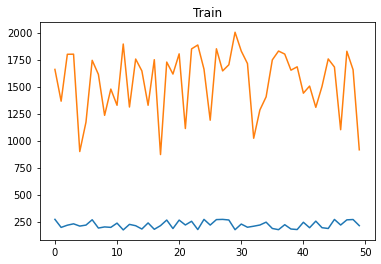

2/2 [==============================] - 1s 4ms/step


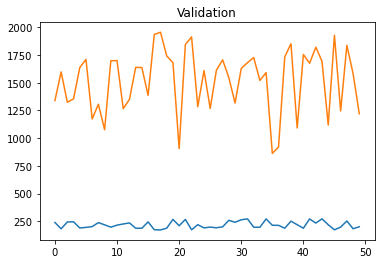

3/3 [==============================] - 0s 4ms/step


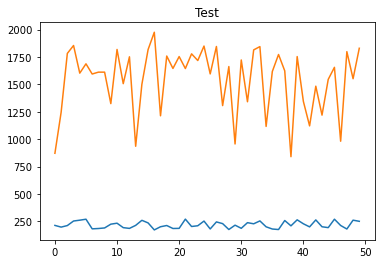

3/3 [==============================] - 0s 4ms/step


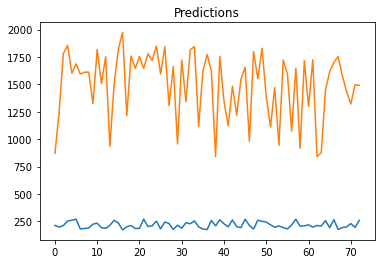

In [12]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))



cp = ModelCheckpoint('cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
cnn_mse = plot_predictions1(model,x_test, y_test)

### GRU

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 2472210.0000 - root_mean_squared_error: 1572.3263

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 32s 3s/step - loss: 2418864.7500 - root_mean_squared_error: 1555.2700 - val_loss: 2405436.7500 - val_root_mean_squared_error: 1550.9470
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2418240.0000 - root_mean_squared_error: 1555.0691

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2418240.0000 - root_mean_squared_error: 1555.0691 - val_loss: 2404821.0000 - val_root_mean_squared_error: 1550.7485
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2417626.2500 - root_mean_squared_error: 1554.8718

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2417626.2500 - root_mean_squared_error: 1554.8718 - val_loss: 2404199.7500 - val_root_mean_squared_error: 1550.5482
Epoch 4/50
5/8 [=================>............] - ETA: 0s - loss: 2427926.0000 - root_mean_squared_error: 1558.1803

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2417002.0000 - root_mean_squared_error: 1554.6710 - val_loss: 2403575.5000 - val_root_mean_squared_error: 1550.3469
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2400988.0000 - root_mean_squared_error: 1549.5122

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2416372.0000 - root_mean_squared_error: 1554.4684 - val_loss: 2402945.5000 - val_root_mean_squared_error: 1550.1437
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2394675.0000 - root_mean_squared_error: 1547.4738

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2415736.2500 - root_mean_squared_error: 1554.2639 - val_loss: 2402301.2500 - val_root_mean_squared_error: 1549.9359
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2415087.5000 - root_mean_squared_error: 1554.0552

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2415087.5000 - root_mean_squared_error: 1554.0552 - val_loss: 2401643.7500 - val_root_mean_squared_error: 1549.7238
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2414425.5000 - root_mean_squared_error: 1553.8422

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2414425.5000 - root_mean_squared_error: 1553.8422 - val_loss: 2400978.2500 - val_root_mean_squared_error: 1549.5090
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2413751.5000 - root_mean_squared_error: 1553.6252

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2413751.5000 - root_mean_squared_error: 1553.6252 - val_loss: 2400299.2500 - val_root_mean_squared_error: 1549.2899
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2413286.2500 - root_mean_squared_error: 1553.4756

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2413066.2500 - root_mean_squared_error: 1553.4048 - val_loss: 2399596.7500 - val_root_mean_squared_error: 1549.0632
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 2431001.2500 - root_mean_squared_error: 1559.1669

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2412352.0000 - root_mean_squared_error: 1553.1748 - val_loss: 2398874.0000 - val_root_mean_squared_error: 1548.8298
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 2446464.7500 - root_mean_squared_error: 1564.1179

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2411624.5000 - root_mean_squared_error: 1552.9406 - val_loss: 2398124.7500 - val_root_mean_squared_error: 1548.5880
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2411063.0000 - root_mean_squared_error: 1552.7598

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2410864.5000 - root_mean_squared_error: 1552.6959 - val_loss: 2397357.5000 - val_root_mean_squared_error: 1548.3402
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2410089.2500 - root_mean_squared_error: 1552.4462

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2410089.2500 - root_mean_squared_error: 1552.4462 - val_loss: 2396563.7500 - val_root_mean_squared_error: 1548.0839
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2409283.0000 - root_mean_squared_error: 1552.1865

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2409283.0000 - root_mean_squared_error: 1552.1865 - val_loss: 2395745.0000 - val_root_mean_squared_error: 1547.8195
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2413098.2500 - root_mean_squared_error: 1553.4150

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2408459.0000 - root_mean_squared_error: 1551.9210 - val_loss: 2394905.7500 - val_root_mean_squared_error: 1547.5483
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2407614.2500 - root_mean_squared_error: 1551.6489

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2407614.2500 - root_mean_squared_error: 1551.6489 - val_loss: 2394049.0000 - val_root_mean_squared_error: 1547.2715
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 2370022.2500 - root_mean_squared_error: 1539.4877

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2406752.2500 - root_mean_squared_error: 1551.3711 - val_loss: 2393180.2500 - val_root_mean_squared_error: 1546.9907
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2405880.2500 - root_mean_squared_error: 1551.0900

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2405880.2500 - root_mean_squared_error: 1551.0900 - val_loss: 2392290.5000 - val_root_mean_squared_error: 1546.7031
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2404988.7500 - root_mean_squared_error: 1550.8026

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2404988.7500 - root_mean_squared_error: 1550.8026 - val_loss: 2391394.5000 - val_root_mean_squared_error: 1546.4135
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2404086.5000 - root_mean_squared_error: 1550.5117

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2404086.5000 - root_mean_squared_error: 1550.5117 - val_loss: 2390488.2500 - val_root_mean_squared_error: 1546.1204
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2388457.0000 - root_mean_squared_error: 1545.4634

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2403180.0000 - root_mean_squared_error: 1550.2194 - val_loss: 2389576.7500 - val_root_mean_squared_error: 1545.8256
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2403624.5000 - root_mean_squared_error: 1550.3627

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2402274.7500 - root_mean_squared_error: 1549.9274 - val_loss: 2388666.0000 - val_root_mean_squared_error: 1545.5310
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 2439116.2500 - root_mean_squared_error: 1561.7670

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2401370.2500 - root_mean_squared_error: 1549.6355 - val_loss: 2387765.5000 - val_root_mean_squared_error: 1545.2396
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 2391605.5000 - root_mean_squared_error: 1546.4817

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2400473.2500 - root_mean_squared_error: 1549.3461 - val_loss: 2386872.7500 - val_root_mean_squared_error: 1544.9507
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 2390583.2500 - root_mean_squared_error: 1546.1511

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2399587.0000 - root_mean_squared_error: 1549.0601 - val_loss: 2385987.2500 - val_root_mean_squared_error: 1544.6641
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2398709.0000 - root_mean_squared_error: 1548.7766

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2398709.0000 - root_mean_squared_error: 1548.7766 - val_loss: 2385112.2500 - val_root_mean_squared_error: 1544.3809
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2388444.2500 - root_mean_squared_error: 1545.4592

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2397835.2500 - root_mean_squared_error: 1548.4945 - val_loss: 2384254.0000 - val_root_mean_squared_error: 1544.1030
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2398197.7500 - root_mean_squared_error: 1548.6116

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2396990.5000 - root_mean_squared_error: 1548.2217 - val_loss: 2383404.7500 - val_root_mean_squared_error: 1543.8280
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2396153.0000 - root_mean_squared_error: 1547.9512

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 2s/step - loss: 2396153.0000 - root_mean_squared_error: 1547.9512 - val_loss: 2382574.2500 - val_root_mean_squared_error: 1543.5590
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 2390060.2500 - root_mean_squared_error: 1545.9819

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2395335.0000 - root_mean_squared_error: 1547.6870 - val_loss: 2381760.5000 - val_root_mean_squared_error: 1543.2953
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2413046.7500 - root_mean_squared_error: 1553.3984

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2394531.5000 - root_mean_squared_error: 1547.4274 - val_loss: 2380965.5000 - val_root_mean_squared_error: 1543.0377
Epoch 33/50
5/8 [=================>............] - ETA: 0s - loss: 2341148.0000 - root_mean_squared_error: 1530.0811

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2393747.7500 - root_mean_squared_error: 1547.1741 - val_loss: 2380196.5000 - val_root_mean_squared_error: 1542.7886
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2392993.0000 - root_mean_squared_error: 1546.9302

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2392993.0000 - root_mean_squared_error: 1546.9302 - val_loss: 2379443.2500 - val_root_mean_squared_error: 1542.5444
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2382560.7500 - root_mean_squared_error: 1543.5546

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2392248.5000 - root_mean_squared_error: 1546.6896 - val_loss: 2378712.2500 - val_root_mean_squared_error: 1542.3075
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 2409853.2500 - root_mean_squared_error: 1552.3702

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2391533.2500 - root_mean_squared_error: 1546.4583 - val_loss: 2378000.0000 - val_root_mean_squared_error: 1542.0764
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2400439.5000 - root_mean_squared_error: 1549.3352

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 16s 2s/step - loss: 2390832.5000 - root_mean_squared_error: 1546.2317 - val_loss: 2377318.0000 - val_root_mean_squared_error: 1541.8553
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2390163.7500 - root_mean_squared_error: 1546.0155

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2390163.7500 - root_mean_squared_error: 1546.0155 - val_loss: 2376667.5000 - val_root_mean_squared_error: 1541.6443
Epoch 39/50
5/8 [=================>............] - ETA: 0s - loss: 2334956.5000 - root_mean_squared_error: 1528.0564

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2389529.0000 - root_mean_squared_error: 1545.8102 - val_loss: 2376046.5000 - val_root_mean_squared_error: 1541.4430
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2388922.0000 - root_mean_squared_error: 1545.6138

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2388922.0000 - root_mean_squared_error: 1545.6138 - val_loss: 2375447.0000 - val_root_mean_squared_error: 1541.2485
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2386209.2500 - root_mean_squared_error: 1544.7360

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2388335.7500 - root_mean_squared_error: 1545.4241 - val_loss: 2374876.2500 - val_root_mean_squared_error: 1541.0634
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2390882.7500 - root_mean_squared_error: 1546.2479

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2387777.0000 - root_mean_squared_error: 1545.2433 - val_loss: 2374331.2500 - val_root_mean_squared_error: 1540.8865
Epoch 43/50
5/8 [=================>............] - ETA: 0s - loss: 2427525.2500 - root_mean_squared_error: 1558.0518

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2387247.7500 - root_mean_squared_error: 1545.0721 - val_loss: 2373811.5000 - val_root_mean_squared_error: 1540.7179
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 2386738.5000 - root_mean_squared_error: 1544.9072

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2386738.5000 - root_mean_squared_error: 1544.9072 - val_loss: 2373318.0000 - val_root_mean_squared_error: 1540.5577
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 2379649.7500 - root_mean_squared_error: 1542.6113

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2386255.5000 - root_mean_squared_error: 1544.7510 - val_loss: 2372847.0000 - val_root_mean_squared_error: 1540.4048
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 2400724.2500 - root_mean_squared_error: 1549.4271

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2385795.5000 - root_mean_squared_error: 1544.6021 - val_loss: 2372397.7500 - val_root_mean_squared_error: 1540.2590
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2385359.0000 - root_mean_squared_error: 1544.4607

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2385359.0000 - root_mean_squared_error: 1544.4607 - val_loss: 2371967.5000 - val_root_mean_squared_error: 1540.1193
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2373813.0000 - root_mean_squared_error: 1540.7184

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 17s 2s/step - loss: 2384934.7500 - root_mean_squared_error: 1544.3234 - val_loss: 2371558.5000 - val_root_mean_squared_error: 1539.9866
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 2411230.7500 - root_mean_squared_error: 1552.8138

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2384536.7500 - root_mean_squared_error: 1544.1946 - val_loss: 2371162.5000 - val_root_mean_squared_error: 1539.8580
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2366684.7500 - root_mean_squared_error: 1538.4033

INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


8/8 [==============================] - 2s 11ms/step


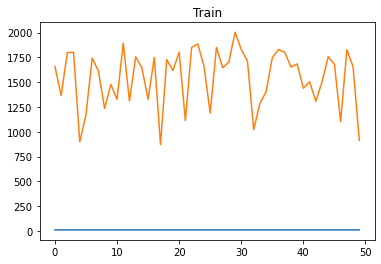

2/2 [==============================] - 2s 6ms/step


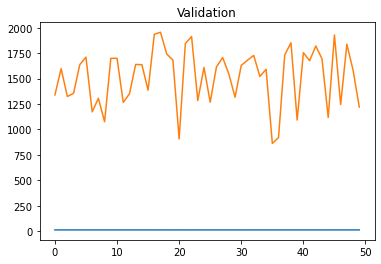

3/3 [==============================] - 0s 34ms/step


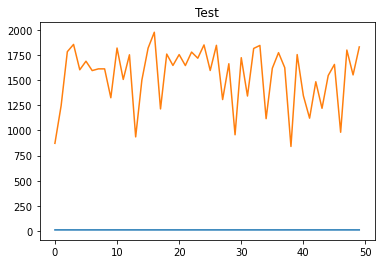

3/3 [==============================] - 0s 5ms/step


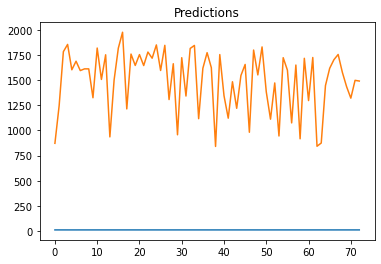

In [13]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
gru_mse = plot_predictions1(model,x_test, y_test)

### LSTM

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 2400331.2500 - root_mean_squared_error: 1549.3003

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 42s 4s/step - loss: 2419481.0000 - root_mean_squared_error: 1555.4681 - val_loss: 2406061.7500 - val_root_mean_squared_error: 1551.1486
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2418868.7500 - root_mean_squared_error: 1555.2712

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2418868.7500 - root_mean_squared_error: 1555.2712 - val_loss: 2405434.0000 - val_root_mean_squared_error: 1550.9462
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 2384035.2500 - root_mean_squared_error: 1544.0321

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2418236.5000 - root_mean_squared_error: 1555.0680 - val_loss: 2404799.2500 - val_root_mean_squared_error: 1550.7416
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2407697.2500 - root_mean_squared_error: 1551.6757

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2417596.5000 - root_mean_squared_error: 1554.8622 - val_loss: 2404154.5000 - val_root_mean_squared_error: 1550.5336
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2416945.2500 - root_mean_squared_error: 1554.6528

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2416945.2500 - root_mean_squared_error: 1554.6528 - val_loss: 2403489.7500 - val_root_mean_squared_error: 1550.3192
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2416271.0000 - root_mean_squared_error: 1554.4359

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2416271.0000 - root_mean_squared_error: 1554.4359 - val_loss: 2402806.0000 - val_root_mean_squared_error: 1550.0988
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2430416.5000 - root_mean_squared_error: 1558.9794

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2415579.7500 - root_mean_squared_error: 1554.2135 - val_loss: 2402097.0000 - val_root_mean_squared_error: 1549.8700
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2414860.0000 - root_mean_squared_error: 1553.9819

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2414860.0000 - root_mean_squared_error: 1553.9819 - val_loss: 2401409.0000 - val_root_mean_squared_error: 1549.6481
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 2405022.0000 - root_mean_squared_error: 1550.8134

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2414215.0000 - root_mean_squared_error: 1553.7744 - val_loss: 2400781.2500 - val_root_mean_squared_error: 1549.4454
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2399428.5000 - root_mean_squared_error: 1549.0089

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2413539.5000 - root_mean_squared_error: 1553.5570 - val_loss: 2400010.0000 - val_root_mean_squared_error: 1549.1965
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2399465.2500 - root_mean_squared_error: 1549.0208

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2412711.5000 - root_mean_squared_error: 1553.2905 - val_loss: 2399145.5000 - val_root_mean_squared_error: 1548.9175
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2411834.2500 - root_mean_squared_error: 1553.0082

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2411834.2500 - root_mean_squared_error: 1553.0082 - val_loss: 2398237.5000 - val_root_mean_squared_error: 1548.6244
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2427590.7500 - root_mean_squared_error: 1558.0728

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2410913.2500 - root_mean_squared_error: 1552.7115 - val_loss: 2397306.7500 - val_root_mean_squared_error: 1548.3239
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2411321.2500 - root_mean_squared_error: 1552.8430

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2409971.5000 - root_mean_squared_error: 1552.4083 - val_loss: 2396350.5000 - val_root_mean_squared_error: 1548.0150
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2412045.7500 - root_mean_squared_error: 1553.0762

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2409004.5000 - root_mean_squared_error: 1552.0968 - val_loss: 2395388.7500 - val_root_mean_squared_error: 1547.7045
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2408061.0000 - root_mean_squared_error: 1551.7928

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2408061.0000 - root_mean_squared_error: 1551.7928 - val_loss: 2394461.5000 - val_root_mean_squared_error: 1547.4048
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2413677.2500 - root_mean_squared_error: 1553.6014

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2407129.2500 - root_mean_squared_error: 1551.4926 - val_loss: 2393516.2500 - val_root_mean_squared_error: 1547.0992
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 2427669.7500 - root_mean_squared_error: 1558.0981

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2406163.7500 - root_mean_squared_error: 1551.1814 - val_loss: 2392529.7500 - val_root_mean_squared_error: 1546.7804
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2405159.2500 - root_mean_squared_error: 1550.8575

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2405159.2500 - root_mean_squared_error: 1550.8575 - val_loss: 2391494.2500 - val_root_mean_squared_error: 1546.4457
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2389694.7500 - root_mean_squared_error: 1545.8638

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2404095.7500 - root_mean_squared_error: 1550.5146 - val_loss: 2390411.7500 - val_root_mean_squared_error: 1546.0957
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2402994.2500 - root_mean_squared_error: 1550.1594

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2402994.2500 - root_mean_squared_error: 1550.1594 - val_loss: 2389273.0000 - val_root_mean_squared_error: 1545.7273
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2395995.7500 - root_mean_squared_error: 1547.9004

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2401835.2500 - root_mean_squared_error: 1549.7855 - val_loss: 2388091.5000 - val_root_mean_squared_error: 1545.3451
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2400635.2500 - root_mean_squared_error: 1549.3983

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2400635.2500 - root_mean_squared_error: 1549.3983 - val_loss: 2386878.5000 - val_root_mean_squared_error: 1544.9525
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2400838.2500 - root_mean_squared_error: 1549.4639

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2399416.7500 - root_mean_squared_error: 1549.0051 - val_loss: 2385645.2500 - val_root_mean_squared_error: 1544.5535
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2402825.5000 - root_mean_squared_error: 1550.1050

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2398189.5000 - root_mean_squared_error: 1548.6089 - val_loss: 2384413.5000 - val_root_mean_squared_error: 1544.1547
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 2364078.2500 - root_mean_squared_error: 1537.5559

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2396968.7500 - root_mean_squared_error: 1548.2147 - val_loss: 2383202.2500 - val_root_mean_squared_error: 1543.7623
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2395772.7500 - root_mean_squared_error: 1547.8285

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2395772.7500 - root_mean_squared_error: 1547.8285 - val_loss: 2382019.5000 - val_root_mean_squared_error: 1543.3793
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2402828.7500 - root_mean_squared_error: 1550.1061

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 3s/step - loss: 2394611.7500 - root_mean_squared_error: 1547.4534 - val_loss: 2380862.2500 - val_root_mean_squared_error: 1543.0043
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2393466.2500 - root_mean_squared_error: 1547.0831

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2393466.2500 - root_mean_squared_error: 1547.0831 - val_loss: 2379736.5000 - val_root_mean_squared_error: 1542.6394
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2392351.7500 - root_mean_squared_error: 1546.7229

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2392351.7500 - root_mean_squared_error: 1546.7229 - val_loss: 2378624.7500 - val_root_mean_squared_error: 1542.2792
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2391255.0000 - root_mean_squared_error: 1546.3683

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2391255.0000 - root_mean_squared_error: 1546.3683 - val_loss: 2377535.5000 - val_root_mean_squared_error: 1541.9259
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 2395775.0000 - root_mean_squared_error: 1547.8291

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2390175.5000 - root_mean_squared_error: 1546.0193 - val_loss: 2376456.7500 - val_root_mean_squared_error: 1541.5760
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2389100.0000 - root_mean_squared_error: 1545.6714

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2389100.0000 - root_mean_squared_error: 1545.6714 - val_loss: 2375384.7500 - val_root_mean_squared_error: 1541.2283
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 2377126.0000 - root_mean_squared_error: 1541.7931

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2388034.7500 - root_mean_squared_error: 1545.3268 - val_loss: 2374315.5000 - val_root_mean_squared_error: 1540.8813
Epoch 35/50
8/8 [==============================] - ETA: 0s - loss: 2386979.0000 - root_mean_squared_error: 1544.9851

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2386979.0000 - root_mean_squared_error: 1544.9851 - val_loss: 2373255.2500 - val_root_mean_squared_error: 1540.5374
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2385923.2500 - root_mean_squared_error: 1544.6434

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2385923.2500 - root_mean_squared_error: 1544.6434 - val_loss: 2372212.5000 - val_root_mean_squared_error: 1540.1989
Epoch 37/50
5/8 [=================>............] - ETA: 0s - loss: 2420384.5000 - root_mean_squared_error: 1555.7585

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2384893.7500 - root_mean_squared_error: 1544.3102 - val_loss: 2371175.2500 - val_root_mean_squared_error: 1539.8621
Epoch 38/50
5/8 [=================>............] - ETA: 0s - loss: 2411616.0000 - root_mean_squared_error: 1552.9379

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2383861.5000 - root_mean_squared_error: 1543.9758 - val_loss: 2370150.2500 - val_root_mean_squared_error: 1539.5292
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2364477.5000 - root_mean_squared_error: 1537.6858

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2382840.7500 - root_mean_squared_error: 1543.6453 - val_loss: 2369132.2500 - val_root_mean_squared_error: 1539.1986
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2381825.0000 - root_mean_squared_error: 1543.3163

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2381825.0000 - root_mean_squared_error: 1543.3163 - val_loss: 2368114.5000 - val_root_mean_squared_error: 1538.8679
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2390292.7500 - root_mean_squared_error: 1546.0571

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 20s 3s/step - loss: 2380814.5000 - root_mean_squared_error: 1542.9888 - val_loss: 2367106.0000 - val_root_mean_squared_error: 1538.5402
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2377800.2500 - root_mean_squared_error: 1542.0117

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 3s/step - loss: 2379811.7500 - root_mean_squared_error: 1542.6638 - val_loss: 2366099.7500 - val_root_mean_squared_error: 1538.2131
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2378803.0000 - root_mean_squared_error: 1542.3369

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2378803.0000 - root_mean_squared_error: 1542.3369 - val_loss: 2365095.0000 - val_root_mean_squared_error: 1537.8866
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2379039.7500 - root_mean_squared_error: 1542.4136

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2377802.0000 - root_mean_squared_error: 1542.0123 - val_loss: 2364088.0000 - val_root_mean_squared_error: 1537.5591
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2376801.5000 - root_mean_squared_error: 1541.6879

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2376801.5000 - root_mean_squared_error: 1541.6879 - val_loss: 2363082.7500 - val_root_mean_squared_error: 1537.2322
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2375805.2500 - root_mean_squared_error: 1541.3647

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2375805.2500 - root_mean_squared_error: 1541.3647 - val_loss: 2362087.7500 - val_root_mean_squared_error: 1536.9084
Epoch 47/50
5/8 [=================>............] - ETA: 0s - loss: 2348896.2500 - root_mean_squared_error: 1532.6110

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2374813.2500 - root_mean_squared_error: 1541.0430 - val_loss: 2361104.5000 - val_root_mean_squared_error: 1536.5886
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2373841.5000 - root_mean_squared_error: 1540.7275

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2373841.5000 - root_mean_squared_error: 1540.7275 - val_loss: 2360124.2500 - val_root_mean_squared_error: 1536.2695
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2372867.0000 - root_mean_squared_error: 1540.4113

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2372867.0000 - root_mean_squared_error: 1540.4113 - val_loss: 2359159.5000 - val_root_mean_squared_error: 1535.9556
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2379450.5000 - root_mean_squared_error: 1542.5468

INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


8/8 [==============================] - 5s 10ms/step


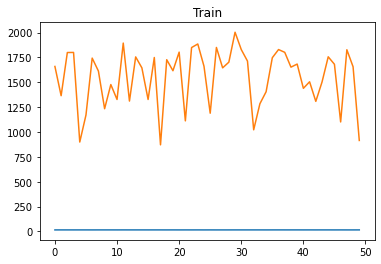

2/2 [==============================] - 2s 7ms/step


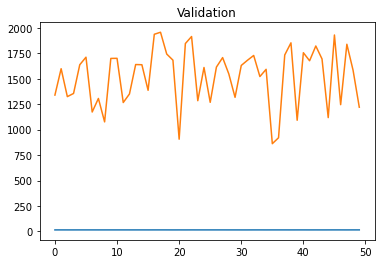

3/3 [==============================] - 0s 14ms/step


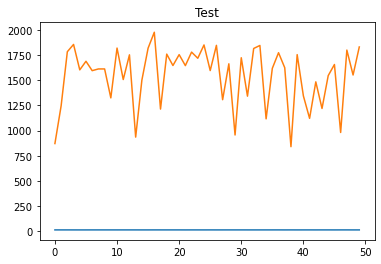

3/3 [==============================] - 0s 6ms/step


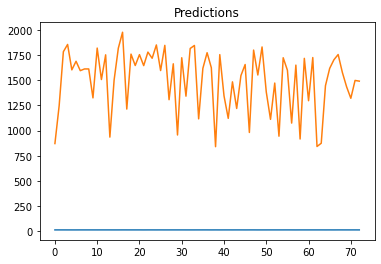

In [14]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
lstm_mse = plot_predictions1(model,x_test, y_test)

### RNN

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2412442.5000 - root_mean_squared_error: 1553.2040 INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 2412442.5000 - root_mean_squared_error: 1553.2040 - val_loss: 2398818.7500 - val_root_mean_squared_error: 1548.8121
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 2423650.7500 - root_mean_squared_error: 1556.8079INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2411394.7500 - root_mean_squared_error: 1552.8666 - val_loss: 2397773.5000 - val_root_mean_squared_error: 1548.4746
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2410348.5000 - root_mean_squared_error: 1552.5297INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2410348.5000 - root_mean_squared_error: 1552.5297 - val_loss: 2396737.7500 - val_root_mean_squared_error: 1548.1401
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 2426416.2500 - root_mean_squared_error: 1557.6958INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2409310.5000 - root_mean_squared_error: 1552.1954 - val_loss: 2395713.0000 - val_root_mean_squared_error: 1547.8091
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2415423.5000 - root_mean_squared_error: 1554.1633INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2408291.7500 - root_mean_squared_error: 1551.8672 - val_loss: 2394701.7500 - val_root_mean_squared_error: 1547.4824
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 2374860.0000 - root_mean_squared_error: 1541.0581INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2407283.7500 - root_mean_squared_error: 1551.5424 - val_loss: 2393711.7500 - val_root_mean_squared_error: 1547.1625
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 2384524.7500 - root_mean_squared_error: 1544.1907INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 6s 918ms/step - loss: 2406304.7500 - root_mean_squared_error: 1551.2268 - val_loss: 2392738.5000 - val_root_mean_squared_error: 1546.8479
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2377264.0000 - root_mean_squared_error: 1541.8379INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2405342.5000 - root_mean_squared_error: 1550.9166 - val_loss: 2391789.2500 - val_root_mean_squared_error: 1546.5410
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2395214.7500 - root_mean_squared_error: 1547.6482INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2404406.5000 - root_mean_squared_error: 1550.6149 - val_loss: 2390867.7500 - val_root_mean_squared_error: 1546.2432
Epoch 10/50
4/8 [==============>...............] - ETA: 0s - loss: 2385331.5000 - root_mean_squared_error: 1544.4519INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 2403502.5000 - root_mean_squared_error: 1550.3234 - val_loss: 2389971.7500 - val_root_mean_squared_error: 1545.9534
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2402626.5000 - root_mean_squared_error: 1550.0408INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2402626.5000 - root_mean_squared_error: 1550.0408 - val_loss: 2389101.5000 - val_root_mean_squared_error: 1545.6719
Epoch 12/50
5/8 [=================>............] - ETA: 0s - loss: 2370275.5000 - root_mean_squared_error: 1539.5699INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2401771.5000 - root_mean_squared_error: 1549.7650 - val_loss: 2388258.5000 - val_root_mean_squared_error: 1545.3992
Epoch 13/50
4/8 [==============>...............] - ETA: 0s - loss: 2481684.5000 - root_mean_squared_error: 1575.3363INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2400942.7500 - root_mean_squared_error: 1549.4976 - val_loss: 2387427.7500 - val_root_mean_squared_error: 1545.1304
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2397488.2500 - root_mean_squared_error: 1548.3824INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2400127.0000 - root_mean_squared_error: 1549.2344 - val_loss: 2386618.5000 - val_root_mean_squared_error: 1544.8684
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2399328.2500 - root_mean_squared_error: 1548.9766INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2399328.2500 - root_mean_squared_error: 1548.9766 - val_loss: 2385831.7500 - val_root_mean_squared_error: 1544.6138
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2407050.7500 - root_mean_squared_error: 1551.4673INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2398557.2500 - root_mean_squared_error: 1548.7277 - val_loss: 2385062.0000 - val_root_mean_squared_error: 1544.3645
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 2402253.2500 - root_mean_squared_error: 1549.9204INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2397805.7500 - root_mean_squared_error: 1548.4850 - val_loss: 2384321.7500 - val_root_mean_squared_error: 1544.1249
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2401590.2500 - root_mean_squared_error: 1549.7065INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2397084.2500 - root_mean_squared_error: 1548.2520 - val_loss: 2383610.7500 - val_root_mean_squared_error: 1543.8948
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2396390.5000 - root_mean_squared_error: 1548.0280INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2396390.5000 - root_mean_squared_error: 1548.0280 - val_loss: 2382928.5000 - val_root_mean_squared_error: 1543.6737
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2402839.2500 - root_mean_squared_error: 1550.1094INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2395728.2500 - root_mean_squared_error: 1547.8140 - val_loss: 2382276.7500 - val_root_mean_squared_error: 1543.4625
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 2411870.7500 - root_mean_squared_error: 1553.0199INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2395094.2500 - root_mean_squared_error: 1547.6093 - val_loss: 2381656.5000 - val_root_mean_squared_error: 1543.2616
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 2357904.7500 - root_mean_squared_error: 1535.5470INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2394486.7500 - root_mean_squared_error: 1547.4130 - val_loss: 2381069.0000 - val_root_mean_squared_error: 1543.0713
Epoch 23/50
5/8 [=================>............] - ETA: 0s - loss: 2389135.0000 - root_mean_squared_error: 1545.6827INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2393915.5000 - root_mean_squared_error: 1547.2283 - val_loss: 2380507.7500 - val_root_mean_squared_error: 1542.8894
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2391982.2500 - root_mean_squared_error: 1546.6035INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2393372.2500 - root_mean_squared_error: 1547.0527 - val_loss: 2379978.2500 - val_root_mean_squared_error: 1542.7178
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 2399396.2500 - root_mean_squared_error: 1548.9984INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2392857.2500 - root_mean_squared_error: 1546.8864 - val_loss: 2379471.5000 - val_root_mean_squared_error: 1542.5536
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 2367098.7500 - root_mean_squared_error: 1538.5378INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2392362.0000 - root_mean_squared_error: 1546.7262 - val_loss: 2378990.2500 - val_root_mean_squared_error: 1542.3976
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 2371190.2500 - root_mean_squared_error: 1539.8669INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2391891.0000 - root_mean_squared_error: 1546.5740 - val_loss: 2378529.7500 - val_root_mean_squared_error: 1542.2483
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2391442.7500 - root_mean_squared_error: 1546.4291INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2391442.7500 - root_mean_squared_error: 1546.4291 - val_loss: 2378085.5000 - val_root_mean_squared_error: 1542.1042
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2394740.0000 - root_mean_squared_error: 1547.4948INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2391009.7500 - root_mean_squared_error: 1546.2891 - val_loss: 2377661.2500 - val_root_mean_squared_error: 1541.9667
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2396548.7500 - root_mean_squared_error: 1548.0791INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2390593.5000 - root_mean_squared_error: 1546.1544 - val_loss: 2377254.0000 - val_root_mean_squared_error: 1541.8346
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2373528.0000 - root_mean_squared_error: 1540.6259INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2390193.2500 - root_mean_squared_error: 1546.0250 - val_loss: 2376860.2500 - val_root_mean_squared_error: 1541.7069
Epoch 32/50
5/8 [=================>............] - ETA: 0s - loss: 2372676.7500 - root_mean_squared_error: 1540.3496INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2389806.0000 - root_mean_squared_error: 1545.8998 - val_loss: 2376474.2500 - val_root_mean_squared_error: 1541.5818
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2426896.7500 - root_mean_squared_error: 1557.8501INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 944ms/step - loss: 2389429.5000 - root_mean_squared_error: 1545.7780 - val_loss: 2376099.2500 - val_root_mean_squared_error: 1541.4601
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 2406403.2500 - root_mean_squared_error: 1551.2585INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 981ms/step - loss: 2389062.2500 - root_mean_squared_error: 1545.6592 - val_loss: 2375738.7500 - val_root_mean_squared_error: 1541.3431
Epoch 35/50
5/8 [=================>............] - ETA: 0s - loss: 2441035.5000 - root_mean_squared_error: 1562.3813INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2388708.7500 - root_mean_squared_error: 1545.5448 - val_loss: 2375390.0000 - val_root_mean_squared_error: 1541.2300
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2391897.2500 - root_mean_squared_error: 1546.5759INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2388365.0000 - root_mean_squared_error: 1545.4336 - val_loss: 2375054.5000 - val_root_mean_squared_error: 1541.1212
Epoch 37/50
6/8 [=====================>........] - ETA: 0s - loss: 2360106.2500 - root_mean_squared_error: 1536.2637INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2388034.7500 - root_mean_squared_error: 1545.3268 - val_loss: 2374728.0000 - val_root_mean_squared_error: 1541.0153
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 2428805.2500 - root_mean_squared_error: 1558.4625INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2387716.0000 - root_mean_squared_error: 1545.2236 - val_loss: 2374410.5000 - val_root_mean_squared_error: 1540.9122
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2390197.2500 - root_mean_squared_error: 1546.0262INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2387403.2500 - root_mean_squared_error: 1545.1224 - val_loss: 2374104.5000 - val_root_mean_squared_error: 1540.8129
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 2404588.5000 - root_mean_squared_error: 1550.6736INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2387102.2500 - root_mean_squared_error: 1545.0250 - val_loss: 2373804.2500 - val_root_mean_squared_error: 1540.7155
Epoch 41/50
5/8 [=================>............] - ETA: 0s - loss: 2398243.5000 - root_mean_squared_error: 1548.6263INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2386805.7500 - root_mean_squared_error: 1544.9291 - val_loss: 2373510.0000 - val_root_mean_squared_error: 1540.6200
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2386152.2500 - root_mean_squared_error: 1544.7175INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 955ms/step - loss: 2386514.0000 - root_mean_squared_error: 1544.8346 - val_loss: 2373222.0000 - val_root_mean_squared_error: 1540.5265
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 2370609.0000 - root_mean_squared_error: 1539.6782INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2386229.5000 - root_mean_squared_error: 1544.7426 - val_loss: 2372938.2500 - val_root_mean_squared_error: 1540.4344
Epoch 44/50
1/8 [==>...........................] - ETA: 0s - loss: 2309255.5000 - root_mean_squared_error: 1519.6234INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2385949.0000 - root_mean_squared_error: 1544.6517 - val_loss: 2372658.7500 - val_root_mean_squared_error: 1540.3438
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2391667.7500 - root_mean_squared_error: 1546.5018INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2385671.2500 - root_mean_squared_error: 1544.5619 - val_loss: 2372381.7500 - val_root_mean_squared_error: 1540.2538
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2385395.5000 - root_mean_squared_error: 1544.4725INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2385395.5000 - root_mean_squared_error: 1544.4725 - val_loss: 2372106.5000 - val_root_mean_squared_error: 1540.1644
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2385121.2500 - root_mean_squared_error: 1544.3838INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2385121.2500 - root_mean_squared_error: 1544.3838 - val_loss: 2371832.2500 - val_root_mean_squared_error: 1540.0754
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 2388600.7500 - root_mean_squared_error: 1545.5099INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2384847.0000 - root_mean_squared_error: 1544.2950 - val_loss: 2371555.0000 - val_root_mean_squared_error: 1539.9854
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 2425686.2500 - root_mean_squared_error: 1557.4614INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2384569.0000 - root_mean_squared_error: 1544.2050 - val_loss: 2371277.0000 - val_root_mean_squared_error: 1539.8953
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2390146.0000 - root_mean_squared_error: 1546.0096INFO:tensorflow:Assets written to: rnn/assets


INFO:tensorflow:Assets written to: rnn/assets


8/8 [==============================] - 1s 7ms/step


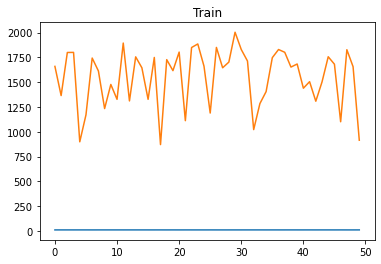

2/2 [==============================] - 1s 9ms/step


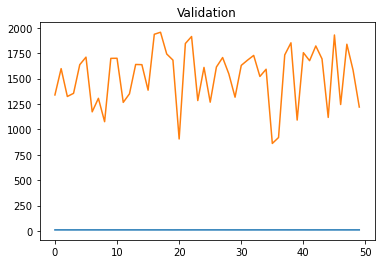

3/3 [==============================] - 0s 37ms/step


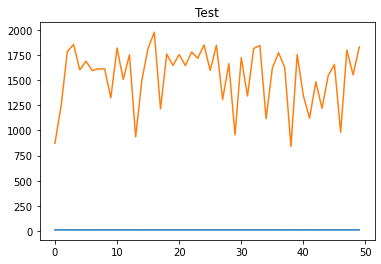

3/3 [==============================] - 0s 4ms/step


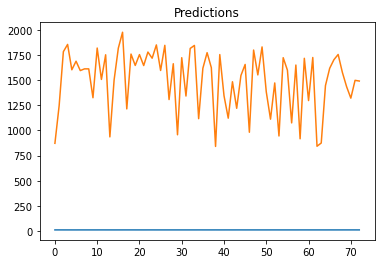

In [15]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
rnn_mse = plot_predictions1(model,x_test, y_test)

# Moving Average

In [16]:
window_size = 3

def moving_average(data, window_size):
    cumsum = np.cumsum(data, axis=0)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

moving_avg_data = np.apply_along_axis(lambda x: moving_average(x, window_size), axis=0, arr=x_train)
target = y_train[window_size - 1:].flatten()

#### CNN

Epoch 1/50
1/8 [==>...........................] - ETA: 20s - loss: 2560666.5000 - root_mean_squared_error: 1600.2083

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 7s 550ms/step - loss: 2400037.2500 - root_mean_squared_error: 1549.2053 - val_loss: 2375307.2500 - val_root_mean_squared_error: 1541.2031
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2383735.2500 - root_mean_squared_error: 1543.9349

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 566ms/step - loss: 2383735.2500 - root_mean_squared_error: 1543.9349 - val_loss: 2358867.7500 - val_root_mean_squared_error: 1535.8606
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 2508452.5000 - root_mean_squared_error: 1583.8094

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 431ms/step - loss: 2369143.0000 - root_mean_squared_error: 1539.2020 - val_loss: 2346205.0000 - val_root_mean_squared_error: 1531.7327
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2352049.5000 - root_mean_squared_error: 1533.6393

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 447ms/step - loss: 2357243.0000 - root_mean_squared_error: 1535.3315 - val_loss: 2333983.5000 - val_root_mean_squared_error: 1527.7380
Epoch 5/50
1/8 [==>...........................] - ETA: 0s - loss: 2369774.0000 - root_mean_squared_error: 1539.4070

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 275ms/step - loss: 2345288.0000 - root_mean_squared_error: 1531.4333 - val_loss: 2321640.2500 - val_root_mean_squared_error: 1523.6930
Epoch 6/50
5/8 [=================>............] - ETA: 0s - loss: 2365395.5000 - root_mean_squared_error: 1537.9843

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 612ms/step - loss: 2333308.7500 - root_mean_squared_error: 1527.5172 - val_loss: 2309123.0000 - val_root_mean_squared_error: 1519.5798
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2321089.0000 - root_mean_squared_error: 1523.5121

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 477ms/step - loss: 2321089.0000 - root_mean_squared_error: 1523.5121 - val_loss: 2296527.5000 - val_root_mean_squared_error: 1515.4298
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2355468.2500 - root_mean_squared_error: 1534.7535

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 611ms/step - loss: 2308754.2500 - root_mean_squared_error: 1519.4585 - val_loss: 2283715.0000 - val_root_mean_squared_error: 1511.1965
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2302817.2500 - root_mean_squared_error: 1517.5037

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 752ms/step - loss: 2296248.0000 - root_mean_squared_error: 1515.3376 - val_loss: 2270668.2500 - val_root_mean_squared_error: 1506.8737
Epoch 10/50
1/8 [==>...........................] - ETA: 0s - loss: 2530876.0000 - root_mean_squared_error: 1590.8727

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 403ms/step - loss: 2283448.0000 - root_mean_squared_error: 1511.1082 - val_loss: 2257514.5000 - val_root_mean_squared_error: 1502.5027
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2275515.2500 - root_mean_squared_error: 1508.4811

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 467ms/step - loss: 2270472.5000 - root_mean_squared_error: 1506.8087 - val_loss: 2244046.0000 - val_root_mean_squared_error: 1498.0140
Epoch 12/50
1/8 [==>...........................] - ETA: 0s - loss: 2407761.0000 - root_mean_squared_error: 1551.6962

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 267ms/step - loss: 2257352.2500 - root_mean_squared_error: 1502.4487 - val_loss: 2230324.2500 - val_root_mean_squared_error: 1493.4270
Epoch 13/50
1/8 [==>...........................] - ETA: 0s - loss: 2268366.0000 - root_mean_squared_error: 1506.1095

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 394ms/step - loss: 2243772.7500 - root_mean_squared_error: 1497.9229 - val_loss: 2216271.7500 - val_root_mean_squared_error: 1488.7148
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 2267673.2500 - root_mean_squared_error: 1505.8795

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 405ms/step - loss: 2230071.5000 - root_mean_squared_error: 1493.3424 - val_loss: 2201924.0000 - val_root_mean_squared_error: 1483.8881
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2216047.7500 - root_mean_squared_error: 1488.6395

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 306ms/step - loss: 2216047.7500 - root_mean_squared_error: 1488.6395 - val_loss: 2187376.7500 - val_root_mean_squared_error: 1478.9783
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2201744.7500 - root_mean_squared_error: 1483.8278

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 449ms/step - loss: 2201744.7500 - root_mean_squared_error: 1483.8278 - val_loss: 2172516.5000 - val_root_mean_squared_error: 1473.9459
Epoch 17/50
1/8 [==>...........................] - ETA: 0s - loss: 2406995.5000 - root_mean_squared_error: 1551.4495

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 6s 881ms/step - loss: 2187115.7500 - root_mean_squared_error: 1478.8900 - val_loss: 2157329.7500 - val_root_mean_squared_error: 1468.7852
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 2123905.2500 - root_mean_squared_error: 1457.3624

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 593ms/step - loss: 2172112.2500 - root_mean_squared_error: 1473.8087 - val_loss: 2141854.7500 - val_root_mean_squared_error: 1463.5077
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2166400.0000 - root_mean_squared_error: 1471.8695

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 578ms/step - loss: 2156964.2500 - root_mean_squared_error: 1468.6606 - val_loss: 2125996.7500 - val_root_mean_squared_error: 1458.0798
Epoch 20/50
1/8 [==>...........................] - ETA: 0s - loss: 2206454.7500 - root_mean_squared_error: 1485.4139

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 449ms/step - loss: 2141442.0000 - root_mean_squared_error: 1463.3667 - val_loss: 2109909.5000 - val_root_mean_squared_error: 1452.5527
Epoch 21/50
1/8 [==>...........................] - ETA: 0s - loss: 2188720.0000 - root_mean_squared_error: 1479.4324

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 440ms/step - loss: 2125654.0000 - root_mean_squared_error: 1457.9623 - val_loss: 2093533.2500 - val_root_mean_squared_error: 1446.9047
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2098902.5000 - root_mean_squared_error: 1448.7589

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 505ms/step - loss: 2109485.7500 - root_mean_squared_error: 1452.4069 - val_loss: 2076643.6250 - val_root_mean_squared_error: 1441.0564
Epoch 23/50
1/8 [==>...........................] - ETA: 0s - loss: 2007211.0000 - root_mean_squared_error: 1416.7607

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 758ms/step - loss: 2092807.3750 - root_mean_squared_error: 1446.6538 - val_loss: 2059397.5000 - val_root_mean_squared_error: 1435.0601
Epoch 24/50
6/8 [=====================>........] - ETA: 0s - loss: 2079657.0000 - root_mean_squared_error: 1442.1016

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 493ms/step - loss: 2075956.3750 - root_mean_squared_error: 1440.8180 - val_loss: 2041815.7500 - val_root_mean_squared_error: 1428.9211
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2058740.1250 - root_mean_squared_error: 1434.8311

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 642ms/step - loss: 2058740.1250 - root_mean_squared_error: 1434.8311 - val_loss: 2024211.2500 - val_root_mean_squared_error: 1422.7478
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2059977.8750 - root_mean_squared_error: 1435.2623

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 6s 924ms/step - loss: 2041449.5000 - root_mean_squared_error: 1428.7930 - val_loss: 2006397.5000 - val_root_mean_squared_error: 1416.4736
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 1972610.0000 - root_mean_squared_error: 1404.4963

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 520ms/step - loss: 2023929.7500 - root_mean_squared_error: 1422.6488 - val_loss: 1988407.5000 - val_root_mean_squared_error: 1410.1090
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2006206.1250 - root_mean_squared_error: 1416.4060

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 452ms/step - loss: 2006206.1250 - root_mean_squared_error: 1416.4060 - val_loss: 1969761.5000 - val_root_mean_squared_error: 1403.4819
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 1987778.2500 - root_mean_squared_error: 1409.8859

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 430ms/step - loss: 1987778.2500 - root_mean_squared_error: 1409.8859 - val_loss: 1951003.2500 - val_root_mean_squared_error: 1396.7832
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 1969416.1250 - root_mean_squared_error: 1403.3589

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 543ms/step - loss: 1969416.1250 - root_mean_squared_error: 1403.3589 - val_loss: 1931845.0000 - val_root_mean_squared_error: 1389.9083
Epoch 31/50
1/8 [==>...........................] - ETA: 0s - loss: 1860831.1250 - root_mean_squared_error: 1364.1228

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 672ms/step - loss: 1950448.1250 - root_mean_squared_error: 1396.5845 - val_loss: 1912172.7500 - val_root_mean_squared_error: 1382.8134
Epoch 32/50
5/8 [=================>............] - ETA: 0s - loss: 1927198.7500 - root_mean_squared_error: 1388.2358

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 517ms/step - loss: 1931182.3750 - root_mean_squared_error: 1389.6699 - val_loss: 1892153.8750 - val_root_mean_squared_error: 1375.5558
Epoch 33/50
1/8 [==>...........................] - ETA: 0s - loss: 2102890.7500 - root_mean_squared_error: 1450.1348

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 387ms/step - loss: 1911559.6250 - root_mean_squared_error: 1382.5917 - val_loss: 1871924.5000 - val_root_mean_squared_error: 1368.1829
Epoch 34/50
1/8 [==>...........................] - ETA: 0s - loss: 1776913.2500 - root_mean_squared_error: 1333.0092

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 410ms/step - loss: 1891722.3750 - root_mean_squared_error: 1375.3990 - val_loss: 1851327.8750 - val_root_mean_squared_error: 1360.6351
Epoch 35/50
1/8 [==>...........................] - ETA: 0s - loss: 1988841.5000 - root_mean_squared_error: 1410.2629

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 336ms/step - loss: 1871484.6250 - root_mean_squared_error: 1368.0222 - val_loss: 1830790.8750 - val_root_mean_squared_error: 1353.0673
Epoch 36/50
1/8 [==>...........................] - ETA: 0s - loss: 1718935.7500 - root_mean_squared_error: 1311.0819

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 6s 925ms/step - loss: 1851305.7500 - root_mean_squared_error: 1360.6270 - val_loss: 1810001.7500 - val_root_mean_squared_error: 1345.3630
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 1819366.6250 - root_mean_squared_error: 1348.8390

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 339ms/step - loss: 1830710.0000 - root_mean_squared_error: 1353.0374 - val_loss: 1788763.0000 - val_root_mean_squared_error: 1337.4464
Epoch 38/50
5/8 [=================>............] - ETA: 0s - loss: 1736188.0000 - root_mean_squared_error: 1317.6449

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 3s 442ms/step - loss: 1809665.2500 - root_mean_squared_error: 1345.2380 - val_loss: 1767091.8750 - val_root_mean_squared_error: 1329.3201
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 1788438.7500 - root_mean_squared_error: 1337.3252

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 590ms/step - loss: 1788438.7500 - root_mean_squared_error: 1337.3252 - val_loss: 1745142.3750 - val_root_mean_squared_error: 1321.0383
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 1788943.0000 - root_mean_squared_error: 1337.5138

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 639ms/step - loss: 1766968.5000 - root_mean_squared_error: 1329.2737 - val_loss: 1723129.3750 - val_root_mean_squared_error: 1312.6802
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 1732061.0000 - root_mean_squared_error: 1316.0779

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 612ms/step - loss: 1745242.5000 - root_mean_squared_error: 1321.0763 - val_loss: 1700860.1250 - val_root_mean_squared_error: 1304.1703
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 1715273.0000 - root_mean_squared_error: 1309.6843

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 513ms/step - loss: 1723238.8750 - root_mean_squared_error: 1312.7219 - val_loss: 1678142.1250 - val_root_mean_squared_error: 1295.4313
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 1688182.0000 - root_mean_squared_error: 1299.3005

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 543ms/step - loss: 1700951.2500 - root_mean_squared_error: 1304.2052 - val_loss: 1655002.3750 - val_root_mean_squared_error: 1286.4690
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 1694522.7500 - root_mean_squared_error: 1301.7384

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 6s 825ms/step - loss: 1678097.8750 - root_mean_squared_error: 1295.4142 - val_loss: 1631673.6250 - val_root_mean_squared_error: 1277.3698
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 1655147.7500 - root_mean_squared_error: 1286.5255

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 5s 653ms/step - loss: 1655147.7500 - root_mean_squared_error: 1286.5255 - val_loss: 1608225.6250 - val_root_mean_squared_error: 1268.1583
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 1644542.0000 - root_mean_squared_error: 1282.3970

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 541ms/step - loss: 1629665.2500 - root_mean_squared_error: 1276.5834 - val_loss: 1573630.1250 - val_root_mean_squared_error: 1254.4441
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 1595919.8750 - root_mean_squared_error: 1263.2972

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 2s 350ms/step - loss: 1591187.0000 - root_mean_squared_error: 1261.4226 - val_loss: 1532011.0000 - val_root_mean_squared_error: 1237.7443
Epoch 48/50
1/8 [==>...........................] - ETA: 0s - loss: 1592254.1250 - root_mean_squared_error: 1261.8456

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 577ms/step - loss: 1550002.2500 - root_mean_squared_error: 1244.9908 - val_loss: 1490098.2500 - val_root_mean_squared_error: 1220.6958
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 1531564.3750 - root_mean_squared_error: 1237.5638

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 4s 518ms/step - loss: 1509368.6250 - root_mean_squared_error: 1228.5636 - val_loss: 1449189.0000 - val_root_mean_squared_error: 1203.8226
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 1469413.2500 - root_mean_squared_error: 1212.1936

INFO:tensorflow:Assets written to: mavg_cnn/assets


INFO:tensorflow:Assets written to: mavg_cnn/assets


8/8 [==============================] - 0s 5ms/step


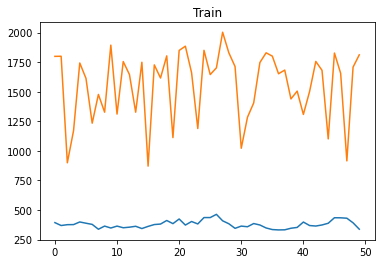

2/2 [==============================] - 1s 4ms/step


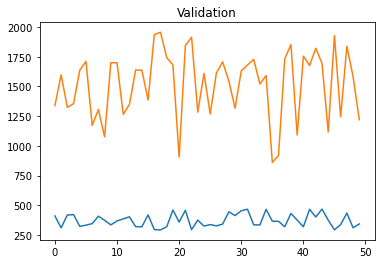

3/3 [==============================] - 0s 12ms/step


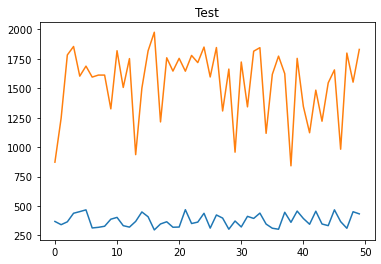

3/3 [==============================] - 0s 4ms/step


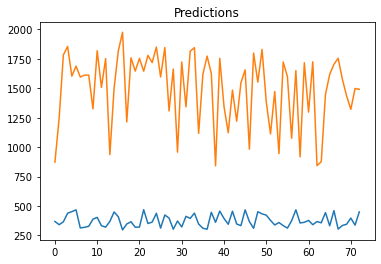

In [17]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_cnn_mse = plot_predictions1(model,x_test, y_test)

#### GRU

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2416090.2500 - root_mean_squared_error: 1554.3778

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 35s 3s/step - loss: 2419386.5000 - root_mean_squared_error: 1555.4377 - val_loss: 2404989.7500 - val_root_mean_squared_error: 1550.8030
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2409243.7500 - root_mean_squared_error: 1552.1738

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2418766.5000 - root_mean_squared_error: 1555.2384 - val_loss: 2404374.0000 - val_root_mean_squared_error: 1550.6044
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2418147.7500 - root_mean_squared_error: 1555.0394

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2418147.7500 - root_mean_squared_error: 1555.0394 - val_loss: 2403759.2500 - val_root_mean_squared_error: 1550.4061
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 2399469.0000 - root_mean_squared_error: 1549.0220

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2417528.5000 - root_mean_squared_error: 1554.8403 - val_loss: 2403143.2500 - val_root_mean_squared_error: 1550.2075
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2416912.5000 - root_mean_squared_error: 1554.6422

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2416912.5000 - root_mean_squared_error: 1554.6422 - val_loss: 2402520.7500 - val_root_mean_squared_error: 1550.0067
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2429125.2500 - root_mean_squared_error: 1558.5652

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2416280.0000 - root_mean_squared_error: 1554.4388 - val_loss: 2401895.2500 - val_root_mean_squared_error: 1549.8049
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2414104.5000 - root_mean_squared_error: 1553.7389

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2415651.7500 - root_mean_squared_error: 1554.2367 - val_loss: 2401260.7500 - val_root_mean_squared_error: 1549.6002
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2494238.0000 - root_mean_squared_error: 1579.3157

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2415010.0000 - root_mean_squared_error: 1554.0303 - val_loss: 2400611.2500 - val_root_mean_squared_error: 1549.3906
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2430549.5000 - root_mean_squared_error: 1559.0220

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2414345.7500 - root_mean_squared_error: 1553.8165 - val_loss: 2399948.7500 - val_root_mean_squared_error: 1549.1768
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 2397241.2500 - root_mean_squared_error: 1548.3027

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2413674.7500 - root_mean_squared_error: 1553.6006 - val_loss: 2399270.0000 - val_root_mean_squared_error: 1548.9578
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2402914.0000 - root_mean_squared_error: 1550.1335

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2412980.5000 - root_mean_squared_error: 1553.3771 - val_loss: 2398562.2500 - val_root_mean_squared_error: 1548.7292
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 2421599.7500 - root_mean_squared_error: 1556.1490

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2412258.5000 - root_mean_squared_error: 1553.1447 - val_loss: 2397835.0000 - val_root_mean_squared_error: 1548.4944
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2412026.5000 - root_mean_squared_error: 1553.0701

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2411527.0000 - root_mean_squared_error: 1552.9092 - val_loss: 2397086.2500 - val_root_mean_squared_error: 1548.2527
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2406403.5000 - root_mean_squared_error: 1551.2587

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 15s 2s/step - loss: 2410762.5000 - root_mean_squared_error: 1552.6631 - val_loss: 2396316.2500 - val_root_mean_squared_error: 1548.0039
Epoch 15/50
8/8 [==============================] - ETA: 0s - loss: 2409976.5000 - root_mean_squared_error: 1552.4099

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2409976.5000 - root_mean_squared_error: 1552.4099 - val_loss: 2395519.2500 - val_root_mean_squared_error: 1547.7465
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 2403055.0000 - root_mean_squared_error: 1550.1791

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2409166.5000 - root_mean_squared_error: 1552.1490 - val_loss: 2394693.2500 - val_root_mean_squared_error: 1547.4796
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2396252.2500 - root_mean_squared_error: 1547.9833

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2408325.5000 - root_mean_squared_error: 1551.8781 - val_loss: 2393842.0000 - val_root_mean_squared_error: 1547.2046
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2395047.5000 - root_mean_squared_error: 1547.5941

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2407466.5000 - root_mean_squared_error: 1551.6013 - val_loss: 2392963.0000 - val_root_mean_squared_error: 1546.9205
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2406576.0000 - root_mean_squared_error: 1551.3143

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2406576.0000 - root_mean_squared_error: 1551.3143 - val_loss: 2392066.2500 - val_root_mean_squared_error: 1546.6306
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2405672.2500 - root_mean_squared_error: 1551.0229

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2405672.2500 - root_mean_squared_error: 1551.0229 - val_loss: 2391155.5000 - val_root_mean_squared_error: 1546.3362
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2393768.5000 - root_mean_squared_error: 1547.1808

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2404752.2500 - root_mean_squared_error: 1550.7263 - val_loss: 2390235.0000 - val_root_mean_squared_error: 1546.0385
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2410412.0000 - root_mean_squared_error: 1552.5502

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2403828.7500 - root_mean_squared_error: 1550.4286 - val_loss: 2389298.2500 - val_root_mean_squared_error: 1545.7355
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2412998.7500 - root_mean_squared_error: 1553.3831

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2402892.5000 - root_mean_squared_error: 1550.1266 - val_loss: 2388364.2500 - val_root_mean_squared_error: 1545.4333
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2401962.0000 - root_mean_squared_error: 1549.8264

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2401962.0000 - root_mean_squared_error: 1549.8264 - val_loss: 2387431.7500 - val_root_mean_squared_error: 1545.1316
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 2397148.0000 - root_mean_squared_error: 1548.2726

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2401024.2500 - root_mean_squared_error: 1549.5239 - val_loss: 2386503.5000 - val_root_mean_squared_error: 1544.8312
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2389018.2500 - root_mean_squared_error: 1545.6449

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2400105.7500 - root_mean_squared_error: 1549.2274 - val_loss: 2385585.7500 - val_root_mean_squared_error: 1544.5342
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2399198.2500 - root_mean_squared_error: 1548.9346

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2399198.2500 - root_mean_squared_error: 1548.9346 - val_loss: 2384687.0000 - val_root_mean_squared_error: 1544.2432
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2407603.5000 - root_mean_squared_error: 1551.6454

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2398314.2500 - root_mean_squared_error: 1548.6492 - val_loss: 2383822.0000 - val_root_mean_squared_error: 1543.9631
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 2481123.0000 - root_mean_squared_error: 1575.1581

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2397472.7500 - root_mean_squared_error: 1548.3774 - val_loss: 2382988.7500 - val_root_mean_squared_error: 1543.6932
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2396658.2500 - root_mean_squared_error: 1548.1144

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2396658.2500 - root_mean_squared_error: 1548.1144 - val_loss: 2382192.0000 - val_root_mean_squared_error: 1543.4352
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2395874.7500 - root_mean_squared_error: 1547.8613

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2395874.7500 - root_mean_squared_error: 1547.8613 - val_loss: 2381429.0000 - val_root_mean_squared_error: 1543.1880
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 2359599.0000 - root_mean_squared_error: 1536.0986

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2395128.2500 - root_mean_squared_error: 1547.6202 - val_loss: 2380698.5000 - val_root_mean_squared_error: 1542.9512
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2394418.5000 - root_mean_squared_error: 1547.3909

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2394418.5000 - root_mean_squared_error: 1547.3909 - val_loss: 2380005.2500 - val_root_mean_squared_error: 1542.7266
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2393748.0000 - root_mean_squared_error: 1547.1742

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2393748.0000 - root_mean_squared_error: 1547.1742 - val_loss: 2379348.5000 - val_root_mean_squared_error: 1542.5137
Epoch 35/50
5/8 [=================>............] - ETA: 0s - loss: 2388538.2500 - root_mean_squared_error: 1545.4896

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2393110.0000 - root_mean_squared_error: 1546.9680 - val_loss: 2378725.7500 - val_root_mean_squared_error: 1542.3119
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2394176.0000 - root_mean_squared_error: 1547.3125

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2392505.0000 - root_mean_squared_error: 1546.7725 - val_loss: 2378136.2500 - val_root_mean_squared_error: 1542.1207
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2391931.7500 - root_mean_squared_error: 1546.5872

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2391931.7500 - root_mean_squared_error: 1546.5872 - val_loss: 2377575.0000 - val_root_mean_squared_error: 1541.9387
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 2408479.2500 - root_mean_squared_error: 1551.9276

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2391386.5000 - root_mean_squared_error: 1546.4109 - val_loss: 2377037.2500 - val_root_mean_squared_error: 1541.7643
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2390863.2500 - root_mean_squared_error: 1546.2417

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2390863.2500 - root_mean_squared_error: 1546.2417 - val_loss: 2376528.5000 - val_root_mean_squared_error: 1541.5994
Epoch 40/50
5/8 [=================>............] - ETA: 0s - loss: 2354885.2500 - root_mean_squared_error: 1534.5635

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2390368.7500 - root_mean_squared_error: 1546.0818 - val_loss: 2376046.5000 - val_root_mean_squared_error: 1541.4430
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2389900.5000 - root_mean_squared_error: 1545.9303

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2389900.5000 - root_mean_squared_error: 1545.9303 - val_loss: 2375586.7500 - val_root_mean_squared_error: 1541.2938
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2389454.2500 - root_mean_squared_error: 1545.7860

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2389454.2500 - root_mean_squared_error: 1545.7860 - val_loss: 2375149.0000 - val_root_mean_squared_error: 1541.1519
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2389030.2500 - root_mean_squared_error: 1545.6488

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2389030.2500 - root_mean_squared_error: 1545.6488 - val_loss: 2374728.2500 - val_root_mean_squared_error: 1541.0154
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 2388620.2500 - root_mean_squared_error: 1545.5162

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2388620.2500 - root_mean_squared_error: 1545.5162 - val_loss: 2374329.7500 - val_root_mean_squared_error: 1540.8860
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2370657.2500 - root_mean_squared_error: 1539.6938

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2388229.0000 - root_mean_squared_error: 1545.3896 - val_loss: 2373946.0000 - val_root_mean_squared_error: 1540.7615
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2377077.5000 - root_mean_squared_error: 1541.7773

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2387854.0000 - root_mean_squared_error: 1545.2683 - val_loss: 2373573.2500 - val_root_mean_squared_error: 1540.6405
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 2354669.7500 - root_mean_squared_error: 1534.4933

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2387489.0000 - root_mean_squared_error: 1545.1501 - val_loss: 2373214.5000 - val_root_mean_squared_error: 1540.5240
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2386065.2500 - root_mean_squared_error: 1544.6893

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 18s 3s/step - loss: 2387136.7500 - root_mean_squared_error: 1545.0361 - val_loss: 2372870.0000 - val_root_mean_squared_error: 1540.4122
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 2396688.7500 - root_mean_squared_error: 1548.1243

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2386801.5000 - root_mean_squared_error: 1544.9276 - val_loss: 2372536.5000 - val_root_mean_squared_error: 1540.3041
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 2340034.7500 - root_mean_squared_error: 1529.7172

INFO:tensorflow:Assets written to: mavg_gru/assets


INFO:tensorflow:Assets written to: mavg_gru/assets


8/8 [==============================] - 3s 6ms/step


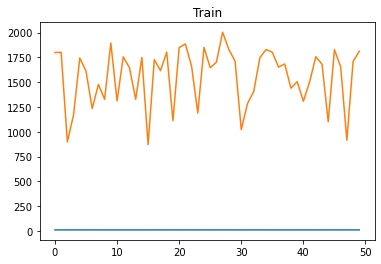

2/2 [==============================] - 2s 18ms/step


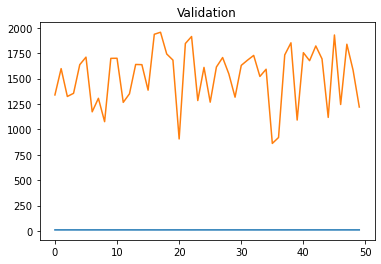

3/3 [==============================] - 0s 8ms/step


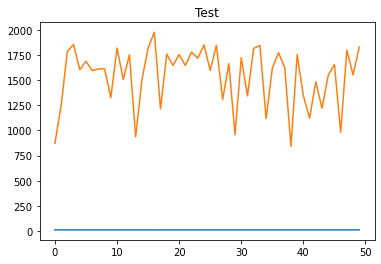

3/3 [==============================] - 0s 9ms/step


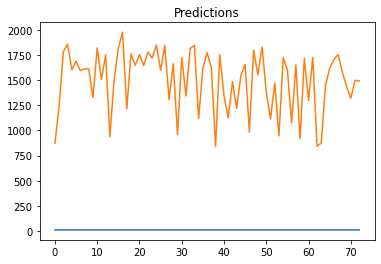

In [18]:
model = keras.Sequential([
    layers.GRU(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_gru/', save_best_only=True)
model = fit_model(model, cp, epochs,  moving_avg_data, target, x_val, y_val)

plot_train("mavg_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_gru_mse = plot_predictions1(model,x_test, y_test)

#### LSTM

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 2390587.2500 - root_mean_squared_error: 1546.1523

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 40s 4s/step - loss: 2418278.0000 - root_mean_squared_error: 1555.0813 - val_loss: 2404092.7500 - val_root_mean_squared_error: 1550.5137
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 2443201.2500 - root_mean_squared_error: 1563.0743

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2418004.7500 - root_mean_squared_error: 1554.9935 - val_loss: 2403813.2500 - val_root_mean_squared_error: 1550.4236
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2417723.0000 - root_mean_squared_error: 1554.9028

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2417723.0000 - root_mean_squared_error: 1554.9028 - val_loss: 2403536.0000 - val_root_mean_squared_error: 1550.3341
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 2437057.2500 - root_mean_squared_error: 1561.1077

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2417444.0000 - root_mean_squared_error: 1554.8132 - val_loss: 2403251.5000 - val_root_mean_squared_error: 1550.2424
Epoch 5/50
5/8 [=================>............] - ETA: 0s - loss: 2392473.0000 - root_mean_squared_error: 1546.7621

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2417155.7500 - root_mean_squared_error: 1554.7205 - val_loss: 2402959.2500 - val_root_mean_squared_error: 1550.1481
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2416860.7500 - root_mean_squared_error: 1554.6256

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2416860.7500 - root_mean_squared_error: 1554.6256 - val_loss: 2402657.5000 - val_root_mean_squared_error: 1550.0508
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2416552.5000 - root_mean_squared_error: 1554.5265

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2416552.5000 - root_mean_squared_error: 1554.5265 - val_loss: 2402352.5000 - val_root_mean_squared_error: 1549.9524
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2416243.5000 - root_mean_squared_error: 1554.4271

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2416243.5000 - root_mean_squared_error: 1554.4271 - val_loss: 2402033.0000 - val_root_mean_squared_error: 1549.8494
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2415922.5000 - root_mean_squared_error: 1554.3239

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2415922.5000 - root_mean_squared_error: 1554.3239 - val_loss: 2401709.2500 - val_root_mean_squared_error: 1549.7449
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2421285.7500 - root_mean_squared_error: 1556.0481

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2415594.7500 - root_mean_squared_error: 1554.2184 - val_loss: 2401375.2500 - val_root_mean_squared_error: 1549.6371
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 2432867.7500 - root_mean_squared_error: 1559.7653

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2415257.2500 - root_mean_squared_error: 1554.1097 - val_loss: 2401029.5000 - val_root_mean_squared_error: 1549.5255
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 2419486.5000 - root_mean_squared_error: 1555.4698

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2414904.7500 - root_mean_squared_error: 1553.9963 - val_loss: 2400670.0000 - val_root_mean_squared_error: 1549.4094
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2407072.2500 - root_mean_squared_error: 1551.4742

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2414536.7500 - root_mean_squared_error: 1553.8779 - val_loss: 2400298.0000 - val_root_mean_squared_error: 1549.2894
Epoch 14/50
8/8 [==============================] - ETA: 0s - loss: 2414156.0000 - root_mean_squared_error: 1553.7555

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2414156.0000 - root_mean_squared_error: 1553.7555 - val_loss: 2399905.7500 - val_root_mean_squared_error: 1549.1630
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2422829.5000 - root_mean_squared_error: 1556.5441

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2413757.2500 - root_mean_squared_error: 1553.6271 - val_loss: 2399494.5000 - val_root_mean_squared_error: 1549.0302
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2405625.7500 - root_mean_squared_error: 1551.0079

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2413339.0000 - root_mean_squared_error: 1553.4926 - val_loss: 2399067.0000 - val_root_mean_squared_error: 1548.8922
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2412903.2500 - root_mean_squared_error: 1553.3523

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2412903.2500 - root_mean_squared_error: 1553.3523 - val_loss: 2398618.5000 - val_root_mean_squared_error: 1548.7474
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2418930.7500 - root_mean_squared_error: 1555.2913

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2412447.7500 - root_mean_squared_error: 1553.2057 - val_loss: 2398157.2500 - val_root_mean_squared_error: 1548.5985
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2399402.0000 - root_mean_squared_error: 1549.0004

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2411976.5000 - root_mean_squared_error: 1553.0540 - val_loss: 2397682.7500 - val_root_mean_squared_error: 1548.4453
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 2362013.2500 - root_mean_squared_error: 1536.8843

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2411493.2500 - root_mean_squared_error: 1552.8983 - val_loss: 2397195.0000 - val_root_mean_squared_error: 1548.2877
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2413150.7500 - root_mean_squared_error: 1553.4319

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2411001.5000 - root_mean_squared_error: 1552.7400 - val_loss: 2396700.2500 - val_root_mean_squared_error: 1548.1279
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2413724.5000 - root_mean_squared_error: 1553.6166

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2410507.2500 - root_mean_squared_error: 1552.5808 - val_loss: 2396209.0000 - val_root_mean_squared_error: 1547.9694
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 2397143.5000 - root_mean_squared_error: 1548.2711

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2410015.0000 - root_mean_squared_error: 1552.4222 - val_loss: 2395723.0000 - val_root_mean_squared_error: 1547.8124
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2408677.7500 - root_mean_squared_error: 1551.9916

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2409531.7500 - root_mean_squared_error: 1552.2666 - val_loss: 2395244.2500 - val_root_mean_squared_error: 1547.6577
Epoch 25/50
7/8 [=========================>....] - ETA: 0s - loss: 2420729.2500 - root_mean_squared_error: 1555.8693

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2409054.0000 - root_mean_squared_error: 1552.1128 - val_loss: 2394765.7500 - val_root_mean_squared_error: 1547.5031
Epoch 26/50
5/8 [=================>............] - ETA: 0s - loss: 2385115.0000 - root_mean_squared_error: 1544.3817

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2408576.0000 - root_mean_squared_error: 1551.9587 - val_loss: 2394293.0000 - val_root_mean_squared_error: 1547.3502
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2408104.0000 - root_mean_squared_error: 1551.8066

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 19s 3s/step - loss: 2408104.0000 - root_mean_squared_error: 1551.8066 - val_loss: 2393818.2500 - val_root_mean_squared_error: 1547.1968
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2407627.7500 - root_mean_squared_error: 1551.6532

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2407627.7500 - root_mean_squared_error: 1551.6532 - val_loss: 2393341.7500 - val_root_mean_squared_error: 1547.0428
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2422042.7500 - root_mean_squared_error: 1556.2914

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2407149.7500 - root_mean_squared_error: 1551.4991 - val_loss: 2392862.2500 - val_root_mean_squared_error: 1546.8879
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2417821.2500 - root_mean_squared_error: 1554.9344

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2406674.0000 - root_mean_squared_error: 1551.3458 - val_loss: 2392380.7500 - val_root_mean_squared_error: 1546.7323
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2406190.7500 - root_mean_squared_error: 1551.1901

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2406190.7500 - root_mean_squared_error: 1551.1901 - val_loss: 2391896.0000 - val_root_mean_squared_error: 1546.5756
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2405705.0000 - root_mean_squared_error: 1551.0336

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 25s 3s/step - loss: 2405705.0000 - root_mean_squared_error: 1551.0336 - val_loss: 2391400.5000 - val_root_mean_squared_error: 1546.4154
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2384913.7500 - root_mean_squared_error: 1544.3167

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2405208.5000 - root_mean_squared_error: 1550.8734 - val_loss: 2390905.7500 - val_root_mean_squared_error: 1546.2554
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2392855.5000 - root_mean_squared_error: 1546.8857

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2404708.5000 - root_mean_squared_error: 1550.7123 - val_loss: 2390324.7500 - val_root_mean_squared_error: 1546.0676
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 2378369.2500 - root_mean_squared_error: 1542.1963

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2403963.2500 - root_mean_squared_error: 1550.4719 - val_loss: 2389359.0000 - val_root_mean_squared_error: 1545.7551
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2392081.0000 - root_mean_squared_error: 1546.6354

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2402957.2500 - root_mean_squared_error: 1550.1475 - val_loss: 2388321.7500 - val_root_mean_squared_error: 1545.4196
Epoch 37/50
5/8 [=================>............] - ETA: 0s - loss: 2441575.5000 - root_mean_squared_error: 1562.5542

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2401924.2500 - root_mean_squared_error: 1549.8142 - val_loss: 2387291.7500 - val_root_mean_squared_error: 1545.0863
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2400903.5000 - root_mean_squared_error: 1549.4849

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2400903.5000 - root_mean_squared_error: 1549.4849 - val_loss: 2386295.2500 - val_root_mean_squared_error: 1544.7639
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2399917.7500 - root_mean_squared_error: 1549.1667

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2399917.7500 - root_mean_squared_error: 1549.1667 - val_loss: 2385329.5000 - val_root_mean_squared_error: 1544.4512
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2402698.0000 - root_mean_squared_error: 1550.0638

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2398963.7500 - root_mean_squared_error: 1548.8589 - val_loss: 2384386.5000 - val_root_mean_squared_error: 1544.1459
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 2398032.2500 - root_mean_squared_error: 1548.5581

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2398032.2500 - root_mean_squared_error: 1548.5581 - val_loss: 2383471.2500 - val_root_mean_squared_error: 1543.8496
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2397129.0000 - root_mean_squared_error: 1548.2665

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2397129.0000 - root_mean_squared_error: 1548.2665 - val_loss: 2382576.2500 - val_root_mean_squared_error: 1543.5596
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2396249.5000 - root_mean_squared_error: 1547.9824

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 22s 3s/step - loss: 2396249.5000 - root_mean_squared_error: 1547.9824 - val_loss: 2381703.5000 - val_root_mean_squared_error: 1543.2767
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2390453.7500 - root_mean_squared_error: 1546.1093

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 2395387.5000 - root_mean_squared_error: 1547.7040 - val_loss: 2380855.5000 - val_root_mean_squared_error: 1543.0021
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2394556.2500 - root_mean_squared_error: 1547.4354

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2394556.2500 - root_mean_squared_error: 1547.4354 - val_loss: 2380035.2500 - val_root_mean_squared_error: 1542.7363
Epoch 46/50
5/8 [=================>............] - ETA: 0s - loss: 2354164.7500 - root_mean_squared_error: 1534.3287

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2393754.7500 - root_mean_squared_error: 1547.1764 - val_loss: 2379250.7500 - val_root_mean_squared_error: 1542.4821
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2388109.7500 - root_mean_squared_error: 1545.3510

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2392984.0000 - root_mean_squared_error: 1546.9272 - val_loss: 2378487.0000 - val_root_mean_squared_error: 1542.2344
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2392232.7500 - root_mean_squared_error: 1546.6844

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2392232.7500 - root_mean_squared_error: 1546.6844 - val_loss: 2377743.0000 - val_root_mean_squared_error: 1541.9932
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2391500.2500 - root_mean_squared_error: 1546.4476

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2391500.2500 - root_mean_squared_error: 1546.4476 - val_loss: 2377011.5000 - val_root_mean_squared_error: 1541.7560
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2396579.7500 - root_mean_squared_error: 1548.0891

INFO:tensorflow:Assets written to: mavg_lstm/assets


INFO:tensorflow:Assets written to: mavg_lstm/assets


8/8 [==============================] - 2s 7ms/step


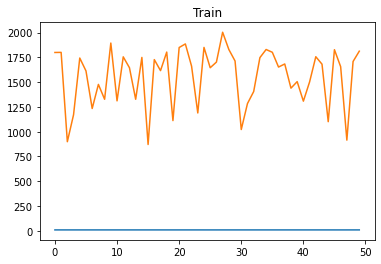

2/2 [==============================] - 3s 6ms/step


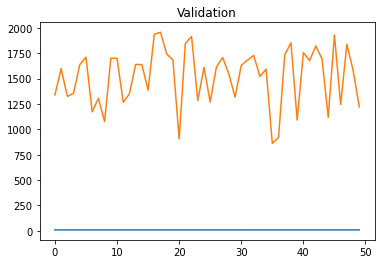

3/3 [==============================] - 0s 6ms/step


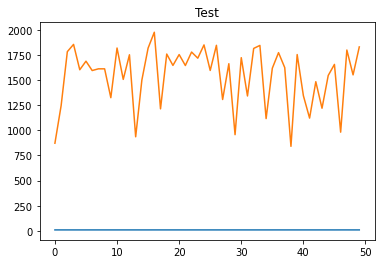

3/3 [==============================] - 0s 8ms/step


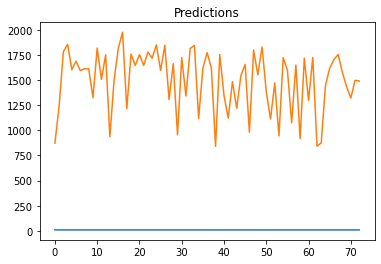

In [19]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

cp = ModelCheckpoint('mavg_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2423439.2500 - root_mean_squared_error: 1556.7400INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 16s 1s/step - loss: 2423439.2500 - root_mean_squared_error: 1556.7400 - val_loss: 2408997.0000 - val_root_mean_squared_error: 1552.0944
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 2470809.5000 - root_mean_squared_error: 1571.8809INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2422580.2500 - root_mean_squared_error: 1556.4640 - val_loss: 2408143.5000 - val_root_mean_squared_error: 1551.8195
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2424509.5000 - root_mean_squared_error: 1557.0836INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2421718.7500 - root_mean_squared_error: 1556.1873 - val_loss: 2407291.2500 - val_root_mean_squared_error: 1551.5447
Epoch 4/50
5/8 [=================>............] - ETA: 0s - loss: 2466182.0000 - root_mean_squared_error: 1570.4082INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2420855.5000 - root_mean_squared_error: 1555.9099 - val_loss: 2406427.2500 - val_root_mean_squared_error: 1551.2664
Epoch 5/50
5/8 [=================>............] - ETA: 0s - loss: 2425263.2500 - root_mean_squared_error: 1557.3257INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2419981.7500 - root_mean_squared_error: 1555.6290 - val_loss: 2405555.5000 - val_root_mean_squared_error: 1550.9854
Epoch 6/50
5/8 [=================>............] - ETA: 0s - loss: 2396240.5000 - root_mean_squared_error: 1547.9795INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2419101.2500 - root_mean_squared_error: 1555.3461 - val_loss: 2404679.5000 - val_root_mean_squared_error: 1550.7029
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 2392694.7500 - root_mean_squared_error: 1546.8337INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2418215.5000 - root_mean_squared_error: 1555.0613 - val_loss: 2403792.0000 - val_root_mean_squared_error: 1550.4167
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2409618.5000 - root_mean_squared_error: 1552.2946INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2417323.0000 - root_mean_squared_error: 1554.7743 - val_loss: 2402901.2500 - val_root_mean_squared_error: 1550.1294
Epoch 9/50
5/8 [=================>............] - ETA: 0s - loss: 2441399.5000 - root_mean_squared_error: 1562.4978INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2416429.0000 - root_mean_squared_error: 1554.4867 - val_loss: 2402007.5000 - val_root_mean_squared_error: 1549.8412
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2395942.7500 - root_mean_squared_error: 1547.8833INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2415532.5000 - root_mean_squared_error: 1554.1984 - val_loss: 2401112.5000 - val_root_mean_squared_error: 1549.5524
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2421575.2500 - root_mean_squared_error: 1556.1411INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2414634.0000 - root_mean_squared_error: 1553.9093 - val_loss: 2400211.7500 - val_root_mean_squared_error: 1549.2617
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2413735.5000 - root_mean_squared_error: 1553.6201INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2413735.5000 - root_mean_squared_error: 1553.6201 - val_loss: 2399318.0000 - val_root_mean_squared_error: 1548.9733
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2413906.0000 - root_mean_squared_error: 1553.6750INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2412839.2500 - root_mean_squared_error: 1553.3317 - val_loss: 2398427.0000 - val_root_mean_squared_error: 1548.6855
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 2402849.2500 - root_mean_squared_error: 1550.1127INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2411953.5000 - root_mean_squared_error: 1553.0465 - val_loss: 2397530.5000 - val_root_mean_squared_error: 1548.3961
Epoch 15/50
5/8 [=================>............] - ETA: 0s - loss: 2374368.5000 - root_mean_squared_error: 1540.8986INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2411053.7500 - root_mean_squared_error: 1552.7568 - val_loss: 2396631.7500 - val_root_mean_squared_error: 1548.1058
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 2410155.0000 - root_mean_squared_error: 1552.4674INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2410155.0000 - root_mean_squared_error: 1552.4674 - val_loss: 2395734.0000 - val_root_mean_squared_error: 1547.8159
Epoch 17/50
5/8 [=================>............] - ETA: 0s - loss: 2388740.7500 - root_mean_squared_error: 1545.5552INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2409258.0000 - root_mean_squared_error: 1552.1785 - val_loss: 2394839.0000 - val_root_mean_squared_error: 1547.5267
Epoch 18/50
5/8 [=================>............] - ETA: 0s - loss: 2373291.5000 - root_mean_squared_error: 1540.5491INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2408364.2500 - root_mean_squared_error: 1551.8905 - val_loss: 2393949.0000 - val_root_mean_squared_error: 1547.2391
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2393678.7500 - root_mean_squared_error: 1547.1519INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2407478.0000 - root_mean_squared_error: 1551.6050 - val_loss: 2393058.2500 - val_root_mean_squared_error: 1546.9513
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 2396512.2500 - root_mean_squared_error: 1548.0673INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2406589.0000 - root_mean_squared_error: 1551.3185 - val_loss: 2392181.5000 - val_root_mean_squared_error: 1546.6678
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 2379557.7500 - root_mean_squared_error: 1542.5815INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2405721.5000 - root_mean_squared_error: 1551.0388 - val_loss: 2391326.0000 - val_root_mean_squared_error: 1546.3912
Epoch 22/50
5/8 [=================>............] - ETA: 0s - loss: 2413101.7500 - root_mean_squared_error: 1553.4161INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2404878.0000 - root_mean_squared_error: 1550.7670 - val_loss: 2390491.7500 - val_root_mean_squared_error: 1546.1215
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2429984.7500 - root_mean_squared_error: 1558.8408INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2404058.5000 - root_mean_squared_error: 1550.5027 - val_loss: 2389686.5000 - val_root_mean_squared_error: 1545.8611
Epoch 24/50
1/8 [==>...........................] - ETA: 0s - loss: 2566269.5000 - root_mean_squared_error: 1601.9580INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2403269.2500 - root_mean_squared_error: 1550.2482 - val_loss: 2388920.2500 - val_root_mean_squared_error: 1545.6133
Epoch 25/50
5/8 [=================>............] - ETA: 0s - loss: 2446071.5000 - root_mean_squared_error: 1563.9922INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2402513.2500 - root_mean_squared_error: 1550.0043 - val_loss: 2388178.5000 - val_root_mean_squared_error: 1545.3733
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2415880.2500 - root_mean_squared_error: 1554.3102INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2401785.5000 - root_mean_squared_error: 1549.7695 - val_loss: 2387469.7500 - val_root_mean_squared_error: 1545.1439
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 2443048.0000 - root_mean_squared_error: 1563.0253INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2401098.5000 - root_mean_squared_error: 1549.5479 - val_loss: 2386796.5000 - val_root_mean_squared_error: 1544.9260
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 2396758.7500 - root_mean_squared_error: 1548.1469INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 818ms/step - loss: 2400439.5000 - root_mean_squared_error: 1549.3352 - val_loss: 2386153.5000 - val_root_mean_squared_error: 1544.7179
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2399809.7500 - root_mean_squared_error: 1549.1320INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2399809.7500 - root_mean_squared_error: 1549.1320 - val_loss: 2385542.0000 - val_root_mean_squared_error: 1544.5199
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2400670.7500 - root_mean_squared_error: 1549.4098INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2399213.2500 - root_mean_squared_error: 1548.9395 - val_loss: 2384960.0000 - val_root_mean_squared_error: 1544.3315
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2386117.2500 - root_mean_squared_error: 1544.7062INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 6s 897ms/step - loss: 2398646.5000 - root_mean_squared_error: 1548.7565 - val_loss: 2384404.5000 - val_root_mean_squared_error: 1544.1517
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 2400402.2500 - root_mean_squared_error: 1549.3231INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2398103.5000 - root_mean_squared_error: 1548.5812 - val_loss: 2383872.7500 - val_root_mean_squared_error: 1543.9795
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2397589.0000 - root_mean_squared_error: 1548.4150INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2397589.0000 - root_mean_squared_error: 1548.4150 - val_loss: 2383363.2500 - val_root_mean_squared_error: 1543.8145
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2397094.7500 - root_mean_squared_error: 1548.2554INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2397094.7500 - root_mean_squared_error: 1548.2554 - val_loss: 2382880.5000 - val_root_mean_squared_error: 1543.6582
Epoch 35/50
5/8 [=================>............] - ETA: 0s - loss: 2379261.7500 - root_mean_squared_error: 1542.4856INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2396627.2500 - root_mean_squared_error: 1548.1044 - val_loss: 2382425.0000 - val_root_mean_squared_error: 1543.5106
Epoch 36/50
6/8 [=====================>........] - ETA: 0s - loss: 2404293.0000 - root_mean_squared_error: 1550.5782INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2396185.2500 - root_mean_squared_error: 1547.9617 - val_loss: 2381992.2500 - val_root_mean_squared_error: 1543.3704
Epoch 37/50
5/8 [=================>............] - ETA: 0s - loss: 2364874.5000 - root_mean_squared_error: 1537.8148INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2395765.0000 - root_mean_squared_error: 1547.8259 - val_loss: 2381578.0000 - val_root_mean_squared_error: 1543.2362
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 2373795.0000 - root_mean_squared_error: 1540.7125INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 2395362.5000 - root_mean_squared_error: 1547.6959 - val_loss: 2381180.2500 - val_root_mean_squared_error: 1543.1073
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2398296.7500 - root_mean_squared_error: 1548.6436INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2394976.7500 - root_mean_squared_error: 1547.5713 - val_loss: 2380799.2500 - val_root_mean_squared_error: 1542.9840
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2401198.0000 - root_mean_squared_error: 1549.5800INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 958ms/step - loss: 2394607.5000 - root_mean_squared_error: 1547.4519 - val_loss: 2380432.2500 - val_root_mean_squared_error: 1542.8650
Epoch 41/50
1/8 [==>...........................] - ETA: 0s - loss: 2412639.0000 - root_mean_squared_error: 1553.2672INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2394251.0000 - root_mean_squared_error: 1547.3368 - val_loss: 2380080.0000 - val_root_mean_squared_error: 1542.7507
Epoch 42/50
1/8 [==>...........................] - ETA: 0s - loss: 2397084.0000 - root_mean_squared_error: 1548.2520INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2393906.0000 - root_mean_squared_error: 1547.2252 - val_loss: 2379738.7500 - val_root_mean_squared_error: 1542.6401
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 2397145.0000 - root_mean_squared_error: 1548.2716INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2393574.0000 - root_mean_squared_error: 1547.1179 - val_loss: 2379404.7500 - val_root_mean_squared_error: 1542.5320
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2387939.7500 - root_mean_squared_error: 1545.2960INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 7s 989ms/step - loss: 2393249.0000 - root_mean_squared_error: 1547.0129 - val_loss: 2379084.2500 - val_root_mean_squared_error: 1542.4280
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2392936.7500 - root_mean_squared_error: 1546.9120INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2392936.7500 - root_mean_squared_error: 1546.9120 - val_loss: 2378770.2500 - val_root_mean_squared_error: 1542.3263
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 2379785.2500 - root_mean_squared_error: 1542.6553INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2392628.2500 - root_mean_squared_error: 1546.8123 - val_loss: 2378465.0000 - val_root_mean_squared_error: 1542.2273
Epoch 47/50
5/8 [=================>............] - ETA: 0s - loss: 2364479.2500 - root_mean_squared_error: 1537.6863INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2392330.2500 - root_mean_squared_error: 1546.7159 - val_loss: 2378168.2500 - val_root_mean_squared_error: 1542.1311
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2388547.2500 - root_mean_squared_error: 1545.4926INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2392040.0000 - root_mean_squared_error: 1546.6221 - val_loss: 2377879.5000 - val_root_mean_squared_error: 1542.0375
Epoch 49/50
6/8 [=====================>........] - ETA: 0s - loss: 2412358.7500 - root_mean_squared_error: 1553.1770INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2391758.0000 - root_mean_squared_error: 1546.5310 - val_loss: 2377596.2500 - val_root_mean_squared_error: 1541.9456
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2391481.7500 - root_mean_squared_error: 1546.4417INFO:tensorflow:Assets written to: mavg_rnn/assets


INFO:tensorflow:Assets written to: mavg_rnn/assets


8/8 [==============================] - 3s 9ms/step


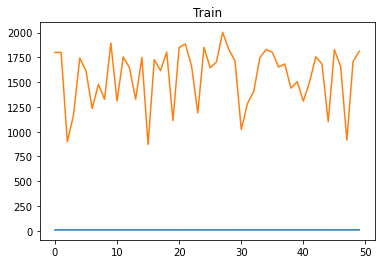

2/2 [==============================] - 1s 5ms/step


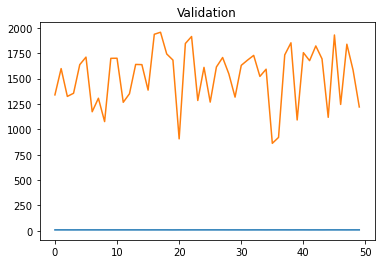

3/3 [==============================] - 0s 6ms/step


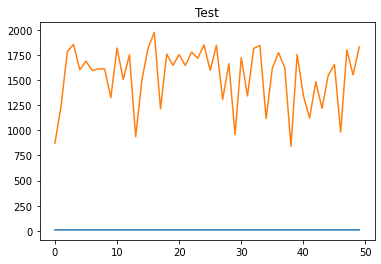

3/3 [==============================] - 0s 7ms/step


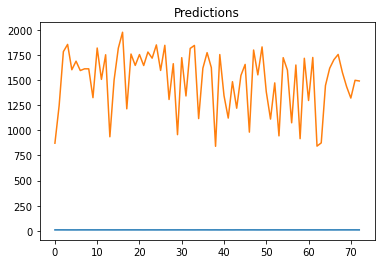

In [20]:
model = keras.Sequential([
    layers.SimpleRNN(units=64, input_shape=(15, 1)),
    layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mvg_rnn_mse = plot_predictions1(model,x_test, y_test)

# AutoEncoder

### CNN

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 2404344.2500 - root_mean_squared_error: 1550.5948 

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 9s 864ms/step - loss: 2417511.0000 - root_mean_squared_error: 1554.8347 - val_loss: 2398625.5000 - val_root_mean_squared_error: 1548.7496
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 2432273.0000 - root_mean_squared_error: 1559.5746

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 790ms/step - loss: 2404511.0000 - root_mean_squared_error: 1550.6486 - val_loss: 2385072.2500 - val_root_mean_squared_error: 1544.3679
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 2382037.0000 - root_mean_squared_error: 1543.3849

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2393265.5000 - root_mean_squared_error: 1547.0183 - val_loss: 2369001.7500 - val_root_mean_squared_error: 1539.1561
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 2360605.7500 - root_mean_squared_error: 1536.4263

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2378461.0000 - root_mean_squared_error: 1542.2260 - val_loss: 2352742.5000 - val_root_mean_squared_error: 1533.8652
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2379091.2500 - root_mean_squared_error: 1542.4303

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 619ms/step - loss: 2361888.5000 - root_mean_squared_error: 1536.8436 - val_loss: 2335834.0000 - val_root_mean_squared_error: 1528.3435
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 2332639.5000 - root_mean_squared_error: 1527.2981

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 515ms/step - loss: 2344979.5000 - root_mean_squared_error: 1531.3326 - val_loss: 2318455.2500 - val_root_mean_squared_error: 1522.6475
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 2319032.0000 - root_mean_squared_error: 1522.8368

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 644ms/step - loss: 2327375.7500 - root_mean_squared_error: 1525.5739 - val_loss: 2300342.5000 - val_root_mean_squared_error: 1516.6880
Epoch 8/50
5/8 [=================>............] - ETA: 0s - loss: 2313659.7500 - root_mean_squared_error: 1521.0719

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2310855.0000 - root_mean_squared_error: 1520.1497 - val_loss: 2281482.5000 - val_root_mean_squared_error: 1510.4578
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2292297.0000 - root_mean_squared_error: 1514.0333

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2292297.0000 - root_mean_squared_error: 1514.0333 - val_loss: 2261577.0000 - val_root_mean_squared_error: 1503.8540
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 2261123.2500 - root_mean_squared_error: 1503.7031

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 694ms/step - loss: 2272356.0000 - root_mean_squared_error: 1507.4336 - val_loss: 2240488.2500 - val_root_mean_squared_error: 1496.8262
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 2292789.7500 - root_mean_squared_error: 1514.1960

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 696ms/step - loss: 2251268.7500 - root_mean_squared_error: 1500.4229 - val_loss: 2217604.5000 - val_root_mean_squared_error: 1489.1624
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 2226105.7500 - root_mean_squared_error: 1492.0140

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 684ms/step - loss: 2226003.7500 - root_mean_squared_error: 1491.9799 - val_loss: 2193350.5000 - val_root_mean_squared_error: 1480.9965
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2227823.0000 - root_mean_squared_error: 1492.5894

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 580ms/step - loss: 2203080.7500 - root_mean_squared_error: 1484.2778 - val_loss: 2167484.7500 - val_root_mean_squared_error: 1472.2380
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 2262680.5000 - root_mean_squared_error: 1504.2209

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 950ms/step - loss: 2177418.7500 - root_mean_squared_error: 1475.6079 - val_loss: 2139907.2500 - val_root_mean_squared_error: 1462.8422
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 2152541.7500 - root_mean_squared_error: 1467.1543

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2150664.5000 - root_mean_squared_error: 1466.5144 - val_loss: 2110248.7500 - val_root_mean_squared_error: 1452.6696
Epoch 16/50
5/8 [=================>............] - ETA: 0s - loss: 2166161.7500 - root_mean_squared_error: 1471.7886

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 901ms/step - loss: 2118613.5000 - root_mean_squared_error: 1455.5458 - val_loss: 2078626.7500 - val_root_mean_squared_error: 1441.7444
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2088242.6250 - root_mean_squared_error: 1445.0753

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 693ms/step - loss: 2088242.6250 - root_mean_squared_error: 1445.0753 - val_loss: 2045019.0000 - val_root_mean_squared_error: 1430.0416
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 2042298.3750 - root_mean_squared_error: 1429.0901

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2054211.0000 - root_mean_squared_error: 1433.2520 - val_loss: 2009461.0000 - val_root_mean_squared_error: 1417.5546
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2004491.0000 - root_mean_squared_error: 1415.8005

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 899ms/step - loss: 2017926.0000 - root_mean_squared_error: 1420.5372 - val_loss: 1971501.0000 - val_root_mean_squared_error: 1404.1014
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 2003423.0000 - root_mean_squared_error: 1415.4232

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1983395.6250 - root_mean_squared_error: 1408.3308 - val_loss: 1930797.0000 - val_root_mean_squared_error: 1389.5312
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 1947762.6250 - root_mean_squared_error: 1395.6227

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 751ms/step - loss: 1940387.5000 - root_mean_squared_error: 1392.9779 - val_loss: 1888320.0000 - val_root_mean_squared_error: 1374.1616
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 1901904.5000 - root_mean_squared_error: 1379.0956

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 774ms/step - loss: 1901900.0000 - root_mean_squared_error: 1379.0939 - val_loss: 1843705.3750 - val_root_mean_squared_error: 1357.8312
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 1856093.6250 - root_mean_squared_error: 1362.3853

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 647ms/step - loss: 1856093.6250 - root_mean_squared_error: 1362.3853 - val_loss: 1796705.1250 - val_root_mean_squared_error: 1340.4124
Epoch 24/50
4/8 [==============>...............] - ETA: 0s - loss: 1882396.7500 - root_mean_squared_error: 1372.0046

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 988ms/step - loss: 1807003.1250 - root_mean_squared_error: 1344.2482 - val_loss: 1747467.6250 - val_root_mean_squared_error: 1321.9182
Epoch 25/50
5/8 [=================>............] - ETA: 0s - loss: 1748930.3750 - root_mean_squared_error: 1322.4713

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 13s 2s/step - loss: 1759118.1250 - root_mean_squared_error: 1326.3175 - val_loss: 1696261.6250 - val_root_mean_squared_error: 1302.4061
Epoch 26/50
5/8 [=================>............] - ETA: 0s - loss: 1781635.3750 - root_mean_squared_error: 1334.7792

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 894ms/step - loss: 1712159.8750 - root_mean_squared_error: 1308.4952 - val_loss: 1642420.3750 - val_root_mean_squared_error: 1281.5695
Epoch 27/50
7/8 [=========================>....] - ETA: 0s - loss: 1651011.1250 - root_mean_squared_error: 1284.9167

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 633ms/step - loss: 1657352.8750 - root_mean_squared_error: 1287.3822 - val_loss: 1587175.1250 - val_root_mean_squared_error: 1259.8314
Epoch 28/50
5/8 [=================>............] - ETA: 0s - loss: 1613898.3750 - root_mean_squared_error: 1270.3929

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 676ms/step - loss: 1601489.1250 - root_mean_squared_error: 1265.4995 - val_loss: 1529717.5000 - val_root_mean_squared_error: 1236.8175
Epoch 29/50
5/8 [=================>............] - ETA: 0s - loss: 1525272.3750 - root_mean_squared_error: 1235.0192

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 508ms/step - loss: 1543575.5000 - root_mean_squared_error: 1242.4071 - val_loss: 1470287.5000 - val_root_mean_squared_error: 1212.5541
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 1487101.3750 - root_mean_squared_error: 1219.4677

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 861ms/step - loss: 1487101.3750 - root_mean_squared_error: 1219.4677 - val_loss: 1409294.1250 - val_root_mean_squared_error: 1187.1370
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 1427796.0000 - root_mean_squared_error: 1194.9042

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 609ms/step - loss: 1421030.0000 - root_mean_squared_error: 1192.0696 - val_loss: 1347014.5000 - val_root_mean_squared_error: 1160.6095
Epoch 32/50
5/8 [=================>............] - ETA: 0s - loss: 1354710.1250 - root_mean_squared_error: 1163.9202

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 961ms/step - loss: 1364824.5000 - root_mean_squared_error: 1168.2571 - val_loss: 1283984.8750 - val_root_mean_squared_error: 1133.1306
Epoch 33/50
5/8 [=================>............] - ETA: 0s - loss: 1348464.2500 - root_mean_squared_error: 1161.2339

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 840ms/step - loss: 1298961.1250 - root_mean_squared_error: 1139.7197 - val_loss: 1219689.0000 - val_root_mean_squared_error: 1104.3953
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 1238952.5000 - root_mean_squared_error: 1113.0824

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1234720.7500 - root_mean_squared_error: 1111.1799 - val_loss: 1154892.8750 - val_root_mean_squared_error: 1074.6594
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 1202546.2500 - root_mean_squared_error: 1096.6067

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 1176208.6250 - root_mean_squared_error: 1084.5315 - val_loss: 1089456.0000 - val_root_mean_squared_error: 1043.7701
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 1109066.0000 - root_mean_squared_error: 1053.1221

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 564ms/step - loss: 1109066.0000 - root_mean_squared_error: 1053.1221 - val_loss: 1023881.8125 - val_root_mean_squared_error: 1011.8704
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 1045749.6875 - root_mean_squared_error: 1022.6190

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 826ms/step - loss: 1048012.9375 - root_mean_squared_error: 1023.7250 - val_loss: 958767.9375 - val_root_mean_squared_error: 979.1669
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 989416.3125 - root_mean_squared_error: 994.6941  

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 711ms/step - loss: 982014.2500 - root_mean_squared_error: 990.9663 - val_loss: 894065.8125 - val_root_mean_squared_error: 945.5505
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 910130.4375 - root_mean_squared_error: 954.0076

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 660ms/step - loss: 919763.1250 - root_mean_squared_error: 959.0428 - val_loss: 830759.1250 - val_root_mean_squared_error: 911.4599
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 870910.5000 - root_mean_squared_error: 933.2258

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 7s 930ms/step - loss: 861741.1875 - root_mean_squared_error: 928.3002 - val_loss: 768509.4375 - val_root_mean_squared_error: 876.6467
Epoch 41/50
8/8 [==============================] - ETA: 0s - loss: 796426.9375 - root_mean_squared_error: 892.4276

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 10s 1s/step - loss: 796426.9375 - root_mean_squared_error: 892.4276 - val_loss: 707889.3125 - val_root_mean_squared_error: 841.3616
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 736723.1250 - root_mean_squared_error: 858.3257

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 739ms/step - loss: 736723.1250 - root_mean_squared_error: 858.3257 - val_loss: 648925.4375 - val_root_mean_squared_error: 805.5591
Epoch 43/50
5/8 [=================>............] - ETA: 0s - loss: 671237.6875 - root_mean_squared_error: 819.2910

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 810ms/step - loss: 680335.9375 - root_mean_squared_error: 824.8248 - val_loss: 592026.7500 - val_root_mean_squared_error: 769.4327
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 604956.6250 - root_mean_squared_error: 777.7896

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 5s 656ms/step - loss: 627034.6875 - root_mean_squared_error: 791.8552 - val_loss: 539025.6250 - val_root_mean_squared_error: 734.1837
Epoch 45/50
5/8 [=================>............] - ETA: 0s - loss: 571835.1875 - root_mean_squared_error: 756.1979

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 857ms/step - loss: 570569.3125 - root_mean_squared_error: 755.3604 - val_loss: 489019.8125 - val_root_mean_squared_error: 699.2995
Epoch 46/50
5/8 [=================>............] - ETA: 0s - loss: 575011.1250 - root_mean_squared_error: 758.2949

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 10s 1s/step - loss: 526735.3125 - root_mean_squared_error: 725.7653 - val_loss: 441821.1250 - val_root_mean_squared_error: 664.6963
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 475656.7812 - root_mean_squared_error: 689.6788

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 4s 628ms/step - loss: 475656.7812 - root_mean_squared_error: 689.6788 - val_loss: 398643.5312 - val_root_mean_squared_error: 631.3823
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 441529.0312 - root_mean_squared_error: 664.4765

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 6s 896ms/step - loss: 437592.9688 - root_mean_squared_error: 661.5081 - val_loss: 358297.1250 - val_root_mean_squared_error: 598.5793
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 423526.1562 - root_mean_squared_error: 650.7889

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 3s 476ms/step - loss: 393820.2500 - root_mean_squared_error: 627.5510 - val_loss: 322441.1875 - val_root_mean_squared_error: 567.8391
Epoch 50/50
5/8 [=================>............] - ETA: 0s - loss: 333176.5938 - root_mean_squared_error: 577.2145

INFO:tensorflow:Assets written to: autoencoder_cnn/assets


INFO:tensorflow:Assets written to: autoencoder_cnn/assets


8/8 [==============================] - 1s 10ms/step


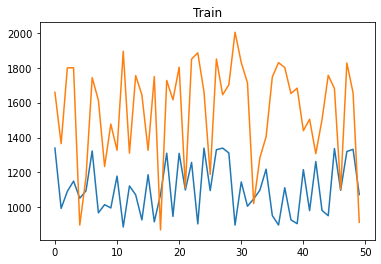

2/2 [==============================] - 0s 6ms/step


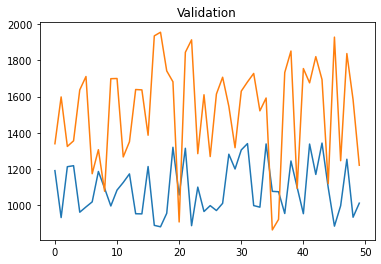

3/3 [==============================] - 0s 4ms/step


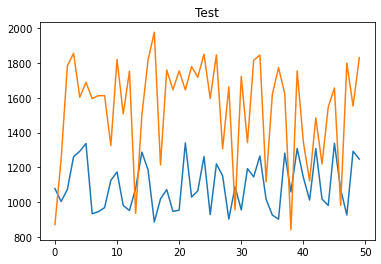

3/3 [==============================] - 0s 4ms/step


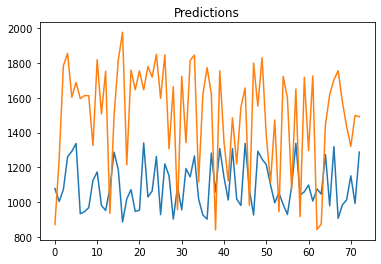

In [21]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_cnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [22]:
auto_cnn_mse

264882.68078981875

### GRU

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2420277.5000 - root_mean_squared_error: 1555.7241

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 44s 4s/step - loss: 2420277.5000 - root_mean_squared_error: 1555.7241 - val_loss: 2406920.0000 - val_root_mean_squared_error: 1551.4252
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2410909.2500 - root_mean_squared_error: 1552.7103

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2419625.0000 - root_mean_squared_error: 1555.5144 - val_loss: 2406293.0000 - val_root_mean_squared_error: 1551.2230
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 2399509.7500 - root_mean_squared_error: 1549.0352

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2419197.5000 - root_mean_squared_error: 1555.3770 - val_loss: 2405667.7500 - val_root_mean_squared_error: 1551.0215
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2416635.7500 - root_mean_squared_error: 1554.5532

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2418462.2500 - root_mean_squared_error: 1555.1406 - val_loss: 2405043.0000 - val_root_mean_squared_error: 1550.8201
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2426500.0000 - root_mean_squared_error: 1557.7227

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2417887.2500 - root_mean_squared_error: 1554.9557 - val_loss: 2404410.7500 - val_root_mean_squared_error: 1550.6162
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2417144.2500 - root_mean_squared_error: 1554.7168

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2417144.2500 - root_mean_squared_error: 1554.7168 - val_loss: 2403774.2500 - val_root_mean_squared_error: 1550.4110
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 2439489.2500 - root_mean_squared_error: 1561.8865

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2416577.5000 - root_mean_squared_error: 1554.5345 - val_loss: 2403126.2500 - val_root_mean_squared_error: 1550.2020
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2440527.5000 - root_mean_squared_error: 1562.2188

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 2415980.5000 - root_mean_squared_error: 1554.3424 - val_loss: 2402469.0000 - val_root_mean_squared_error: 1549.9900
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2415326.0000 - root_mean_squared_error: 1554.1320

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2415326.0000 - root_mean_squared_error: 1554.1320 - val_loss: 2401803.5000 - val_root_mean_squared_error: 1549.7753
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 2434491.5000 - root_mean_squared_error: 1560.2858

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2414532.7500 - root_mean_squared_error: 1553.8767 - val_loss: 2401121.0000 - val_root_mean_squared_error: 1549.5551
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2396299.5000 - root_mean_squared_error: 1547.9985

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2413941.2500 - root_mean_squared_error: 1553.6864 - val_loss: 2400422.2500 - val_root_mean_squared_error: 1549.3296
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 2432608.7500 - root_mean_squared_error: 1559.6823

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2413140.0000 - root_mean_squared_error: 1553.4285 - val_loss: 2399706.2500 - val_root_mean_squared_error: 1549.0985
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2412462.0000 - root_mean_squared_error: 1553.2102

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2412484.0000 - root_mean_squared_error: 1553.2173 - val_loss: 2398977.7500 - val_root_mean_squared_error: 1548.8634
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 2427462.0000 - root_mean_squared_error: 1558.0315

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2411650.5000 - root_mean_squared_error: 1552.9490 - val_loss: 2398225.7500 - val_root_mean_squared_error: 1548.6206
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2403201.7500 - root_mean_squared_error: 1550.2263

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2411107.2500 - root_mean_squared_error: 1552.7740 - val_loss: 2397459.2500 - val_root_mean_squared_error: 1548.3730
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2393400.0000 - root_mean_squared_error: 1547.0618

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2410137.5000 - root_mean_squared_error: 1552.4618 - val_loss: 2396672.0000 - val_root_mean_squared_error: 1548.1189
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2419590.7500 - root_mean_squared_error: 1555.5034

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2409441.2500 - root_mean_squared_error: 1552.2375 - val_loss: 2395867.7500 - val_root_mean_squared_error: 1547.8591
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2408765.5000 - root_mean_squared_error: 1552.0198

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2408765.5000 - root_mean_squared_error: 1552.0198 - val_loss: 2395049.5000 - val_root_mean_squared_error: 1547.5947
Epoch 19/50
6/8 [=====================>........] - ETA: 0s - loss: 2334871.2500 - root_mean_squared_error: 1528.0286

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2407714.7500 - root_mean_squared_error: 1551.6813 - val_loss: 2394214.2500 - val_root_mean_squared_error: 1547.3248
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2428720.0000 - root_mean_squared_error: 1558.4351

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2406812.2500 - root_mean_squared_error: 1551.3904 - val_loss: 2393351.5000 - val_root_mean_squared_error: 1547.0460
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2405995.7500 - root_mean_squared_error: 1551.1272

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2405995.7500 - root_mean_squared_error: 1551.1272 - val_loss: 2392486.0000 - val_root_mean_squared_error: 1546.7664
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2405033.0000 - root_mean_squared_error: 1550.8169

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2405033.0000 - root_mean_squared_error: 1550.8169 - val_loss: 2391597.2500 - val_root_mean_squared_error: 1546.4790
Epoch 23/50
7/8 [=========================>....] - ETA: 0s - loss: 2398293.7500 - root_mean_squared_error: 1548.6426

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2404146.7500 - root_mean_squared_error: 1550.5311 - val_loss: 2390699.0000 - val_root_mean_squared_error: 1546.1886
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2403459.0000 - root_mean_squared_error: 1550.3093

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2403459.0000 - root_mean_squared_error: 1550.3093 - val_loss: 2389799.5000 - val_root_mean_squared_error: 1545.8976
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2402428.7500 - root_mean_squared_error: 1549.9771

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2402428.7500 - root_mean_squared_error: 1549.9771 - val_loss: 2388891.5000 - val_root_mean_squared_error: 1545.6039
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2401523.5000 - root_mean_squared_error: 1549.6849

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2401523.5000 - root_mean_squared_error: 1549.6849 - val_loss: 2387981.0000 - val_root_mean_squared_error: 1545.3093
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 2439721.2500 - root_mean_squared_error: 1561.9607

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2400729.7500 - root_mean_squared_error: 1549.4288 - val_loss: 2387078.0000 - val_root_mean_squared_error: 1545.0172
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 2316852.0000 - root_mean_squared_error: 1522.1208

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2399777.5000 - root_mean_squared_error: 1549.1216 - val_loss: 2386193.0000 - val_root_mean_squared_error: 1544.7307
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2388158.7500 - root_mean_squared_error: 1545.3668

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2398910.2500 - root_mean_squared_error: 1548.8416 - val_loss: 2385297.7500 - val_root_mean_squared_error: 1544.4409
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2405193.5000 - root_mean_squared_error: 1550.8687

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 25s 3s/step - loss: 2398098.7500 - root_mean_squared_error: 1548.5796 - val_loss: 2384416.7500 - val_root_mean_squared_error: 1544.1556
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 2401054.7500 - root_mean_squared_error: 1549.5337

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 2397006.2500 - root_mean_squared_error: 1548.2268 - val_loss: 2383559.7500 - val_root_mean_squared_error: 1543.8782
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2391660.7500 - root_mean_squared_error: 1546.4995

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 24s 3s/step - loss: 2396185.7500 - root_mean_squared_error: 1547.9618 - val_loss: 2382713.5000 - val_root_mean_squared_error: 1543.6040
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2419538.2500 - root_mean_squared_error: 1555.4865

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2395518.5000 - root_mean_squared_error: 1547.7462 - val_loss: 2381892.5000 - val_root_mean_squared_error: 1543.3381
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2407755.5000 - root_mean_squared_error: 1551.6943

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2394680.0000 - root_mean_squared_error: 1547.4753 - val_loss: 2381098.5000 - val_root_mean_squared_error: 1543.0808
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 2406660.2500 - root_mean_squared_error: 1551.3414

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2393976.2500 - root_mean_squared_error: 1547.2479 - val_loss: 2380330.2500 - val_root_mean_squared_error: 1542.8319
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2393224.7500 - root_mean_squared_error: 1547.0051

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2393224.7500 - root_mean_squared_error: 1547.0051 - val_loss: 2379590.5000 - val_root_mean_squared_error: 1542.5922
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2374039.5000 - root_mean_squared_error: 1540.7919

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2392438.0000 - root_mean_squared_error: 1546.7507 - val_loss: 2378881.7500 - val_root_mean_squared_error: 1542.3624
Epoch 38/50
8/8 [==============================] - ETA: 0s - loss: 2391727.0000 - root_mean_squared_error: 1546.5209

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 2391727.0000 - root_mean_squared_error: 1546.5209 - val_loss: 2378189.2500 - val_root_mean_squared_error: 1542.1379
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2386808.7500 - root_mean_squared_error: 1544.9301

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2390917.2500 - root_mean_squared_error: 1546.2592 - val_loss: 2377525.7500 - val_root_mean_squared_error: 1541.9226
Epoch 40/50
7/8 [=========================>....] - ETA: 0s - loss: 2381037.7500 - root_mean_squared_error: 1543.0612

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2390367.7500 - root_mean_squared_error: 1546.0814 - val_loss: 2376889.7500 - val_root_mean_squared_error: 1541.7166
Epoch 41/50
6/8 [=====================>........] - ETA: 0s - loss: 2359131.5000 - root_mean_squared_error: 1535.9464

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2389558.2500 - root_mean_squared_error: 1545.8196 - val_loss: 2376279.5000 - val_root_mean_squared_error: 1541.5186
Epoch 42/50
8/8 [==============================] - ETA: 0s - loss: 2389353.0000 - root_mean_squared_error: 1545.7532

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2389353.0000 - root_mean_squared_error: 1545.7532 - val_loss: 2375702.5000 - val_root_mean_squared_error: 1541.3314
Epoch 43/50
7/8 [=========================>....] - ETA: 0s - loss: 2376345.2500 - root_mean_squared_error: 1541.5399

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2388667.2500 - root_mean_squared_error: 1545.5314 - val_loss: 2375157.0000 - val_root_mean_squared_error: 1541.1543
Epoch 44/50
6/8 [=====================>........] - ETA: 0s - loss: 2381724.2500 - root_mean_squared_error: 1543.2836

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2388063.2500 - root_mean_squared_error: 1545.3359 - val_loss: 2374632.7500 - val_root_mean_squared_error: 1540.9844
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2380115.5000 - root_mean_squared_error: 1542.7623

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2387555.0000 - root_mean_squared_error: 1545.1715 - val_loss: 2374130.7500 - val_root_mean_squared_error: 1540.8214
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2370365.0000 - root_mean_squared_error: 1539.5990

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 2387017.5000 - root_mean_squared_error: 1544.9976 - val_loss: 2373652.5000 - val_root_mean_squared_error: 1540.6663
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2386462.7500 - root_mean_squared_error: 1544.8180

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 22s 3s/step - loss: 2386462.7500 - root_mean_squared_error: 1544.8180 - val_loss: 2373193.5000 - val_root_mean_squared_error: 1540.5173
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2386240.2500 - root_mean_squared_error: 1544.7460

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2386240.2500 - root_mean_squared_error: 1544.7460 - val_loss: 2372754.7500 - val_root_mean_squared_error: 1540.3749
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 2378751.5000 - root_mean_squared_error: 1542.3202

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 19s 3s/step - loss: 2385613.5000 - root_mean_squared_error: 1544.5431 - val_loss: 2372337.0000 - val_root_mean_squared_error: 1540.2393
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2394225.2500 - root_mean_squared_error: 1547.3284

INFO:tensorflow:Assets written to: autoencoder_gru/assets


INFO:tensorflow:Assets written to: autoencoder_gru/assets


8/8 [==============================] - 3s 14ms/step


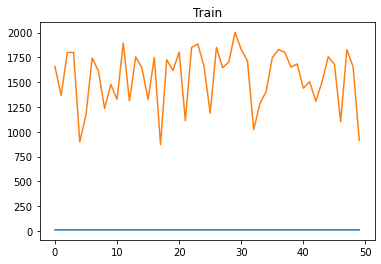

2/2 [==============================] - 3s 7ms/step


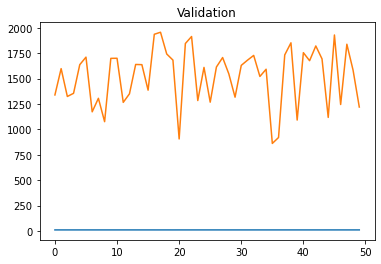

3/3 [==============================] - 0s 6ms/step


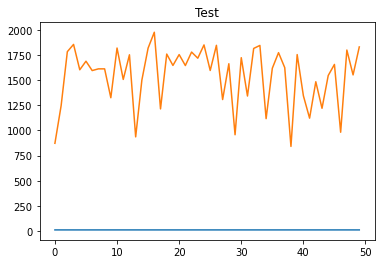

3/3 [==============================] - 0s 5ms/step


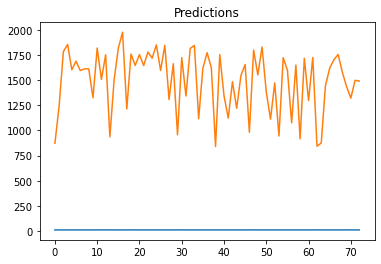

In [23]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('autoencoder_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)

plot_train("autoencoder_gru", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [24]:
auto_gru_mse

2302737.4225997827

### LSTM

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2416347.5000 - root_mean_squared_error: 1554.4606

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 55s 4s/step - loss: 2417487.5000 - root_mean_squared_error: 1554.8271 - val_loss: 2404295.2500 - val_root_mean_squared_error: 1550.5790
Epoch 2/50
6/8 [=====================>........] - ETA: 0s - loss: 2404878.2500 - root_mean_squared_error: 1550.7670

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2416874.0000 - root_mean_squared_error: 1554.6299 - val_loss: 2403782.2500 - val_root_mean_squared_error: 1550.4136
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 2440555.2500 - root_mean_squared_error: 1562.2277

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2416354.2500 - root_mean_squared_error: 1554.4626 - val_loss: 2403263.7500 - val_root_mean_squared_error: 1550.2463
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2415501.7500 - root_mean_squared_error: 1554.1885

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2415774.0000 - root_mean_squared_error: 1554.2760 - val_loss: 2402734.2500 - val_root_mean_squared_error: 1550.0756
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2432212.5000 - root_mean_squared_error: 1559.5552

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 2415337.2500 - root_mean_squared_error: 1554.1355 - val_loss: 2402193.7500 - val_root_mean_squared_error: 1549.9012
Epoch 6/50
7/8 [=========================>....] - ETA: 0s - loss: 2408468.5000 - root_mean_squared_error: 1551.9241

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2414788.0000 - root_mean_squared_error: 1553.9589 - val_loss: 2401637.5000 - val_root_mean_squared_error: 1549.7218
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2419116.0000 - root_mean_squared_error: 1555.3507

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2414159.2500 - root_mean_squared_error: 1553.7565 - val_loss: 2401053.0000 - val_root_mean_squared_error: 1549.5332
Epoch 8/50
6/8 [=====================>........] - ETA: 0s - loss: 2423542.2500 - root_mean_squared_error: 1556.7731

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2413633.5000 - root_mean_squared_error: 1553.5873 - val_loss: 2400444.7500 - val_root_mean_squared_error: 1549.3369
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 2365477.2500 - root_mean_squared_error: 1538.0109

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2413075.0000 - root_mean_squared_error: 1553.4076 - val_loss: 2399805.0000 - val_root_mean_squared_error: 1549.1304
Epoch 10/50
5/8 [=================>............] - ETA: 0s - loss: 2450443.5000 - root_mean_squared_error: 1565.3893

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2412257.0000 - root_mean_squared_error: 1553.1443 - val_loss: 2399132.5000 - val_root_mean_squared_error: 1548.9133
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2406928.5000 - root_mean_squared_error: 1551.4279

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2412018.5000 - root_mean_squared_error: 1553.0675 - val_loss: 2398437.7500 - val_root_mean_squared_error: 1548.6891
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2411241.0000 - root_mean_squared_error: 1552.8171

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2411241.0000 - root_mean_squared_error: 1552.8171 - val_loss: 2397698.5000 - val_root_mean_squared_error: 1548.4503
Epoch 13/50
8/8 [==============================] - ETA: 0s - loss: 2410416.5000 - root_mean_squared_error: 1552.5516

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2410416.5000 - root_mean_squared_error: 1552.5516 - val_loss: 2396899.2500 - val_root_mean_squared_error: 1548.1923
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2412736.7500 - root_mean_squared_error: 1553.2987

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2409554.2500 - root_mean_squared_error: 1552.2739 - val_loss: 2396034.2500 - val_root_mean_squared_error: 1547.9128
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2427647.5000 - root_mean_squared_error: 1558.0909

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2409123.2500 - root_mean_squared_error: 1552.1350 - val_loss: 2395127.2500 - val_root_mean_squared_error: 1547.6198
Epoch 16/50
5/8 [=================>............] - ETA: 0s - loss: 2484347.2500 - root_mean_squared_error: 1576.1813

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2408023.2500 - root_mean_squared_error: 1551.7806 - val_loss: 2394160.7500 - val_root_mean_squared_error: 1547.3076
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2411079.5000 - root_mean_squared_error: 1552.7651

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2406884.7500 - root_mean_squared_error: 1551.4138 - val_loss: 2393119.5000 - val_root_mean_squared_error: 1546.9711
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2405930.7500 - root_mean_squared_error: 1551.1063

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 25s 4s/step - loss: 2405930.7500 - root_mean_squared_error: 1551.1063 - val_loss: 2392043.5000 - val_root_mean_squared_error: 1546.6233
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2405616.2500 - root_mean_squared_error: 1551.0049

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 26s 4s/step - loss: 2405117.7500 - root_mean_squared_error: 1550.8442 - val_loss: 2390902.0000 - val_root_mean_squared_error: 1546.2542
Epoch 20/50
7/8 [=========================>....] - ETA: 0s - loss: 2412357.2500 - root_mean_squared_error: 1553.1765

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2403710.5000 - root_mean_squared_error: 1550.3904 - val_loss: 2389698.2500 - val_root_mean_squared_error: 1545.8649
Epoch 21/50
8/8 [==============================] - ETA: 0s - loss: 2402496.0000 - root_mean_squared_error: 1549.9987

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2402496.0000 - root_mean_squared_error: 1549.9987 - val_loss: 2388443.0000 - val_root_mean_squared_error: 1545.4589
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2391596.5000 - root_mean_squared_error: 1546.4788

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2400966.0000 - root_mean_squared_error: 1549.5051 - val_loss: 2387149.7500 - val_root_mean_squared_error: 1545.0404
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 2348765.7500 - root_mean_squared_error: 1532.5684

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2399787.5000 - root_mean_squared_error: 1549.1248 - val_loss: 2385828.2500 - val_root_mean_squared_error: 1544.6127
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2382634.2500 - root_mean_squared_error: 1543.5784

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 4s/step - loss: 2398523.5000 - root_mean_squared_error: 1548.7167 - val_loss: 2384489.5000 - val_root_mean_squared_error: 1544.1792
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2397042.2500 - root_mean_squared_error: 1548.2384

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2397042.2500 - root_mean_squared_error: 1548.2384 - val_loss: 2383140.5000 - val_root_mean_squared_error: 1543.7423
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2396151.7500 - root_mean_squared_error: 1547.9508

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2396151.7500 - root_mean_squared_error: 1547.9508 - val_loss: 2381802.0000 - val_root_mean_squared_error: 1543.3088
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 2404516.7500 - root_mean_squared_error: 1550.6504

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2394460.0000 - root_mean_squared_error: 1547.4043 - val_loss: 2380470.5000 - val_root_mean_squared_error: 1542.8773
Epoch 28/50
8/8 [==============================] - ETA: 0s - loss: 2393211.5000 - root_mean_squared_error: 1547.0009

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 21s 3s/step - loss: 2393211.5000 - root_mean_squared_error: 1547.0009 - val_loss: 2379148.2500 - val_root_mean_squared_error: 1542.4487
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 2387371.2500 - root_mean_squared_error: 1545.1121

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2391721.0000 - root_mean_squared_error: 1546.5190 - val_loss: 2377825.0000 - val_root_mean_squared_error: 1542.0198
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2399486.5000 - root_mean_squared_error: 1549.0276

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2390568.0000 - root_mean_squared_error: 1546.1461 - val_loss: 2376514.7500 - val_root_mean_squared_error: 1541.5948
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2388996.0000 - root_mean_squared_error: 1545.6377

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2388996.0000 - root_mean_squared_error: 1545.6377 - val_loss: 2375218.2500 - val_root_mean_squared_error: 1541.1743
Epoch 32/50
7/8 [=========================>....] - ETA: 0s - loss: 2398004.7500 - root_mean_squared_error: 1548.5492

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2387854.2500 - root_mean_squared_error: 1545.2683 - val_loss: 2373928.7500 - val_root_mean_squared_error: 1540.7559
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2359952.7500 - root_mean_squared_error: 1536.2137

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2386600.0000 - root_mean_squared_error: 1544.8624 - val_loss: 2372659.0000 - val_root_mean_squared_error: 1540.3438
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2385440.2500 - root_mean_squared_error: 1544.4871

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2385440.2500 - root_mean_squared_error: 1544.4871 - val_loss: 2371401.7500 - val_root_mean_squared_error: 1539.9357
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2360395.5000 - root_mean_squared_error: 1536.3579

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2383341.2500 - root_mean_squared_error: 1543.8074 - val_loss: 2370154.2500 - val_root_mean_squared_error: 1539.5305
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2383194.5000 - root_mean_squared_error: 1543.7599

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 23s 3s/step - loss: 2382778.5000 - root_mean_squared_error: 1543.6251 - val_loss: 2368913.7500 - val_root_mean_squared_error: 1539.1276
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2363131.7500 - root_mean_squared_error: 1537.2482

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2381624.0000 - root_mean_squared_error: 1543.2511 - val_loss: 2367706.5000 - val_root_mean_squared_error: 1538.7354
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 2319251.2500 - root_mean_squared_error: 1522.9088

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2380005.7500 - root_mean_squared_error: 1542.7267 - val_loss: 2366512.7500 - val_root_mean_squared_error: 1538.3475
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2379341.7500 - root_mean_squared_error: 1542.5115

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2379341.7500 - root_mean_squared_error: 1542.5115 - val_loss: 2365340.2500 - val_root_mean_squared_error: 1537.9663
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2378115.2500 - root_mean_squared_error: 1542.1139

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2378115.2500 - root_mean_squared_error: 1542.1139 - val_loss: 2364202.0000 - val_root_mean_squared_error: 1537.5962
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2373677.7500 - root_mean_squared_error: 1540.6744

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2377077.5000 - root_mean_squared_error: 1541.7773 - val_loss: 2363091.2500 - val_root_mean_squared_error: 1537.2350
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2386804.2500 - root_mean_squared_error: 1544.9286

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2376085.0000 - root_mean_squared_error: 1541.4554 - val_loss: 2362003.2500 - val_root_mean_squared_error: 1536.8810
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 2408570.7500 - root_mean_squared_error: 1551.9570

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2375430.0000 - root_mean_squared_error: 1541.2430 - val_loss: 2360940.7500 - val_root_mean_squared_error: 1536.5353
Epoch 44/50
8/8 [==============================] - ETA: 0s - loss: 2373595.2500 - root_mean_squared_error: 1540.6477

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2373595.2500 - root_mean_squared_error: 1540.6477 - val_loss: 2359896.0000 - val_root_mean_squared_error: 1536.1953
Epoch 45/50
8/8 [==============================] - ETA: 0s - loss: 2372462.2500 - root_mean_squared_error: 1540.2799

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2372462.2500 - root_mean_squared_error: 1540.2799 - val_loss: 2358867.0000 - val_root_mean_squared_error: 1535.8604
Epoch 46/50
8/8 [==============================] - ETA: 0s - loss: 2371592.0000 - root_mean_squared_error: 1539.9974

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2371592.0000 - root_mean_squared_error: 1539.9974 - val_loss: 2357853.2500 - val_root_mean_squared_error: 1535.5303
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 2358845.5000 - root_mean_squared_error: 1535.8534

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 31s 4s/step - loss: 2370491.2500 - root_mean_squared_error: 1539.6400 - val_loss: 2356855.7500 - val_root_mean_squared_error: 1535.2054
Epoch 48/50
7/8 [=========================>....] - ETA: 0s - loss: 2368693.7500 - root_mean_squared_error: 1539.0562

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2370299.5000 - root_mean_squared_error: 1539.5778 - val_loss: 2355879.0000 - val_root_mean_squared_error: 1534.8873
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2368622.2500 - root_mean_squared_error: 1539.0328

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2368622.2500 - root_mean_squared_error: 1539.0328 - val_loss: 2354920.0000 - val_root_mean_squared_error: 1534.5748
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2383239.7500 - root_mean_squared_error: 1543.7745

INFO:tensorflow:Assets written to: auto_lstm/assets


INFO:tensorflow:Assets written to: auto_lstm/assets


8/8 [==============================] - 4s 10ms/step


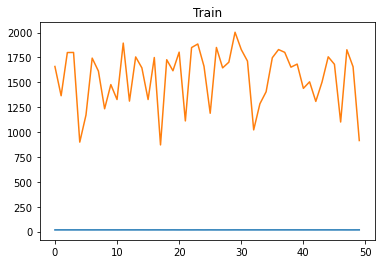

2/2 [==============================] - 2s 11ms/step


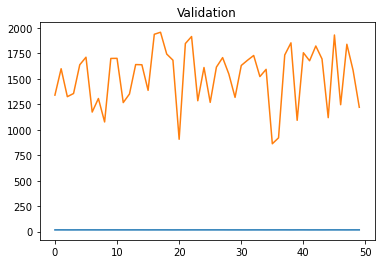

3/3 [==============================] - 0s 35ms/step


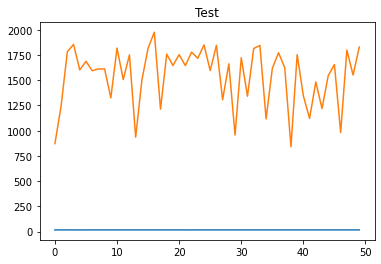

3/3 [==============================] - 0s 18ms/step


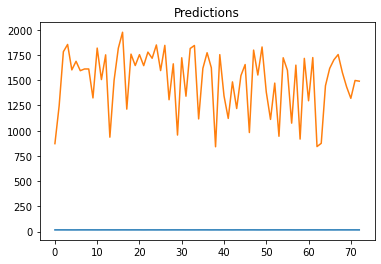

In [25]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
model.add(Dense(8, 'relu'))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_lstm", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [26]:
auto_lstm_mse

2285138.2030817424

### RNN

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2415506.7500 - root_mean_squared_error: 1554.1901  INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 21s 1s/step - loss: 2421139.0000 - root_mean_squared_error: 1556.0010 - val_loss: 2407375.0000 - val_root_mean_squared_error: 1551.5718
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 2407005.5000 - root_mean_squared_error: 1551.4528INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2420419.2500 - root_mean_squared_error: 1555.7697 - val_loss: 2406344.2500 - val_root_mean_squared_error: 1551.2396
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2419085.5000 - root_mean_squared_error: 1555.3409INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2419085.5000 - root_mean_squared_error: 1555.3409 - val_loss: 2405315.7500 - val_root_mean_squared_error: 1550.9081
Epoch 4/50
6/8 [=====================>........] - ETA: 0s - loss: 2463260.2500 - root_mean_squared_error: 1569.4777INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2418050.5000 - root_mean_squared_error: 1555.0082 - val_loss: 2404283.5000 - val_root_mean_squared_error: 1550.5752
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2401747.5000 - root_mean_squared_error: 1549.7572INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 967ms/step - loss: 2417240.7500 - root_mean_squared_error: 1554.7478 - val_loss: 2403247.5000 - val_root_mean_squared_error: 1550.2411
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2416042.7500 - root_mean_squared_error: 1554.3625INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2416042.7500 - root_mean_squared_error: 1554.3625 - val_loss: 2402208.0000 - val_root_mean_squared_error: 1549.9058
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2422814.0000 - root_mean_squared_error: 1556.5391INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2414907.2500 - root_mean_squared_error: 1553.9972 - val_loss: 2401167.2500 - val_root_mean_squared_error: 1549.5701
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2419891.7500 - root_mean_squared_error: 1555.6001INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2413798.2500 - root_mean_squared_error: 1553.6404 - val_loss: 2400128.0000 - val_root_mean_squared_error: 1549.2346
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2412842.5000 - root_mean_squared_error: 1553.3328INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2412842.5000 - root_mean_squared_error: 1553.3328 - val_loss: 2399088.2500 - val_root_mean_squared_error: 1548.8990
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 2365263.0000 - root_mean_squared_error: 1537.9412INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2412127.2500 - root_mean_squared_error: 1553.1024 - val_loss: 2398045.2500 - val_root_mean_squared_error: 1548.5624
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2401666.5000 - root_mean_squared_error: 1549.7311INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 23s 3s/step - loss: 2410563.5000 - root_mean_squared_error: 1552.5990 - val_loss: 2396992.7500 - val_root_mean_squared_error: 1548.2224
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 2415643.5000 - root_mean_squared_error: 1554.2340INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2409717.5000 - root_mean_squared_error: 1552.3265 - val_loss: 2395944.5000 - val_root_mean_squared_error: 1547.8839
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2396246.7500 - root_mean_squared_error: 1547.9816INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2408524.5000 - root_mean_squared_error: 1551.9421 - val_loss: 2394897.7500 - val_root_mean_squared_error: 1547.5458
Epoch 14/50
5/8 [=================>............] - ETA: 0s - loss: 2449622.7500 - root_mean_squared_error: 1565.1271INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2407444.5000 - root_mean_squared_error: 1551.5942 - val_loss: 2393846.0000 - val_root_mean_squared_error: 1547.2058
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2415321.5000 - root_mean_squared_error: 1554.1305INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2406633.7500 - root_mean_squared_error: 1551.3329 - val_loss: 2392800.0000 - val_root_mean_squared_error: 1546.8678
Epoch 16/50
7/8 [=========================>....] - ETA: 0s - loss: 2406406.2500 - root_mean_squared_error: 1551.2595INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 5s 775ms/step - loss: 2405504.2500 - root_mean_squared_error: 1550.9688 - val_loss: 2391763.2500 - val_root_mean_squared_error: 1546.5327
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2404469.7500 - root_mean_squared_error: 1550.6353INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2404469.7500 - root_mean_squared_error: 1550.6353 - val_loss: 2390743.0000 - val_root_mean_squared_error: 1546.2028
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2396507.7500 - root_mean_squared_error: 1548.0658INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2403308.0000 - root_mean_squared_error: 1550.2606 - val_loss: 2389731.0000 - val_root_mean_squared_error: 1545.8755
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2402474.0000 - root_mean_squared_error: 1549.9916INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2402474.0000 - root_mean_squared_error: 1549.9916 - val_loss: 2388741.7500 - val_root_mean_squared_error: 1545.5555
Epoch 20/50
5/8 [=================>............] - ETA: 0s - loss: 2369942.2500 - root_mean_squared_error: 1539.4617INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 788ms/step - loss: 2401433.7500 - root_mean_squared_error: 1549.6560 - val_loss: 2387780.5000 - val_root_mean_squared_error: 1545.2445
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2403082.0000 - root_mean_squared_error: 1550.1877INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2400401.0000 - root_mean_squared_error: 1549.3228 - val_loss: 2386839.2500 - val_root_mean_squared_error: 1544.9399
Epoch 22/50
7/8 [=========================>....] - ETA: 0s - loss: 2408512.7500 - root_mean_squared_error: 1551.9384INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2399310.7500 - root_mean_squared_error: 1548.9708 - val_loss: 2385925.5000 - val_root_mean_squared_error: 1544.6442
Epoch 23/50
6/8 [=====================>........] - ETA: 0s - loss: 2391979.5000 - root_mean_squared_error: 1546.6025INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 22s 3s/step - loss: 2398605.7500 - root_mean_squared_error: 1548.7433 - val_loss: 2385045.5000 - val_root_mean_squared_error: 1544.3593
Epoch 24/50
7/8 [=========================>....] - ETA: 0s - loss: 2400735.5000 - root_mean_squared_error: 1549.4307INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2397796.2500 - root_mean_squared_error: 1548.4819 - val_loss: 2384205.7500 - val_root_mean_squared_error: 1544.0873
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2397172.0000 - root_mean_squared_error: 1548.2804INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2397172.0000 - root_mean_squared_error: 1548.2804 - val_loss: 2383401.5000 - val_root_mean_squared_error: 1543.8269
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 2417621.7500 - root_mean_squared_error: 1554.8704INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2395979.0000 - root_mean_squared_error: 1547.8950 - val_loss: 2382631.2500 - val_root_mean_squared_error: 1543.5774
Epoch 27/50
6/8 [=====================>........] - ETA: 0s - loss: 2397223.2500 - root_mean_squared_error: 1548.2969INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2395494.7500 - root_mean_squared_error: 1547.7386 - val_loss: 2381899.5000 - val_root_mean_squared_error: 1543.3403
Epoch 28/50
5/8 [=================>............] - ETA: 0s - loss: 2437733.0000 - root_mean_squared_error: 1561.3241INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2394498.5000 - root_mean_squared_error: 1547.4167 - val_loss: 2381208.5000 - val_root_mean_squared_error: 1543.1165
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 2359495.2500 - root_mean_squared_error: 1536.0648INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 1s/step - loss: 2394132.7500 - root_mean_squared_error: 1547.2986 - val_loss: 2380553.5000 - val_root_mean_squared_error: 1542.9043
Epoch 30/50
5/8 [=================>............] - ETA: 0s - loss: 2458573.2500 - root_mean_squared_error: 1567.9838INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2393600.5000 - root_mean_squared_error: 1547.1266 - val_loss: 2379936.5000 - val_root_mean_squared_error: 1542.7043
Epoch 31/50
6/8 [=====================>........] - ETA: 0s - loss: 2396368.0000 - root_mean_squared_error: 1548.0206INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 17s 2s/step - loss: 2392601.0000 - root_mean_squared_error: 1546.8035 - val_loss: 2379353.7500 - val_root_mean_squared_error: 1542.5154
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2391994.2500 - root_mean_squared_error: 1546.6073INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2391994.2500 - root_mean_squared_error: 1546.6073 - val_loss: 2378803.2500 - val_root_mean_squared_error: 1542.3369
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2392049.0000 - root_mean_squared_error: 1546.6250INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 6s 827ms/step - loss: 2392049.0000 - root_mean_squared_error: 1546.6250 - val_loss: 2378279.5000 - val_root_mean_squared_error: 1542.1671
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 2394885.2500 - root_mean_squared_error: 1547.5416INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2391177.2500 - root_mean_squared_error: 1546.3431 - val_loss: 2377775.2500 - val_root_mean_squared_error: 1542.0037
Epoch 35/50
5/8 [=================>............] - ETA: 0s - loss: 2383092.2500 - root_mean_squared_error: 1543.7267INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 2390555.7500 - root_mean_squared_error: 1546.1422 - val_loss: 2377291.7500 - val_root_mean_squared_error: 1541.8469
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2390512.2500 - root_mean_squared_error: 1546.1282INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 957ms/step - loss: 2390512.2500 - root_mean_squared_error: 1546.1282 - val_loss: 2376834.2500 - val_root_mean_squared_error: 1541.6985
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2393420.2500 - root_mean_squared_error: 1547.0682INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 991ms/step - loss: 2389649.7500 - root_mean_squared_error: 1545.8492 - val_loss: 2376395.5000 - val_root_mean_squared_error: 1541.5562
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 2390265.7500 - root_mean_squared_error: 1546.0485INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2389043.5000 - root_mean_squared_error: 1545.6531 - val_loss: 2375974.0000 - val_root_mean_squared_error: 1541.4194
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2390264.2500 - root_mean_squared_error: 1546.0480INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2389349.2500 - root_mean_squared_error: 1545.7520 - val_loss: 2375573.2500 - val_root_mean_squared_error: 1541.2894
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2388240.5000 - root_mean_squared_error: 1545.3933INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2388240.5000 - root_mean_squared_error: 1545.3933 - val_loss: 2375184.0000 - val_root_mean_squared_error: 1541.1632
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2378927.5000 - root_mean_squared_error: 1542.3772INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 933ms/step - loss: 2388108.5000 - root_mean_squared_error: 1545.3506 - val_loss: 2374807.5000 - val_root_mean_squared_error: 1541.0410
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 2372720.7500 - root_mean_squared_error: 1540.3639INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2387429.2500 - root_mean_squared_error: 1545.1309 - val_loss: 2374440.5000 - val_root_mean_squared_error: 1540.9220
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2387435.2500 - root_mean_squared_error: 1545.1328INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2387435.2500 - root_mean_squared_error: 1545.1328 - val_loss: 2374086.2500 - val_root_mean_squared_error: 1540.8071
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 2419229.2500 - root_mean_squared_error: 1555.3872INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2387301.7500 - root_mean_squared_error: 1545.0896 - val_loss: 2373747.2500 - val_root_mean_squared_error: 1540.6970
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2399418.2500 - root_mean_squared_error: 1549.0056INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 7s 934ms/step - loss: 2386555.5000 - root_mean_squared_error: 1544.8480 - val_loss: 2373416.2500 - val_root_mean_squared_error: 1540.5896
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2387866.2500 - root_mean_squared_error: 1545.2722INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2386259.5000 - root_mean_squared_error: 1544.7522 - val_loss: 2373096.2500 - val_root_mean_squared_error: 1540.4857
Epoch 47/50
8/8 [==============================] - ETA: 0s - loss: 2386105.2500 - root_mean_squared_error: 1544.7023INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 18s 3s/step - loss: 2386105.2500 - root_mean_squared_error: 1544.7023 - val_loss: 2372783.0000 - val_root_mean_squared_error: 1540.3840
Epoch 48/50
4/8 [==============>...............] - ETA: 0s - loss: 2386848.5000 - root_mean_squared_error: 1544.9429INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2385550.5000 - root_mean_squared_error: 1544.5227 - val_loss: 2372476.7500 - val_root_mean_squared_error: 1540.2847
Epoch 49/50
7/8 [=========================>....] - ETA: 0s - loss: 2369972.5000 - root_mean_squared_error: 1539.4716INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2385593.7500 - root_mean_squared_error: 1544.5367 - val_loss: 2372177.5000 - val_root_mean_squared_error: 1540.1875
Epoch 50/50
7/8 [=========================>....] - ETA: 0s - loss: 2390719.0000 - root_mean_squared_error: 1546.1949INFO:tensorflow:Assets written to: auto_rnn/assets


INFO:tensorflow:Assets written to: auto_rnn/assets


8/8 [==============================] - 3s 9ms/step


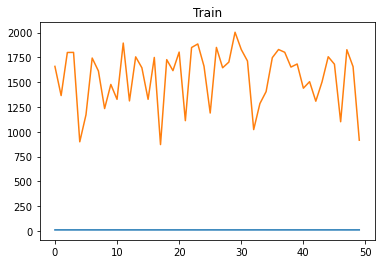

2/2 [==============================] - 1s 10ms/step


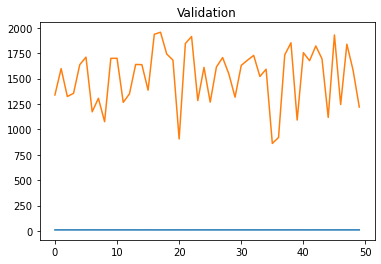

3/3 [==============================] - 0s 7ms/step


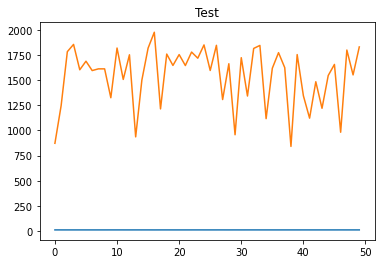

3/3 [==============================] - 0s 6ms/step


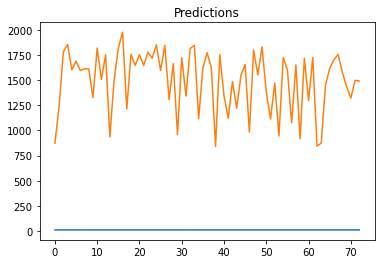

In [27]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train, y_train, x_val, y_val)


plot_train("auto_rnn", 50, x_train, y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [28]:
auto_rnn_mse

2302675.258381318

# Moving Average with Encoder

### CNN

Epoch 1/50
5/8 [=================>............] - ETA: 0s - loss: 2443123.7500 - root_mean_squared_error: 1563.0496 

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 13s 1s/step - loss: 2398564.0000 - root_mean_squared_error: 1548.7299 - val_loss: 2385757.2500 - val_root_mean_squared_error: 1544.5897
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 2375379.2500 - root_mean_squared_error: 1541.2266

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 899ms/step - loss: 2388604.7500 - root_mean_squared_error: 1545.5111 - val_loss: 2369860.2500 - val_root_mean_squared_error: 1539.4351
Epoch 3/50
5/8 [=================>............] - ETA: 0s - loss: 2377966.5000 - root_mean_squared_error: 1542.0657

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 720ms/step - loss: 2372378.7500 - root_mean_squared_error: 1540.2528 - val_loss: 2349525.0000 - val_root_mean_squared_error: 1532.8160
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2356520.2500 - root_mean_squared_error: 1535.0962

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 15s 2s/step - loss: 2356520.2500 - root_mean_squared_error: 1535.0962 - val_loss: 2327385.5000 - val_root_mean_squared_error: 1525.5771
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2327438.0000 - root_mean_squared_error: 1525.5944

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 634ms/step - loss: 2332372.0000 - root_mean_squared_error: 1527.2106 - val_loss: 2302727.7500 - val_root_mean_squared_error: 1517.4741
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2307843.7500 - root_mean_squared_error: 1519.1589

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 688ms/step - loss: 2307843.7500 - root_mean_squared_error: 1519.1589 - val_loss: 2274522.0000 - val_root_mean_squared_error: 1508.1519
Epoch 7/50
5/8 [=================>............] - ETA: 0s - loss: 2333076.5000 - root_mean_squared_error: 1527.4412

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 788ms/step - loss: 2283239.7500 - root_mean_squared_error: 1511.0393 - val_loss: 2244413.0000 - val_root_mean_squared_error: 1498.1365
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2251068.2500 - root_mean_squared_error: 1500.3561

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 877ms/step - loss: 2251068.2500 - root_mean_squared_error: 1500.3561 - val_loss: 2212640.2500 - val_root_mean_squared_error: 1487.4946
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2220207.2500 - root_mean_squared_error: 1490.0360

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2220207.2500 - root_mean_squared_error: 1490.0360 - val_loss: 2178818.2500 - val_root_mean_squared_error: 1476.0820
Epoch 10/50
7/8 [=========================>....] - ETA: 0s - loss: 2191468.2500 - root_mean_squared_error: 1480.3608

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2186692.7500 - root_mean_squared_error: 1478.7471 - val_loss: 2142723.0000 - val_root_mean_squared_error: 1463.8043
Epoch 11/50
5/8 [=================>............] - ETA: 0s - loss: 2124887.5000 - root_mean_squared_error: 1457.6993

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 653ms/step - loss: 2147816.5000 - root_mean_squared_error: 1465.5431 - val_loss: 2104045.5000 - val_root_mean_squared_error: 1450.5328
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 2132304.2500 - root_mean_squared_error: 1460.2412

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 593ms/step - loss: 2109470.0000 - root_mean_squared_error: 1452.4015 - val_loss: 2062559.6250 - val_root_mean_squared_error: 1436.1614
Epoch 13/50
5/8 [=================>............] - ETA: 0s - loss: 2083111.2500 - root_mean_squared_error: 1443.2987

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2067520.0000 - root_mean_squared_error: 1437.8873 - val_loss: 2018136.0000 - val_root_mean_squared_error: 1420.6111
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 2041316.6250 - root_mean_squared_error: 1428.7466

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 895ms/step - loss: 2028338.6250 - root_mean_squared_error: 1424.1975 - val_loss: 1971331.0000 - val_root_mean_squared_error: 1404.0409
Epoch 15/50
5/8 [=================>............] - ETA: 0s - loss: 2011862.3750 - root_mean_squared_error: 1418.4014

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 11s 2s/step - loss: 1977220.8750 - root_mean_squared_error: 1406.1368 - val_loss: 1921243.8750 - val_root_mean_squared_error: 1386.0895
Epoch 16/50
8/8 [==============================] - ETA: 0s - loss: 1927594.0000 - root_mean_squared_error: 1388.3782

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 622ms/step - loss: 1927594.0000 - root_mean_squared_error: 1388.3782 - val_loss: 1868197.0000 - val_root_mean_squared_error: 1366.8201
Epoch 17/50
6/8 [=====================>........] - ETA: 0s - loss: 1893646.1250 - root_mean_squared_error: 1376.0981

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 358ms/step - loss: 1875599.8750 - root_mean_squared_error: 1369.5254 - val_loss: 1812329.3750 - val_root_mean_squared_error: 1346.2278
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 1816933.6250 - root_mean_squared_error: 1347.9368

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1816933.6250 - root_mean_squared_error: 1347.9368 - val_loss: 1753510.1250 - val_root_mean_squared_error: 1324.2017
Epoch 19/50
5/8 [=================>............] - ETA: 0s - loss: 1790592.7500 - root_mean_squared_error: 1338.1304

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 969ms/step - loss: 1763330.0000 - root_mean_squared_error: 1327.9044 - val_loss: 1690659.1250 - val_root_mean_squared_error: 1300.2535
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 1727839.3750 - root_mean_squared_error: 1314.4730

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 1698193.8750 - root_mean_squared_error: 1303.1477 - val_loss: 1625384.0000 - val_root_mean_squared_error: 1274.9055
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 1627623.6250 - root_mean_squared_error: 1275.7836

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 892ms/step - loss: 1632591.5000 - root_mean_squared_error: 1277.7290 - val_loss: 1556897.8750 - val_root_mean_squared_error: 1247.7571
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 1585860.0000 - root_mean_squared_error: 1259.3093

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 494ms/step - loss: 1561112.0000 - root_mean_squared_error: 1249.4447 - val_loss: 1485945.7500 - val_root_mean_squared_error: 1218.9938
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 1490974.7500 - root_mean_squared_error: 1221.0548

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 857ms/step - loss: 1490974.7500 - root_mean_squared_error: 1221.0548 - val_loss: 1413656.8750 - val_root_mean_squared_error: 1188.9730
Epoch 24/50
5/8 [=================>............] - ETA: 0s - loss: 1427005.5000 - root_mean_squared_error: 1194.5734

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 734ms/step - loss: 1421597.1250 - root_mean_squared_error: 1192.3075 - val_loss: 1339084.7500 - val_root_mean_squared_error: 1157.1884
Epoch 25/50
4/8 [==============>...............] - ETA: 0s - loss: 1342069.0000 - root_mean_squared_error: 1158.4771

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 10s 1s/step - loss: 1345524.6250 - root_mean_squared_error: 1159.9675 - val_loss: 1263235.2500 - val_root_mean_squared_error: 1123.9374
Epoch 26/50
5/8 [=================>............] - ETA: 0s - loss: 1231284.5000 - root_mean_squared_error: 1109.6326

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 4s 498ms/step - loss: 1270611.2500 - root_mean_squared_error: 1127.2140 - val_loss: 1186378.1250 - val_root_mean_squared_error: 1089.2098
Epoch 27/50
5/8 [=================>............] - ETA: 0s - loss: 1210059.2500 - root_mean_squared_error: 1100.0270

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 779ms/step - loss: 1191419.0000 - root_mean_squared_error: 1091.5214 - val_loss: 1108138.2500 - val_root_mean_squared_error: 1052.6814
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 1160412.8750 - root_mean_squared_error: 1077.2246

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 871ms/step - loss: 1120968.5000 - root_mean_squared_error: 1058.7581 - val_loss: 1029766.1875 - val_root_mean_squared_error: 1014.7740
Epoch 29/50
6/8 [=====================>........] - ETA: 0s - loss: 1048824.3750 - root_mean_squared_error: 1024.1212

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 959ms/step - loss: 1039671.6250 - root_mean_squared_error: 1019.6429 - val_loss: 952201.6250 - val_root_mean_squared_error: 975.8082
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 954693.9375 - root_mean_squared_error: 977.0844

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 789ms/step - loss: 959925.4375 - root_mean_squared_error: 979.7579 - val_loss: 875531.3125 - val_root_mean_squared_error: 935.6983
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 872060.0000 - root_mean_squared_error: 933.8416

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 10s 1s/step - loss: 880049.2500 - root_mean_squared_error: 938.1094 - val_loss: 799808.5625 - val_root_mean_squared_error: 894.3202
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 821356.1875 - root_mean_squared_error: 906.2870

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 997ms/step - loss: 810420.1250 - root_mean_squared_error: 900.2334 - val_loss: 725616.2500 - val_root_mean_squared_error: 851.8311
Epoch 33/50
5/8 [=================>............] - ETA: 0s - loss: 765658.6250 - root_mean_squared_error: 875.0192

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 967ms/step - loss: 739362.5625 - root_mean_squared_error: 859.8619 - val_loss: 654622.1875 - val_root_mean_squared_error: 809.0873
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 676318.8125 - root_mean_squared_error: 822.3860

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 966ms/step - loss: 669742.6250 - root_mean_squared_error: 818.3781 - val_loss: 588044.9375 - val_root_mean_squared_error: 766.8409
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 592713.9375 - root_mean_squared_error: 769.8792

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 748ms/step - loss: 600805.8750 - root_mean_squared_error: 775.1167 - val_loss: 525548.1250 - val_root_mean_squared_error: 724.9470
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 540085.6875 - root_mean_squared_error: 734.9052

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 9s 1s/step - loss: 540085.6875 - root_mean_squared_error: 734.9052 - val_loss: 467393.8750 - val_root_mean_squared_error: 683.6621
Epoch 37/50
5/8 [=================>............] - ETA: 0s - loss: 470700.3125 - root_mean_squared_error: 686.0760

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 811ms/step - loss: 478109.9062 - root_mean_squared_error: 691.4549 - val_loss: 414073.3750 - val_root_mean_squared_error: 643.4854
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 430466.0312 - root_mean_squared_error: 656.0991

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 14s 2s/step - loss: 422935.9062 - root_mean_squared_error: 650.3352 - val_loss: 365050.4062 - val_root_mean_squared_error: 604.1940
Epoch 39/50
5/8 [=================>............] - ETA: 0s - loss: 376742.5000 - root_mean_squared_error: 613.7935

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 820ms/step - loss: 374963.4688 - root_mean_squared_error: 612.3426 - val_loss: 322032.0625 - val_root_mean_squared_error: 567.4787
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 341041.1562 - root_mean_squared_error: 583.9873

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 791ms/step - loss: 335934.4062 - root_mean_squared_error: 579.5985 - val_loss: 283765.1875 - val_root_mean_squared_error: 532.6962
Epoch 41/50
4/8 [==============>...............] - ETA: 0s - loss: 323008.5312 - root_mean_squared_error: 568.3384

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 10s 1s/step - loss: 296474.8750 - root_mean_squared_error: 544.4951 - val_loss: 250740.3750 - val_root_mean_squared_error: 500.7398
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 258916.1875 - root_mean_squared_error: 508.8381

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 765ms/step - loss: 257912.5938 - root_mean_squared_error: 507.8510 - val_loss: 221728.6406 - val_root_mean_squared_error: 470.8807
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 235373.7969 - root_mean_squared_error: 485.1534

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 6s 882ms/step - loss: 232975.3438 - root_mean_squared_error: 482.6752 - val_loss: 198034.5469 - val_root_mean_squared_error: 445.0107
Epoch 44/50
5/8 [=================>............] - ETA: 0s - loss: 213313.5000 - root_mean_squared_error: 461.8587

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 740ms/step - loss: 209423.0938 - root_mean_squared_error: 457.6277 - val_loss: 178341.2344 - val_root_mean_squared_error: 422.3047
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 190561.1406 - root_mean_squared_error: 436.5331

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 5s 759ms/step - loss: 190299.9375 - root_mean_squared_error: 436.2338 - val_loss: 162486.2969 - val_root_mean_squared_error: 403.0959
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 169369.8125 - root_mean_squared_error: 411.5456

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 167502.5156 - root_mean_squared_error: 409.2707 - val_loss: 150344.9688 - val_root_mean_squared_error: 387.7434
Epoch 47/50
5/8 [=================>............] - ETA: 0s - loss: 153048.8281 - root_mean_squared_error: 391.2146

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 8s 1s/step - loss: 152711.4688 - root_mean_squared_error: 390.7831 - val_loss: 141688.2188 - val_root_mean_squared_error: 376.4149
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 146165.5312 - root_mean_squared_error: 382.3160

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 7s 1s/step - loss: 146165.5312 - root_mean_squared_error: 382.3160 - val_loss: 134791.5625 - val_root_mean_squared_error: 367.1397
Epoch 49/50
4/8 [==============>...............] - ETA: 0s - loss: 134943.5938 - root_mean_squared_error: 367.3467

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 3s 452ms/step - loss: 137067.9844 - root_mean_squared_error: 370.2269 - val_loss: 130299.3125 - val_root_mean_squared_error: 360.9700
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 137337.2500 - root_mean_squared_error: 370.5904

INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


INFO:tensorflow:Assets written to: mavg_autoencoder_cnn/assets


8/8 [==============================] - 1s 14ms/step


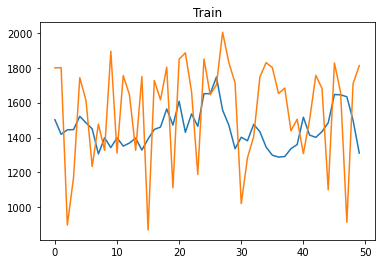

2/2 [==============================] - 1s 10ms/step


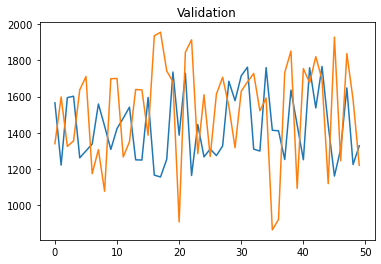

3/3 [==============================] - 0s 10ms/step


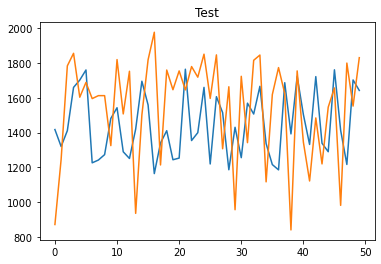

3/3 [==============================] - 1s 449ms/step


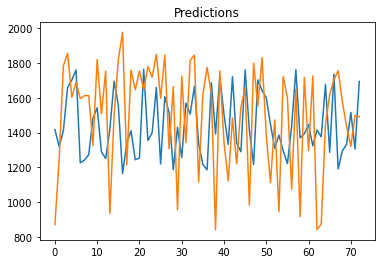

In [29]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(Conv1D(64, kernel_size=2))
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=1))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_autoencoder_cnn/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_autoencoder_cnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_cnn_mse = plot_predictions1(model,x_test, y_test)

In [30]:
mavg_auto_cnn_mse

116676.36813637124

### RNN

Epoch 1/50
6/8 [=====================>........] - ETA: 0s - loss: 2412961.0000 - root_mean_squared_error: 1553.3708  INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 22s 1s/step - loss: 2420415.2500 - root_mean_squared_error: 1555.7684 - val_loss: 2405986.7500 - val_root_mean_squared_error: 1551.1244
Epoch 2/50
5/8 [=================>............] - ETA: 0s - loss: 2449671.5000 - root_mean_squared_error: 1565.1427INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2419689.2500 - root_mean_squared_error: 1555.5350 - val_loss: 2405063.7500 - val_root_mean_squared_error: 1550.8268
Epoch 3/50
6/8 [=====================>........] - ETA: 0s - loss: 2417956.0000 - root_mean_squared_error: 1554.9778INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2418591.5000 - root_mean_squared_error: 1555.1821 - val_loss: 2404144.5000 - val_root_mean_squared_error: 1550.5304
Epoch 4/50
7/8 [=========================>....] - ETA: 0s - loss: 2406729.5000 - root_mean_squared_error: 1551.3638INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2417655.5000 - root_mean_squared_error: 1554.8812 - val_loss: 2403227.2500 - val_root_mean_squared_error: 1550.2346
Epoch 5/50
8/8 [==============================] - ETA: 0s - loss: 2416771.0000 - root_mean_squared_error: 1554.5967INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2416771.0000 - root_mean_squared_error: 1554.5967 - val_loss: 2402315.0000 - val_root_mean_squared_error: 1549.9403
Epoch 6/50
6/8 [=====================>........] - ETA: 0s - loss: 2402607.7500 - root_mean_squared_error: 1550.0348INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2415729.2500 - root_mean_squared_error: 1554.2616 - val_loss: 2401416.5000 - val_root_mean_squared_error: 1549.6504
Epoch 7/50
6/8 [=====================>........] - ETA: 0s - loss: 2396384.7500 - root_mean_squared_error: 1548.0261INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2414981.5000 - root_mean_squared_error: 1554.0211 - val_loss: 2400507.0000 - val_root_mean_squared_error: 1549.3569
Epoch 8/50
7/8 [=========================>....] - ETA: 0s - loss: 2422541.2500 - root_mean_squared_error: 1556.4515INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2414232.5000 - root_mean_squared_error: 1553.7800 - val_loss: 2399591.7500 - val_root_mean_squared_error: 1549.0615
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2413008.0000 - root_mean_squared_error: 1553.3860INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2413008.0000 - root_mean_squared_error: 1553.3860 - val_loss: 2398662.5000 - val_root_mean_squared_error: 1548.7615
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2412235.7500 - root_mean_squared_error: 1553.1373INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2412235.7500 - root_mean_squared_error: 1553.1373 - val_loss: 2397722.7500 - val_root_mean_squared_error: 1548.4583
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2413739.5000 - root_mean_squared_error: 1553.6215INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2411315.5000 - root_mean_squared_error: 1552.8411 - val_loss: 2396786.5000 - val_root_mean_squared_error: 1548.1559
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 2406357.7500 - root_mean_squared_error: 1551.2439INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2410412.0000 - root_mean_squared_error: 1552.5502 - val_loss: 2395842.5000 - val_root_mean_squared_error: 1547.8510
Epoch 13/50
7/8 [=========================>....] - ETA: 0s - loss: 2405385.7500 - root_mean_squared_error: 1550.9307INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2409393.5000 - root_mean_squared_error: 1552.2222 - val_loss: 2394892.2500 - val_root_mean_squared_error: 1547.5439
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 2461538.7500 - root_mean_squared_error: 1568.9292INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2408824.5000 - root_mean_squared_error: 1552.0388 - val_loss: 2393951.2500 - val_root_mean_squared_error: 1547.2399
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 2424145.2500 - root_mean_squared_error: 1556.9667INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2407665.5000 - root_mean_squared_error: 1551.6654 - val_loss: 2393011.2500 - val_root_mean_squared_error: 1546.9360
Epoch 16/50
4/8 [==============>...............] - ETA: 0s - loss: 2358911.7500 - root_mean_squared_error: 1535.8749INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 7s 939ms/step - loss: 2406814.0000 - root_mean_squared_error: 1551.3910 - val_loss: 2392084.2500 - val_root_mean_squared_error: 1546.6365
Epoch 17/50
8/8 [==============================] - ETA: 0s - loss: 2405839.0000 - root_mean_squared_error: 1551.0768INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 5s 701ms/step - loss: 2405839.0000 - root_mean_squared_error: 1551.0768 - val_loss: 2391160.7500 - val_root_mean_squared_error: 1546.3379
Epoch 18/50
7/8 [=========================>....] - ETA: 0s - loss: 2398468.5000 - root_mean_squared_error: 1548.6990INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 5s 780ms/step - loss: 2404731.5000 - root_mean_squared_error: 1550.7197 - val_loss: 2390266.0000 - val_root_mean_squared_error: 1546.0485
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2405776.7500 - root_mean_squared_error: 1551.0566INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2403977.0000 - root_mean_squared_error: 1550.4763 - val_loss: 2389404.2500 - val_root_mean_squared_error: 1545.7698
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2402962.7500 - root_mean_squared_error: 1550.1493INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 4s 625ms/step - loss: 2402962.7500 - root_mean_squared_error: 1550.1493 - val_loss: 2388580.2500 - val_root_mean_squared_error: 1545.5033
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 2396683.2500 - root_mean_squared_error: 1548.1224INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 6s 883ms/step - loss: 2402456.0000 - root_mean_squared_error: 1549.9858 - val_loss: 2387802.0000 - val_root_mean_squared_error: 1545.2515
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 2380290.0000 - root_mean_squared_error: 1542.8188INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2401600.0000 - root_mean_squared_error: 1549.7096 - val_loss: 2387081.5000 - val_root_mean_squared_error: 1545.0183
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2400920.2500 - root_mean_squared_error: 1549.4904INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2400920.2500 - root_mean_squared_error: 1549.4904 - val_loss: 2386407.7500 - val_root_mean_squared_error: 1544.8002
Epoch 24/50
5/8 [=================>............] - ETA: 0s - loss: 2498986.5000 - root_mean_squared_error: 1580.8184INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2399808.0000 - root_mean_squared_error: 1549.1313 - val_loss: 2385769.7500 - val_root_mean_squared_error: 1544.5938
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2399480.7500 - root_mean_squared_error: 1549.0258INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2399480.7500 - root_mean_squared_error: 1549.0258 - val_loss: 2385170.2500 - val_root_mean_squared_error: 1544.3997
Epoch 26/50
6/8 [=====================>........] - ETA: 0s - loss: 2410685.0000 - root_mean_squared_error: 1552.6381INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2398790.5000 - root_mean_squared_error: 1548.8030 - val_loss: 2384598.5000 - val_root_mean_squared_error: 1544.2145
Epoch 27/50
4/8 [==============>...............] - ETA: 0s - loss: 2330970.0000 - root_mean_squared_error: 1526.7515INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 2398234.7500 - root_mean_squared_error: 1548.6235 - val_loss: 2384061.7500 - val_root_mean_squared_error: 1544.0408
Epoch 28/50
7/8 [=========================>....] - ETA: 0s - loss: 2402634.7500 - root_mean_squared_error: 1550.0435INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2397996.2500 - root_mean_squared_error: 1548.5465 - val_loss: 2383551.0000 - val_root_mean_squared_error: 1543.8754
Epoch 29/50
4/8 [==============>...............] - ETA: 0s - loss: 2387899.0000 - root_mean_squared_error: 1545.2828INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 13s 2s/step - loss: 2397202.0000 - root_mean_squared_error: 1548.2900 - val_loss: 2383066.5000 - val_root_mean_squared_error: 1543.7184
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2396919.7500 - root_mean_squared_error: 1548.1989INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2396947.0000 - root_mean_squared_error: 1548.2076 - val_loss: 2382604.7500 - val_root_mean_squared_error: 1543.5688
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2396352.5000 - root_mean_squared_error: 1548.0156INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 2396352.5000 - root_mean_squared_error: 1548.0156 - val_loss: 2382161.0000 - val_root_mean_squared_error: 1543.4250
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2395902.0000 - root_mean_squared_error: 1547.8701INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2395902.0000 - root_mean_squared_error: 1547.8701 - val_loss: 2381736.7500 - val_root_mean_squared_error: 1543.2876
Epoch 33/50
8/8 [==============================] - ETA: 0s - loss: 2395581.2500 - root_mean_squared_error: 1547.7665INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2395581.2500 - root_mean_squared_error: 1547.7665 - val_loss: 2381326.2500 - val_root_mean_squared_error: 1543.1547
Epoch 34/50
7/8 [=========================>....] - ETA: 0s - loss: 2404258.0000 - root_mean_squared_error: 1550.5670INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2395545.7500 - root_mean_squared_error: 1547.7551 - val_loss: 2380934.0000 - val_root_mean_squared_error: 1543.0276
Epoch 35/50
5/8 [=================>............] - ETA: 0s - loss: 2380930.7500 - root_mean_squared_error: 1543.0265INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2394978.7500 - root_mean_squared_error: 1547.5719 - val_loss: 2380560.2500 - val_root_mean_squared_error: 1542.9064
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2394317.5000 - root_mean_squared_error: 1547.3583INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2394317.5000 - root_mean_squared_error: 1547.3583 - val_loss: 2380198.5000 - val_root_mean_squared_error: 1542.7892
Epoch 37/50
6/8 [=====================>........] - ETA: 0s - loss: 2396273.5000 - root_mean_squared_error: 1547.9901INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2393864.7500 - root_mean_squared_error: 1547.2119 - val_loss: 2379846.5000 - val_root_mean_squared_error: 1542.6752
Epoch 38/50
6/8 [=====================>........] - ETA: 0s - loss: 2373771.0000 - root_mean_squared_error: 1540.7047INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2393045.5000 - root_mean_squared_error: 1546.9471 - val_loss: 2379503.5000 - val_root_mean_squared_error: 1542.5640
Epoch 39/50
7/8 [=========================>....] - ETA: 0s - loss: 2394009.2500 - root_mean_squared_error: 1547.2587INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 16s 2s/step - loss: 2393660.7500 - root_mean_squared_error: 1547.1460 - val_loss: 2379167.5000 - val_root_mean_squared_error: 1542.4551
Epoch 40/50
6/8 [=====================>........] - ETA: 0s - loss: 2419423.5000 - root_mean_squared_error: 1555.4496INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2392636.0000 - root_mean_squared_error: 1546.8148 - val_loss: 2378843.2500 - val_root_mean_squared_error: 1542.3499
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2384914.7500 - root_mean_squared_error: 1544.3169INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2392901.0000 - root_mean_squared_error: 1546.9004 - val_loss: 2378534.0000 - val_root_mean_squared_error: 1542.2496
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 2408947.7500 - root_mean_squared_error: 1552.0785INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 12s 2s/step - loss: 2392249.0000 - root_mean_squared_error: 1546.6897 - val_loss: 2378227.0000 - val_root_mean_squared_error: 1542.1501
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2392168.7500 - root_mean_squared_error: 1546.6637INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2392168.7500 - root_mean_squared_error: 1546.6637 - val_loss: 2377931.0000 - val_root_mean_squared_error: 1542.0542
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2400757.5000 - root_mean_squared_error: 1549.4377INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 10s 1s/step - loss: 2391787.2500 - root_mean_squared_error: 1546.5404 - val_loss: 2377640.7500 - val_root_mean_squared_error: 1541.9601
Epoch 45/50
6/8 [=====================>........] - ETA: 0s - loss: 2395161.0000 - root_mean_squared_error: 1547.6307INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 8s 1s/step - loss: 2391516.7500 - root_mean_squared_error: 1546.4530 - val_loss: 2377358.0000 - val_root_mean_squared_error: 1541.8684
Epoch 46/50
5/8 [=================>............] - ETA: 0s - loss: 2433413.2500 - root_mean_squared_error: 1559.9402INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 15s 2s/step - loss: 2391219.7500 - root_mean_squared_error: 1546.3569 - val_loss: 2377080.5000 - val_root_mean_squared_error: 1541.7783
Epoch 47/50
5/8 [=================>............] - ETA: 0s - loss: 2407757.0000 - root_mean_squared_error: 1551.6948INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 11s 2s/step - loss: 2390542.5000 - root_mean_squared_error: 1546.1379 - val_loss: 2376806.5000 - val_root_mean_squared_error: 1541.6895
Epoch 48/50
6/8 [=====================>........] - ETA: 0s - loss: 2369023.7500 - root_mean_squared_error: 1539.1633INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 14s 2s/step - loss: 2391026.0000 - root_mean_squared_error: 1546.2943 - val_loss: 2376538.7500 - val_root_mean_squared_error: 1541.6027
Epoch 49/50
5/8 [=================>............] - ETA: 0s - loss: 2373661.5000 - root_mean_squared_error: 1540.6692INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 9s 1s/step - loss: 2390253.0000 - root_mean_squared_error: 1546.0443 - val_loss: 2376273.7500 - val_root_mean_squared_error: 1541.5167
Epoch 50/50
4/8 [==============>...............] - ETA: 0s - loss: 2466994.5000 - root_mean_squared_error: 1570.6669INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


INFO:tensorflow:Assets written to: mavg_auto_rnn/assets


8/8 [==============================] - 1s 6ms/step


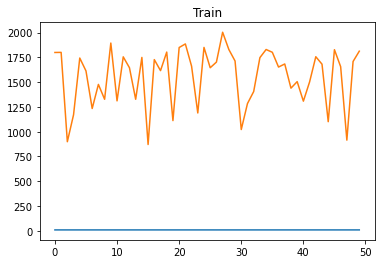

2/2 [==============================] - 1s 8ms/step


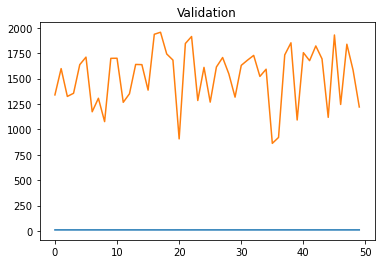

3/3 [==============================] - 0s 11ms/step


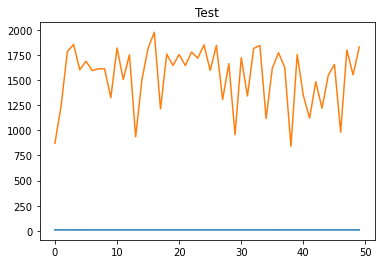

3/3 [==============================] - 0s 5ms/step


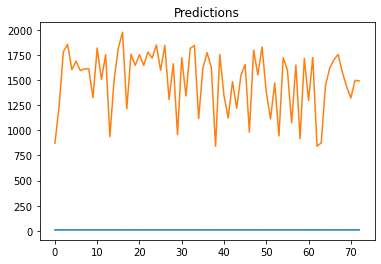

In [31]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(SimpleRNN(64))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_rnn/', save_best_only=True)
model = fit_model(model, cp, epochs,moving_avg_data,target, x_val, y_val)


plot_train("mavg_auto_rnn", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_rnn_mse = plot_predictions1(model,x_test, y_test)

In [32]:
mavg_auto_rnn_mse

2306732.063892577

### GRU

Epoch 1/50
7/8 [=========================>....] - ETA: 0s - loss: 2402489.2500 - root_mean_squared_error: 1549.9966

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 51s 5s/step - loss: 2419393.0000 - root_mean_squared_error: 1555.4398 - val_loss: 2405051.7500 - val_root_mean_squared_error: 1550.8229
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2418872.0000 - root_mean_squared_error: 1555.2723

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2418872.0000 - root_mean_squared_error: 1555.2723 - val_loss: 2404447.2500 - val_root_mean_squared_error: 1550.6281
Epoch 3/50
7/8 [=========================>....] - ETA: 0s - loss: 2415372.0000 - root_mean_squared_error: 1554.1467

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 2418259.7500 - root_mean_squared_error: 1555.0754 - val_loss: 2403843.5000 - val_root_mean_squared_error: 1550.4333
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2417584.2500 - root_mean_squared_error: 1554.8583

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2417584.2500 - root_mean_squared_error: 1554.8583 - val_loss: 2403224.2500 - val_root_mean_squared_error: 1550.2336
Epoch 5/50
6/8 [=====================>........] - ETA: 0s - loss: 2425822.0000 - root_mean_squared_error: 1557.5050

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2417017.0000 - root_mean_squared_error: 1554.6759 - val_loss: 2402591.7500 - val_root_mean_squared_error: 1550.0295
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2416351.2500 - root_mean_squared_error: 1554.4617

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 38s 5s/step - loss: 2416351.2500 - root_mean_squared_error: 1554.4617 - val_loss: 2401944.7500 - val_root_mean_squared_error: 1549.8209
Epoch 7/50
7/8 [=========================>....] - ETA: 0s - loss: 2422501.5000 - root_mean_squared_error: 1556.4387

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2415696.5000 - root_mean_squared_error: 1554.2511 - val_loss: 2401280.5000 - val_root_mean_squared_error: 1549.6066
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2415028.5000 - root_mean_squared_error: 1554.0363

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2415028.5000 - root_mean_squared_error: 1554.0363 - val_loss: 2400597.5000 - val_root_mean_squared_error: 1549.3861
Epoch 9/50
7/8 [=========================>....] - ETA: 0s - loss: 2408458.2500 - root_mean_squared_error: 1551.9208

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2414298.5000 - root_mean_squared_error: 1553.8013 - val_loss: 2399895.7500 - val_root_mean_squared_error: 1549.1597
Epoch 10/50
6/8 [=====================>........] - ETA: 0s - loss: 2427332.7500 - root_mean_squared_error: 1557.9900

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2413683.7500 - root_mean_squared_error: 1553.6035 - val_loss: 2399174.5000 - val_root_mean_squared_error: 1548.9269
Epoch 11/50
6/8 [=====================>........] - ETA: 0s - loss: 2469061.0000 - root_mean_squared_error: 1571.3246

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2412850.5000 - root_mean_squared_error: 1553.3353 - val_loss: 2398427.2500 - val_root_mean_squared_error: 1548.6857
Epoch 12/50
6/8 [=====================>........] - ETA: 0s - loss: 2458818.7500 - root_mean_squared_error: 1568.0621

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2412010.2500 - root_mean_squared_error: 1553.0648 - val_loss: 2397650.7500 - val_root_mean_squared_error: 1548.4349
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2403877.7500 - root_mean_squared_error: 1550.4443

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 35s 5s/step - loss: 2411352.0000 - root_mean_squared_error: 1552.8529 - val_loss: 2396847.5000 - val_root_mean_squared_error: 1548.1755
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2407285.7500 - root_mean_squared_error: 1551.5430

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 28s 4s/step - loss: 2410557.0000 - root_mean_squared_error: 1552.5968 - val_loss: 2396020.5000 - val_root_mean_squared_error: 1547.9084
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2405599.5000 - root_mean_squared_error: 1550.9995

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2409650.7500 - root_mean_squared_error: 1552.3049 - val_loss: 2395167.5000 - val_root_mean_squared_error: 1547.6328
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 2388826.7500 - root_mean_squared_error: 1545.5830

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2408915.0000 - root_mean_squared_error: 1552.0680 - val_loss: 2394285.2500 - val_root_mean_squared_error: 1547.3478
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2398986.5000 - root_mean_squared_error: 1548.8662

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2407764.7500 - root_mean_squared_error: 1551.6974 - val_loss: 2393379.7500 - val_root_mean_squared_error: 1547.0552
Epoch 18/50
8/8 [==============================] - ETA: 0s - loss: 2406997.2500 - root_mean_squared_error: 1551.4501

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2406997.2500 - root_mean_squared_error: 1551.4501 - val_loss: 2392441.5000 - val_root_mean_squared_error: 1546.7520
Epoch 19/50
7/8 [=========================>....] - ETA: 0s - loss: 2402320.0000 - root_mean_squared_error: 1549.9419

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2405952.2500 - root_mean_squared_error: 1551.1133 - val_loss: 2391497.5000 - val_root_mean_squared_error: 1546.4468
Epoch 20/50
8/8 [==============================] - ETA: 0s - loss: 2405156.2500 - root_mean_squared_error: 1550.8566

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 40s 6s/step - loss: 2405156.2500 - root_mean_squared_error: 1550.8566 - val_loss: 2390527.7500 - val_root_mean_squared_error: 1546.1332
Epoch 21/50
6/8 [=====================>........] - ETA: 0s - loss: 2397646.2500 - root_mean_squared_error: 1548.4335

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 20s 3s/step - loss: 2404047.7500 - root_mean_squared_error: 1550.4991 - val_loss: 2389537.7500 - val_root_mean_squared_error: 1545.8130
Epoch 22/50
8/8 [==============================] - ETA: 0s - loss: 2403038.5000 - root_mean_squared_error: 1550.1737

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 42s 6s/step - loss: 2403038.5000 - root_mean_squared_error: 1550.1737 - val_loss: 2388551.5000 - val_root_mean_squared_error: 1545.4940
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2402194.5000 - root_mean_squared_error: 1549.9015

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 21s 3s/step - loss: 2402194.5000 - root_mean_squared_error: 1549.9015 - val_loss: 2387565.2500 - val_root_mean_squared_error: 1545.1748
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2401128.0000 - root_mean_squared_error: 1549.5574

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2401128.0000 - root_mean_squared_error: 1549.5574 - val_loss: 2386592.2500 - val_root_mean_squared_error: 1544.8600
Epoch 25/50
8/8 [==============================] - ETA: 0s - loss: 2400071.7500 - root_mean_squared_error: 1549.2166

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2400071.7500 - root_mean_squared_error: 1549.2166 - val_loss: 2385624.2500 - val_root_mean_squared_error: 1544.5466
Epoch 26/50
7/8 [=========================>....] - ETA: 0s - loss: 2397285.7500 - root_mean_squared_error: 1548.3170

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2399015.7500 - root_mean_squared_error: 1548.8756 - val_loss: 2384668.2500 - val_root_mean_squared_error: 1544.2371
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2398368.7500 - root_mean_squared_error: 1548.6667

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2398368.7500 - root_mean_squared_error: 1548.6667 - val_loss: 2383729.0000 - val_root_mean_squared_error: 1543.9330
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 2360716.2500 - root_mean_squared_error: 1536.4623

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 33s 5s/step - loss: 2397384.7500 - root_mean_squared_error: 1548.3490 - val_loss: 2382813.0000 - val_root_mean_squared_error: 1543.6362
Epoch 29/50
7/8 [=========================>....] - ETA: 0s - loss: 2381258.2500 - root_mean_squared_error: 1543.1326

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2396283.7500 - root_mean_squared_error: 1547.9934 - val_loss: 2381914.0000 - val_root_mean_squared_error: 1543.3451
Epoch 30/50
8/8 [==============================] - ETA: 0s - loss: 2395437.2500 - root_mean_squared_error: 1547.7200

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2395437.2500 - root_mean_squared_error: 1547.7200 - val_loss: 2381036.7500 - val_root_mean_squared_error: 1543.0608
Epoch 31/50
7/8 [=========================>....] - ETA: 0s - loss: 2402936.2500 - root_mean_squared_error: 1550.1407

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2394645.7500 - root_mean_squared_error: 1547.4644 - val_loss: 2380196.5000 - val_root_mean_squared_error: 1542.7886
Epoch 32/50
8/8 [==============================] - ETA: 0s - loss: 2393833.0000 - root_mean_squared_error: 1547.2017

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2393833.0000 - root_mean_squared_error: 1547.2017 - val_loss: 2379398.0000 - val_root_mean_squared_error: 1542.5298
Epoch 33/50
6/8 [=====================>........] - ETA: 0s - loss: 2384807.7500 - root_mean_squared_error: 1544.2822

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 27s 4s/step - loss: 2392995.0000 - root_mean_squared_error: 1546.9308 - val_loss: 2378631.7500 - val_root_mean_squared_error: 1542.2814
Epoch 34/50
8/8 [==============================] - ETA: 0s - loss: 2392216.0000 - root_mean_squared_error: 1546.6791

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 34s 5s/step - loss: 2392216.0000 - root_mean_squared_error: 1546.6791 - val_loss: 2377896.7500 - val_root_mean_squared_error: 1542.0431
Epoch 35/50
6/8 [=====================>........] - ETA: 0s - loss: 2388294.2500 - root_mean_squared_error: 1545.4108

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 26s 4s/step - loss: 2391562.0000 - root_mean_squared_error: 1546.4675 - val_loss: 2377183.5000 - val_root_mean_squared_error: 1541.8118
Epoch 36/50
7/8 [=========================>....] - ETA: 0s - loss: 2383456.0000 - root_mean_squared_error: 1543.8446

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 39s 5s/step - loss: 2390750.5000 - root_mean_squared_error: 1546.2052 - val_loss: 2376498.2500 - val_root_mean_squared_error: 1541.5895
Epoch 37/50
8/8 [==============================] - ETA: 0s - loss: 2390290.2500 - root_mean_squared_error: 1546.0564

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 23s 3s/step - loss: 2390290.2500 - root_mean_squared_error: 1546.0564 - val_loss: 2375848.2500 - val_root_mean_squared_error: 1541.3787
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2402007.2500 - root_mean_squared_error: 1549.8411

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2389624.5000 - root_mean_squared_error: 1545.8411 - val_loss: 2375228.7500 - val_root_mean_squared_error: 1541.1777
Epoch 39/50
8/8 [==============================] - ETA: 0s - loss: 2388923.7500 - root_mean_squared_error: 1545.6144

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2388923.7500 - root_mean_squared_error: 1545.6144 - val_loss: 2374640.0000 - val_root_mean_squared_error: 1540.9867
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2388503.5000 - root_mean_squared_error: 1545.4784

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 36s 5s/step - loss: 2388503.5000 - root_mean_squared_error: 1545.4784 - val_loss: 2374072.0000 - val_root_mean_squared_error: 1540.8024
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2384340.2500 - root_mean_squared_error: 1544.1309

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 37s 5s/step - loss: 2387769.5000 - root_mean_squared_error: 1545.2410 - val_loss: 2373525.7500 - val_root_mean_squared_error: 1540.6251
Epoch 42/50
6/8 [=====================>........] - ETA: 0s - loss: 2424621.7500 - root_mean_squared_error: 1557.1198

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 25s 4s/step - loss: 2387455.0000 - root_mean_squared_error: 1545.1392 - val_loss: 2373002.7500 - val_root_mean_squared_error: 1540.4553
Epoch 43/50
8/8 [==============================] - ETA: 0s - loss: 2386849.2500 - root_mean_squared_error: 1544.9431

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 45s 6s/step - loss: 2386849.2500 - root_mean_squared_error: 1544.9431 - val_loss: 2372499.7500 - val_root_mean_squared_error: 1540.2920
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2389707.2500 - root_mean_squared_error: 1545.8678

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2386313.5000 - root_mean_squared_error: 1544.7698 - val_loss: 2372018.5000 - val_root_mean_squared_error: 1540.1359
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2382951.7500 - root_mean_squared_error: 1543.6813

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2386119.2500 - root_mean_squared_error: 1544.7069 - val_loss: 2371549.2500 - val_root_mean_squared_error: 1539.9835
Epoch 46/50
6/8 [=====================>........] - ETA: 0s - loss: 2412495.0000 - root_mean_squared_error: 1553.2208

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 32s 5s/step - loss: 2385487.2500 - root_mean_squared_error: 1544.5023 - val_loss: 2371092.5000 - val_root_mean_squared_error: 1539.8352
Epoch 47/50
7/8 [=========================>....] - ETA: 0s - loss: 2387012.5000 - root_mean_squared_error: 1544.9960

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 31s 4s/step - loss: 2385000.2500 - root_mean_squared_error: 1544.3446 - val_loss: 2370650.5000 - val_root_mean_squared_error: 1539.6917
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2384389.0000 - root_mean_squared_error: 1544.1467

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 30s 4s/step - loss: 2384389.0000 - root_mean_squared_error: 1544.1467 - val_loss: 2370223.0000 - val_root_mean_squared_error: 1539.5529
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2384138.5000 - root_mean_squared_error: 1544.0656

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 29s 4s/step - loss: 2384138.5000 - root_mean_squared_error: 1544.0656 - val_loss: 2369806.2500 - val_root_mean_squared_error: 1539.4175
Epoch 50/50
8/8 [==============================] - ETA: 0s - loss: 2383511.0000 - root_mean_squared_error: 1543.8623

INFO:tensorflow:Assets written to: mavg_auto_gru/assets


INFO:tensorflow:Assets written to: mavg_auto_gru/assets


8/8 [==============================] - 11s 22ms/step


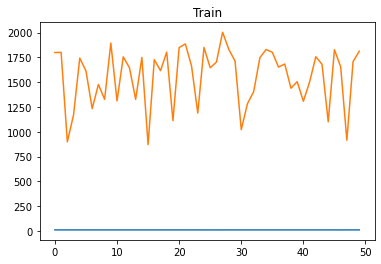

2/2 [==============================] - 2s 9ms/step


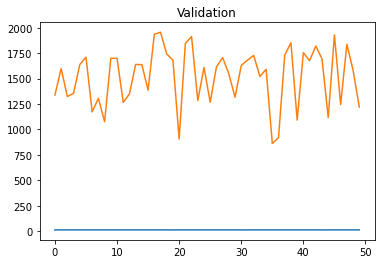

3/3 [==============================] - 0s 5ms/step


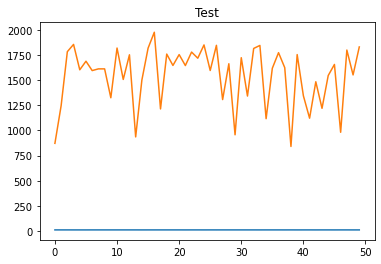

3/3 [==============================] - 0s 5ms/step


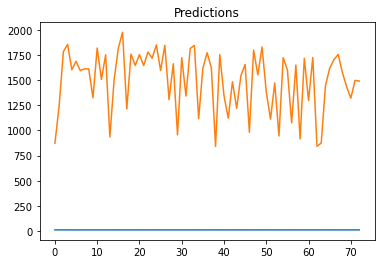

In [33]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(GRU(64))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_gru/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_auto_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_gru_mse = plot_predictions1(model,x_test, y_test)

In [34]:
mavg_auto_gru_mse

2300257.6765655004

### LSTM

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2420261.2500 - root_mean_squared_error: 1555.7189

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 66s 6s/step - loss: 2420261.2500 - root_mean_squared_error: 1555.7189 - val_loss: 2406075.0000 - val_root_mean_squared_error: 1551.1528
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 2419966.0000 - root_mean_squared_error: 1555.6240

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 35s 5s/step - loss: 2419966.0000 - root_mean_squared_error: 1555.6240 - val_loss: 2405753.0000 - val_root_mean_squared_error: 1551.0490
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2419681.5000 - root_mean_squared_error: 1555.5326

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2419681.5000 - root_mean_squared_error: 1555.5326 - val_loss: 2405431.2500 - val_root_mean_squared_error: 1550.9453
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2419385.7500 - root_mean_squared_error: 1555.4375

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2419385.7500 - root_mean_squared_error: 1555.4375 - val_loss: 2405104.7500 - val_root_mean_squared_error: 1550.8400
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2422929.2500 - root_mean_squared_error: 1556.5762

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 29s 4s/step - loss: 2419003.7500 - root_mean_squared_error: 1555.3147 - val_loss: 2404768.0000 - val_root_mean_squared_error: 1550.7314
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2418773.2500 - root_mean_squared_error: 1555.2406

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2418773.2500 - root_mean_squared_error: 1555.2406 - val_loss: 2404426.0000 - val_root_mean_squared_error: 1550.6212
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2418241.0000 - root_mean_squared_error: 1555.0695

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 2418241.0000 - root_mean_squared_error: 1555.0695 - val_loss: 2404072.2500 - val_root_mean_squared_error: 1550.5071
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2417957.0000 - root_mean_squared_error: 1554.9781

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2417957.0000 - root_mean_squared_error: 1554.9781 - val_loss: 2403703.5000 - val_root_mean_squared_error: 1550.3882
Epoch 9/50
6/8 [=====================>........] - ETA: 0s - loss: 2463264.7500 - root_mean_squared_error: 1569.4791

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2417589.5000 - root_mean_squared_error: 1554.8600 - val_loss: 2403324.2500 - val_root_mean_squared_error: 1550.2659
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2417225.2500 - root_mean_squared_error: 1554.7428

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 2417225.2500 - root_mean_squared_error: 1554.7428 - val_loss: 2402931.7500 - val_root_mean_squared_error: 1550.1393
Epoch 11/50
7/8 [=========================>....] - ETA: 0s - loss: 2419998.2500 - root_mean_squared_error: 1555.6344

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2416828.2500 - root_mean_squared_error: 1554.6151 - val_loss: 2402521.7500 - val_root_mean_squared_error: 1550.0070
Epoch 12/50
7/8 [=========================>....] - ETA: 0s - loss: 2396733.0000 - root_mean_squared_error: 1548.1385

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 2416401.0000 - root_mean_squared_error: 1554.4778 - val_loss: 2402082.5000 - val_root_mean_squared_error: 1549.8654
Epoch 13/50
6/8 [=====================>........] - ETA: 0s - loss: 2425179.5000 - root_mean_squared_error: 1557.2988

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 2415916.5000 - root_mean_squared_error: 1554.3219 - val_loss: 2401616.2500 - val_root_mean_squared_error: 1549.7148
Epoch 14/50
7/8 [=========================>....] - ETA: 0s - loss: 2400039.7500 - root_mean_squared_error: 1549.2062

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2415513.7500 - root_mean_squared_error: 1554.1923 - val_loss: 2401125.5000 - val_root_mean_squared_error: 1549.5565
Epoch 15/50
7/8 [=========================>....] - ETA: 0s - loss: 2414926.7500 - root_mean_squared_error: 1554.0034

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 28s 4s/step - loss: 2414860.2500 - root_mean_squared_error: 1553.9821 - val_loss: 2400598.5000 - val_root_mean_squared_error: 1549.3865
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 2414223.7500 - root_mean_squared_error: 1553.7772

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 43s 6s/step - loss: 2414452.0000 - root_mean_squared_error: 1553.8507 - val_loss: 2400048.5000 - val_root_mean_squared_error: 1549.2090
Epoch 17/50
7/8 [=========================>....] - ETA: 0s - loss: 2409301.5000 - root_mean_squared_error: 1552.1925

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 2413850.0000 - root_mean_squared_error: 1553.6570 - val_loss: 2399469.0000 - val_root_mean_squared_error: 1549.0220
Epoch 18/50
6/8 [=====================>........] - ETA: 0s - loss: 2445248.0000 - root_mean_squared_error: 1563.7289

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 2413165.7500 - root_mean_squared_error: 1553.4368 - val_loss: 2398859.0000 - val_root_mean_squared_error: 1548.8251
Epoch 19/50
8/8 [==============================] - ETA: 0s - loss: 2412620.5000 - root_mean_squared_error: 1553.2612

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 2412620.5000 - root_mean_squared_error: 1553.2612 - val_loss: 2398229.7500 - val_root_mean_squared_error: 1548.6219
Epoch 20/50
6/8 [=====================>........] - ETA: 0s - loss: 2432819.7500 - root_mean_squared_error: 1559.7499

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 41s 6s/step - loss: 2411866.7500 - root_mean_squared_error: 1553.0186 - val_loss: 2397586.2500 - val_root_mean_squared_error: 1548.4141
Epoch 21/50
7/8 [=========================>....] - ETA: 0s - loss: 2399881.7500 - root_mean_squared_error: 1549.1552

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 2411287.2500 - root_mean_squared_error: 1552.8320 - val_loss: 2396935.2500 - val_root_mean_squared_error: 1548.2039
Epoch 22/50
6/8 [=====================>........] - ETA: 0s - loss: 2383269.0000 - root_mean_squared_error: 1543.7839

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2410622.5000 - root_mean_squared_error: 1552.6179 - val_loss: 2396271.5000 - val_root_mean_squared_error: 1547.9895
Epoch 23/50
8/8 [==============================] - ETA: 0s - loss: 2410060.5000 - root_mean_squared_error: 1552.4370

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 46s 6s/step - loss: 2410060.5000 - root_mean_squared_error: 1552.4370 - val_loss: 2395599.7500 - val_root_mean_squared_error: 1547.7725
Epoch 24/50
8/8 [==============================] - ETA: 0s - loss: 2409279.7500 - root_mean_squared_error: 1552.1854

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 27s 4s/step - loss: 2409279.7500 - root_mean_squared_error: 1552.1854 - val_loss: 2394923.5000 - val_root_mean_squared_error: 1547.5541
Epoch 25/50
6/8 [=====================>........] - ETA: 0s - loss: 2367064.7500 - root_mean_squared_error: 1538.5269

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 40s 6s/step - loss: 2408586.2500 - root_mean_squared_error: 1551.9620 - val_loss: 2394240.0000 - val_root_mean_squared_error: 1547.3331
Epoch 26/50
8/8 [==============================] - ETA: 0s - loss: 2408000.7500 - root_mean_squared_error: 1551.7734

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2408000.7500 - root_mean_squared_error: 1551.7734 - val_loss: 2393546.5000 - val_root_mean_squared_error: 1547.1091
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 2407238.7500 - root_mean_squared_error: 1551.5278

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 50s 7s/step - loss: 2407238.7500 - root_mean_squared_error: 1551.5278 - val_loss: 2392851.0000 - val_root_mean_squared_error: 1546.8843
Epoch 28/50
6/8 [=====================>........] - ETA: 0s - loss: 2387481.7500 - root_mean_squared_error: 1545.1478

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2406651.2500 - root_mean_squared_error: 1551.3385 - val_loss: 2392147.5000 - val_root_mean_squared_error: 1546.6569
Epoch 29/50
8/8 [==============================] - ETA: 0s - loss: 2405579.0000 - root_mean_squared_error: 1550.9929

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2405579.0000 - root_mean_squared_error: 1550.9929 - val_loss: 2391421.0000 - val_root_mean_squared_error: 1546.4220
Epoch 30/50
7/8 [=========================>....] - ETA: 0s - loss: 2404839.7500 - root_mean_squared_error: 1550.7545

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 48s 7s/step - loss: 2405206.2500 - root_mean_squared_error: 1550.8727 - val_loss: 2390686.5000 - val_root_mean_squared_error: 1546.1844
Epoch 31/50
8/8 [==============================] - ETA: 0s - loss: 2404383.2500 - root_mean_squared_error: 1550.6074

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2404383.2500 - root_mean_squared_error: 1550.6074 - val_loss: 2389946.0000 - val_root_mean_squared_error: 1545.9451
Epoch 32/50
6/8 [=====================>........] - ETA: 0s - loss: 2458984.5000 - root_mean_squared_error: 1568.1150

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 62s 9s/step - loss: 2403796.0000 - root_mean_squared_error: 1550.4180 - val_loss: 2389202.2500 - val_root_mean_squared_error: 1545.7045
Epoch 33/50
7/8 [=========================>....] - ETA: 0s - loss: 2402945.5000 - root_mean_squared_error: 1550.1437

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2402959.0000 - root_mean_squared_error: 1550.1481 - val_loss: 2388474.7500 - val_root_mean_squared_error: 1545.4691
Epoch 34/50
6/8 [=====================>........] - ETA: 0s - loss: 2401908.7500 - root_mean_squared_error: 1549.8092

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 37s 5s/step - loss: 2402049.0000 - root_mean_squared_error: 1549.8545 - val_loss: 2387749.0000 - val_root_mean_squared_error: 1545.2343
Epoch 35/50
7/8 [=========================>....] - ETA: 0s - loss: 2408344.7500 - root_mean_squared_error: 1551.8843

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 24s 3s/step - loss: 2401546.2500 - root_mean_squared_error: 1549.6923 - val_loss: 2387032.7500 - val_root_mean_squared_error: 1545.0026
Epoch 36/50
8/8 [==============================] - ETA: 0s - loss: 2400764.0000 - root_mean_squared_error: 1549.4399

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 2400764.0000 - root_mean_squared_error: 1549.4399 - val_loss: 2386329.5000 - val_root_mean_squared_error: 1544.7749
Epoch 37/50
7/8 [=========================>....] - ETA: 0s - loss: 2387804.7500 - root_mean_squared_error: 1545.2523

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 44s 6s/step - loss: 2400048.2500 - root_mean_squared_error: 1549.2089 - val_loss: 2385640.0000 - val_root_mean_squared_error: 1544.5518
Epoch 38/50
7/8 [=========================>....] - ETA: 0s - loss: 2401292.5000 - root_mean_squared_error: 1549.6105

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 36s 5s/step - loss: 2399225.2500 - root_mean_squared_error: 1548.9432 - val_loss: 2384952.2500 - val_root_mean_squared_error: 1544.3291
Epoch 39/50
6/8 [=====================>........] - ETA: 0s - loss: 2363019.7500 - root_mean_squared_error: 1537.2117

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 45s 6s/step - loss: 2398434.5000 - root_mean_squared_error: 1548.6880 - val_loss: 2384280.0000 - val_root_mean_squared_error: 1544.1115
Epoch 40/50
8/8 [==============================] - ETA: 0s - loss: 2397723.5000 - root_mean_squared_error: 1548.4584

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 30s 4s/step - loss: 2397723.5000 - root_mean_squared_error: 1548.4584 - val_loss: 2383612.2500 - val_root_mean_squared_error: 1543.8951
Epoch 41/50
7/8 [=========================>....] - ETA: 0s - loss: 2399925.5000 - root_mean_squared_error: 1549.1693

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 33s 5s/step - loss: 2397136.7500 - root_mean_squared_error: 1548.2689 - val_loss: 2382954.2500 - val_root_mean_squared_error: 1543.6820
Epoch 42/50
7/8 [=========================>....] - ETA: 0s - loss: 2405105.2500 - root_mean_squared_error: 1550.8402

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 2396819.0000 - root_mean_squared_error: 1548.1664 - val_loss: 2382319.2500 - val_root_mean_squared_error: 1543.4763
Epoch 43/50
6/8 [=====================>........] - ETA: 0s - loss: 2433851.0000 - root_mean_squared_error: 1560.0804

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 2395735.2500 - root_mean_squared_error: 1547.8163 - val_loss: 2381698.5000 - val_root_mean_squared_error: 1543.2753
Epoch 44/50
7/8 [=========================>....] - ETA: 0s - loss: 2404135.2500 - root_mean_squared_error: 1550.5275

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 39s 6s/step - loss: 2395470.5000 - root_mean_squared_error: 1547.7307 - val_loss: 2381099.0000 - val_root_mean_squared_error: 1543.0811
Epoch 45/50
7/8 [=========================>....] - ETA: 0s - loss: 2385625.5000 - root_mean_squared_error: 1544.5470

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 2394884.7500 - root_mean_squared_error: 1547.5415 - val_loss: 2380514.5000 - val_root_mean_squared_error: 1542.8916
Epoch 46/50
7/8 [=========================>....] - ETA: 0s - loss: 2401546.7500 - root_mean_squared_error: 1549.6925

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 42s 6s/step - loss: 2394439.0000 - root_mean_squared_error: 1547.3975 - val_loss: 2379940.2500 - val_root_mean_squared_error: 1542.7054
Epoch 47/50
6/8 [=====================>........] - ETA: 0s - loss: 2409524.7500 - root_mean_squared_error: 1552.2644

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 34s 5s/step - loss: 2393550.2500 - root_mean_squared_error: 1547.1102 - val_loss: 2379381.0000 - val_root_mean_squared_error: 1542.5242
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 2393041.5000 - root_mean_squared_error: 1546.9459

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 58s 8s/step - loss: 2393041.5000 - root_mean_squared_error: 1546.9459 - val_loss: 2378835.7500 - val_root_mean_squared_error: 1542.3475
Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 2392257.5000 - root_mean_squared_error: 1546.6924

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 32s 5s/step - loss: 2392257.5000 - root_mean_squared_error: 1546.6924 - val_loss: 2378304.7500 - val_root_mean_squared_error: 1542.1753
Epoch 50/50
6/8 [=====================>........] - ETA: 0s - loss: 2374053.5000 - root_mean_squared_error: 1540.7964

INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


INFO:tensorflow:Assets written to: mavg_auto_lstm/assets


8/8 [==============================] - 5s 17ms/step


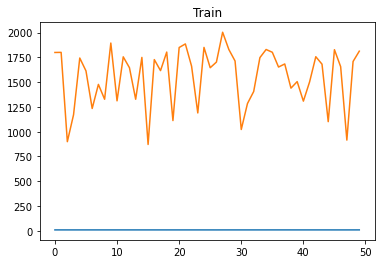

2/2 [==============================] - 4s 12ms/step


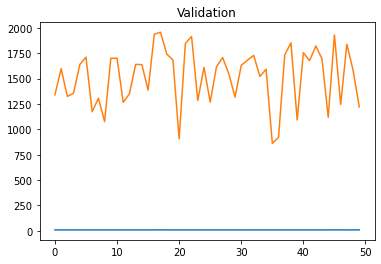

3/3 [==============================] - 2s 101ms/step


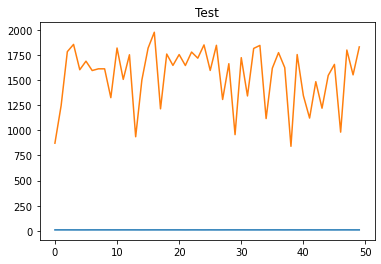

3/3 [==============================] - 0s 14ms/step


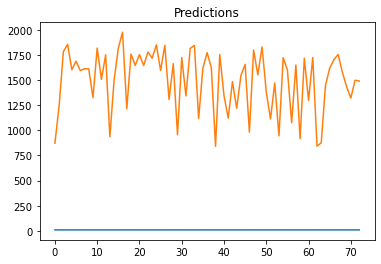

In [35]:
model = Sequential()
model.add(InputLayer((15, 1)))
model.add(LSTM(64))
model.add(Dropout(0.3))
#model.add(RepeatVector(3))
#model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.4))
#model.add(Dense(8, 'relu'))
#model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_auto_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs,moving_avg_data, target, x_val, y_val)


plot_train("mavg_auto_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_auto_lstm_mse = plot_predictions1(model,x_test, y_test)

In [40]:
mavg_auto_lstm_mse

2308487.9071810776

# Hybrid

## General

### CNN LSTM

In [ ]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 2417122.0000 - root_mean_squared_error: 1554.7096

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 14s 1s/step - loss: 2417122.0000 - root_mean_squared_error: 1554.7096 - val_loss: 2403115.2500 - val_root_mean_squared_error: 1550.1985
Epoch 2/50
7/8 [=========================>....] - ETA: 0s - loss: 2410551.7500 - root_mean_squared_error: 1552.5952

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 38s 5s/step - loss: 2415735.7500 - root_mean_squared_error: 1554.2637 - val_loss: 2402011.2500 - val_root_mean_squared_error: 1549.8423
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 2414746.0000 - root_mean_squared_error: 1553.9453

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 6s 784ms/step - loss: 2414746.0000 - root_mean_squared_error: 1553.9453 - val_loss: 2401147.0000 - val_root_mean_squared_error: 1549.5635
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 2413909.5000 - root_mean_squared_error: 1553.6761

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 6s 864ms/step - loss: 2413909.5000 - root_mean_squared_error: 1553.6761 - val_loss: 2400376.5000 - val_root_mean_squared_error: 1549.3148
Epoch 5/50
7/8 [=========================>....] - ETA: 0s - loss: 2396230.2500 - root_mean_squared_error: 1547.9762

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 6s 814ms/step - loss: 2413160.7500 - root_mean_squared_error: 1553.4352 - val_loss: 2399642.2500 - val_root_mean_squared_error: 1549.0779
Epoch 6/50
8/8 [==============================] - ETA: 0s - loss: 2412414.5000 - root_mean_squared_error: 1553.1949

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 6s 909ms/step - loss: 2412414.5000 - root_mean_squared_error: 1553.1949 - val_loss: 2398876.2500 - val_root_mean_squared_error: 1548.8306
Epoch 7/50
8/8 [==============================] - ETA: 0s - loss: 2411624.5000 - root_mean_squared_error: 1552.9406

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 6s 829ms/step - loss: 2411624.5000 - root_mean_squared_error: 1552.9406 - val_loss: 2398054.0000 - val_root_mean_squared_error: 1548.5652
Epoch 8/50
8/8 [==============================] - ETA: 0s - loss: 2410802.7500 - root_mean_squared_error: 1552.6760

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 5s 715ms/step - loss: 2410802.7500 - root_mean_squared_error: 1552.6760 - val_loss: 2397238.0000 - val_root_mean_squared_error: 1548.3016
Epoch 9/50
8/8 [==============================] - ETA: 0s - loss: 2410009.5000 - root_mean_squared_error: 1552.4205

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 5s 732ms/step - loss: 2410009.5000 - root_mean_squared_error: 1552.4205 - val_loss: 2396465.7500 - val_root_mean_squared_error: 1548.0522
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 2409247.7500 - root_mean_squared_error: 1552.1752

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 6s 793ms/step - loss: 2409247.7500 - root_mean_squared_error: 1552.1752 - val_loss: 2395717.7500 - val_root_mean_squared_error: 1547.8107
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 2408505.7500 - root_mean_squared_error: 1551.9362

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 6s 827ms/step - loss: 2408505.7500 - root_mean_squared_error: 1551.9362 - val_loss: 2394983.0000 - val_root_mean_squared_error: 1547.5732
Epoch 12/50
8/8 [==============================] - ETA: 0s - loss: 2407780.0000 - root_mean_squared_error: 1551.7023

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 5s 713ms/step - loss: 2407780.0000 - root_mean_squared_error: 1551.7023 - val_loss: 2394262.2500 - val_root_mean_squared_error: 1547.3403
Epoch 13/50
5/8 [=================>............] - ETA: 0s - loss: 2340675.5000 - root_mean_squared_error: 1529.9266

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 5s 726ms/step - loss: 2407064.0000 - root_mean_squared_error: 1551.4716 - val_loss: 2393560.2500 - val_root_mean_squared_error: 1547.1135
Epoch 14/50
6/8 [=====================>........] - ETA: 0s - loss: 2445621.2500 - root_mean_squared_error: 1563.8483

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 5s 719ms/step - loss: 2406376.0000 - root_mean_squared_error: 1551.2499 - val_loss: 2392875.2500 - val_root_mean_squared_error: 1546.8921
Epoch 15/50
6/8 [=====================>........] - ETA: 0s - loss: 2380630.7500 - root_mean_squared_error: 1542.9293

INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


INFO:tensorflow:Assets written to: hybrid_cnn_lstm/assets


8/8 [==============================] - 6s 911ms/step - loss: 2405691.5000 - root_mean_squared_error: 1551.0292 - val_loss: 2392203.2500 - val_root_mean_squared_error: 1546.6749
Epoch 16/50
6/8 [=====================>........] - ETA: 0s - loss: 2395951.5000 - root_mean_squared_error: 1547.8861

In [ ]:
hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(15,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_lstm", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_rnn_lstm_mse

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_rnn_gru_mse

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_cnn_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_cnn_rnn_gru_mse

### LSTM RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, x_train,y_train, x_val, y_val)

plot_train("hybrid_lstm_rnn_gru", 50, x_train,y_train)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
hybrid_lstm_rnn_gru_mse

## Moving Average

### CNN LSTM

In [ ]:
input_shape = (15,1)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(RepeatVector(n=input_shape[0]))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

cp = ModelCheckpoint('mavg_hybrid_cnn_lstm/', save_best_only=True)

model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_lstm_mse

### RNN LSTM

In [ ]:
model = Sequential()
model.add(SimpleRNN(64,return_sequences=True, input_shape=(15,1)))
model.add(LSTM(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_lstm/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_lstm", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_lstm_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_lstm_mse

### RNN GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15, 1)))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_rnn_gru_mse

### CNN GRU

In [ ]:
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(RepeatVector(n=15))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_gru_mse

### CNN RNN GRU

In [ ]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(15, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(n=15))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GRU(32))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_cnn_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target, x_val, y_val)

plot_train("mavg_hybrid_cnn_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_cnn_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_cnn_rnn_gru_mse

### RNN LSTM GRU

In [ ]:
model = Sequential()
model.add(SimpleRNN(64, return_sequences=True, input_shape=(15,1)))
model.add(LSTM(128, return_sequences=True))
model.add(GRU(64))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
cp = ModelCheckpoint('mavg_hybrid_lstm_rnn_gru/', save_best_only=True)
model = fit_model(model, cp, epochs, moving_avg_data, target,x_val, y_val)

plot_train("mavg_hybrid_lstm_rnn_gru", 50, moving_avg_data, target)
plot_val(model, 50, x_val, y_val)
plot_test(model, 50, x_test, y_test)
mavg_hybrid_lstm_rnn_gru_mse = plot_predictions1(model,x_test, y_test)

In [ ]:
mavg_hybrid_lstm_rnn_gru_mse

# MSE

In [ ]:
mse_list = [cnn_mse, rnn_mse, gru_mse, lstm_mse,
            mvg_cnn_mse, mvg_rnn_mse, mvg_gru_mse, mvg_lstm_mse,
            auto_cnn_mse, auto_rnn_mse, auto_gru_mse, auto_lstm_mse,
            mavg_auto_cnn_mse, mavg_auto_rnn_mse, mavg_auto_gru_mse, mavg_auto_lstm_mse,
            hybrid_cnn_lstm_mse, hybrid_lstm_rnn_gru_mse,hybrid_cnn_rnn_gru_mse,hybrid_cnn_gru_mse,
            hybrid_rnn_gru_mse,hybrid_rnn_lstm_mse,
            mavg_hybrid_cnn_lstm_mse, mavg_hybrid_lstm_rnn_gru_mse,mavg_hybrid_cnn_rnn_gru_mse,
            mavg_hybrid_cnn_gru_mse,mavg_hybrid_rnn_gru_mse,mavg_hybrid_rnn_lstm_mse]

model_n = ["cnn", "rnn", "gru", "lstm",
           "mvg_cnn", "mvg_rnn", "mvg_gru", "mvg_lstm",
           "auto_cnn", "auto_rnn", "auto_gru", "auto_lstm",
           "mvg_auto_cnn", "mvg_auto_rnn", "mvg_auto_gru", "mvg_auto_lstm",
           "hybrid_cnn_lstm", "hybrid_lstm_rnn_gru" ,"hybrid_cnn_rnn_gru","hybrid_cnn_gru",
           "hybrid_rnn_gru","hybrid_rnn_lstm",
           "mavg_hybrid_cnn_lstm", "mavg_hybrid_lstm_rnn_gru","mavg_hybrid_cnn_rnn_gru",
           "mavg_hybrid_cnn_gru","mavg_hybrid_rnn_gru","mavg_hybrid_rnn_lstm"
          ]

msedf = pd.DataFrame({
    "Model": model_n,
    "MSE": mse_list
})

rmse = np.sqrt(msedf.MSE)
msedf["RMSE"] = rmse

In [ ]:
msedf

In [ ]:
msedf.to_csv("msedf.csv", index= False)

In [ ]:
msedf.plot("Model", "RMSE", kind= "bar")

In [ ]:
np.save("x_train.npy", x_train)
np.save("y_train.npy", y_train)
np.save("x_test.npy", x_test)
np.save("y_test.npy", y_test)
np.save("x_val.npy", x_val)
np.save("y_val.npy", y_val)